                                    ** Test Technique **


# Sommaire

1. [Présentation de la problématique et importation des données.](#data-présentation)

2. [Nettoyage des données.](#data-cleaning)
    
   - [Formatage 'isMale','yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD', 'nYearsEducation', 'LaborStatus'.](#data-format)
   - [La signification de la variable 'GDP_variation'.](#data-gdp)
   - [Traitement des données manquantes.](#data-manq)
   - [Traitement des doublons.](#data-doub)
   - [Codage de la variable catégorielle LaborStatus.](#data-codage)
   - [Traitement des outliers.](#data-out)
    
3. [Analyse des données.](#data-analysis)
    
    - Analyse univariée des variables.
    - [Analyse bivariée des variables.](#data-biv)
    - Etude de corrélation entre variables.
    - [Création d'une nouvelle variable isUnmarriedMale.](#data-cr)
    
4. [Préparation des données pour la modélisation.](#data-préparation)
    
    - [Définir la variable cible et les prédicteurs.](#data-pred)
    - [Normalisation des données.](#data-stand)
    - [Log transform la variable cible.](#data-log)
    - [Division des données en ensemble d'entraînement et ensemble de test.](#data-test)
    
5. [Modélisation et évaluation de modèles.](#data-modélisation)
    
    - [Optimisation des hyperparamètres.](#data-optim)
    - Calcul des métriques.
    - [Analyse de l'importance des variables.](#data-varia)
    
6. [Conclusions et prochaines étapes.](#data-conclusions)


<a id='data-présentation'></a>

# Présentation de la problématique et importation des données

### Consignes

L’objectif est de développer un modèle performant pour prédire la variable yTotalHouseholdSpendings en fonction des autres variables pertinentes. La plupart des variables ont un nom décrivant l’information contenue.

Il faut développer dans un Jupyter Notebook en Python un code contenant les différentes étapes que tu suivrais si tu étais face à ce dataset dans la vraie vie pour aboutir à un modèle performant. Merci d’écrire tes commentaires / réflexions / conclusions dans du texte dans le notebook. Les visuels sont utiles.


  

# Chargement des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score, KFold, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, plot_importance
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, explained_variance_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import time
from fanalysis.pca import PCA
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings

In [1]:
# Chargement des librairies

# Bibliothèques principales pour le traitement des données
import pandas as pd
import numpy as np

# Bibliothèques pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Bibliothèques pour le traitement et la prétraitement des données
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV

# Bibliothèques pour la modélisation
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, plot_importance
from catboost import CatBoostRegressor

# Bibliothèques pour les métriques d'évaluation du modèle
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, explained_variance_score

# Bibliothèques supplémentaires et paramètres
import scipy.stats as stats
from fanalysis.pca import PCA
from fanalysis.mca import MCA
import time
import warnings

# Paramètres d'affichage
pd.set_option('display.max_columns', None)
%matplotlib inline

# Ignorer les avertissements
warnings.filterwarnings('ignore')


In [44]:
plt.style.use('dark_background')

In [2]:
#Chargement des données
data=pd.read_csv('spendings_dataset.csv', sep=';', encoding="utf-8")

In [3]:
data.head()

GDP_variation  weight   age  householdSize isMale  isMarried  isLiterate   
0       0.093446     187  34.0              4    1,0        1.0         1.0  \
1       0.093446      95  39.0              8    1,0        1.0         1.0   
2       0.093446     225  53.0             10    1,0        1.0         1.0   
3       0.093446     148  54.0              1    1,0        0.0         1.0   
4       0.093446     221  69.0              5    1,0        1.0         1.0   

  nYearsEducation  isUrban laborStatus  hasAccount  hasLoan  isHouseOwner   
0             4.0        1    employed         0.0      1.0           1.0  \
1             0.0        1    employed         0.0      0.0           1.0   
2             4.0        1    employed         0.0      0.0           1.0   
3             5.0        1    inactive         0.0      0.0           1.0   
4             0.0        0    employed         0.0      1.0           1.0   

  yTotalHouseholdSpendings yTotalHouseholdSpendingsUSD      id  
0                    518.4           48.44235229492184  408112  
1                  12000.0               1121.35078125   99522  
2                  80160.0                7490.6234375  450411  
3                  13584.0          1269.3690429687522  230464  
4                   3200.0           299.0268798828128  187256

## Affichage des informations générales sur le DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GDP_variation                4024 non-null   float64
 1   weight                       4024 non-null   int64  
 2   age                          4024 non-null   float64
 3   householdSize                4024 non-null   int64  
 4   isMale                       4024 non-null   object 
 5   isMarried                    4024 non-null   float64
 6   isLiterate                   4000 non-null   float64
 7   nYearsEducation              4000 non-null   object 
 8   isUrban                      4024 non-null   int64  
 9   laborStatus                  3991 non-null   object 
 10  hasAccount                   4024 non-null   float64
 11  hasLoan                      4015 non-null   float64
 12  isHouseOwner                 4024 non-null   float64
 13  yTotalHouseholdSpe

In [5]:
print(f"Nombre de lignes: {data.shape[0]}, Nombre de colonnes: {data.shape[1]}")


Nombre de lignes: 4024, Nombre de colonnes: 16


In [6]:
df=data.copy()
df.columns

Index(['GDP_variation', 'weight', 'age', 'householdSize', 'isMale',
       'isMarried', 'isLiterate', 'nYearsEducation', 'isUrban', 'laborStatus',
       'hasAccount', 'hasLoan', 'isHouseOwner', 'yTotalHouseholdSpendings',
       'yTotalHouseholdSpendingsUSD', 'id'],
      dtype='object')

In [7]:
# Affichage du nombre de valeurs uniques pour chaque variable
print(df.nunique())

GDP_variation                     1
weight                          231
age                              85
householdSize                    21
isMale                            2
isMarried                         2
isLiterate                        2
nYearsEducation                  19
isUrban                           2
laborStatus                       5
hasAccount                        2
hasLoan                           2
isHouseOwner                      2
yTotalHouseholdSpendings       2577
yTotalHouseholdSpendingsUSD    2574
id                             4012
dtype: int64


# Contenu de la base de données

**GDP_variation**: Cela semble être la variation du PIB (produit intérieur brut) sur une période de temps donnée.

**weight**: Un poids statistique utilisé pour ajuster l'échantillonnage dans la recherche socio-économique. Cette pondération permet de représenter la population générale, en tenant compte d'éventuelles irrégularités dans les données.

**age**: L'âge du répondant ou du chef de ménage en années, ou peut-être l'âge moyen des membres du ménage.

**householdSize**: Le nombre de personnes dans le ménage. Autrement dit, toutes les personnes vivant dans le ménage (pas seulement les membres de la famille).

**isMale**: Sexe du répondant. Une valeur de 1 signifie un homme, 0 signifie une femme (type booléen).

**isMarried**: État civil du répondant. Une valeur de 1 signifie que le répondant est marié, 0 signifie qu'il n'est pas marié (type booléen).

**isLiterate**: Alphabétisation du répondant. Une valeur de 1 signifie que le répondant est alphabétisé, 0 signifie qu'il est analphabète (type booléen).

**nYearsEducation** n: Nombre d'années d'éducation formelle reçues par le répondant.

**isUrban**: Lieu de résidence du répondant. Une valeur de 1 signifie que le répondant vit dans une ville, 0 - dans une zone rurale (type booléen).

**laborStatus**:Situation d'emploi du répondant. Il s'agit d'une variable catégorielle où chaque valeur correspond à un statut d'emploi spécifique.

**hasAccount**: Le ménage a-t-il un compte bancaire. La valeur 1 signifie la présence d'un compte, 0 signifie l'absence(type booléen).

**hasLoan**: Le ménage a-t-il un prêt. La valeur 1 signifie la présence d'un compte, 0 signifie l'absence (type booléen).

**isHouseOwner**: Le ménage possède-t-il une propriété résidentielle. La valeur 1 signifie la présence d'un compte, 0 signifie l'absence (type booléen).

**yTotalHouseholdSpendings**: Les dépenses totales du ménage (peut-être en monnaie locale).

**yTotalHouseholdSpendingsUSD**: Les dépenses totales du ménage en dollars américains.
                                                     
**id**: Identifiant unique du répondant ou du ménage.
                                                    

## Voici quelques observations sur les paramètres :

**id** : C'est un identifiant unique du client/du ménage. Cette colonne ne sera probablement pas utile pour la modélisation car elle ne contient aucune information qui pourrait être utile pour prédire les dépenses du ménage.

**GDP_variation** : Ce paramètre peut être important car la variation du PIB peut influencer le niveau de dépenses du ménage.

**weight, age, householdSize** : Ces variables peuvent être des facteurs importants influençant les dépenses du ménage. Le poids-utilisé pour pondérer les résultats d’une étude afin de mieux refléter la population générale. L'âge peuvent refléter les caractéristiques et les besoins des individus dans le ménage, tandis que la taille du ménage peut refléter la taille globale et les besoins du ménage.

**isMale, isMarried, isLiterate, nYearsEducation, laborStatus, hasAccount, hasLoan, isHouseOwner** : Ces paramètres peuvent également influencer les dépenses du ménage en raison de leur lien avec le statut socio-économique et la situation des membres de la famille.

**isUrban** : On sait que la vie en milieu urbain peut entraîner des dépenses différentes par rapport aux zones rurales, donc cette variable peut également être importante pour prédire les dépenses.

**yTotalHouseholdSpendings, yTotalHouseholdSpendingsUSD** : Ces paramètres sont notre variable cible, c'est-à-dire les dépenses du ménage, et ils sont essentiels pour la modélisation.

<a id='data-cleaning'></a>

#  Nettoyage des données

In [8]:
# Déplacer la colonne "id" au début
first_column = df.pop('id') 
df.insert(0, 'ID', first_column)  


In [9]:
# Renommer certaines variables pour rendre leurs noms plus clairs
df = df.rename(columns={'laborStatus': 'LaborStatus', 
                             'weight': 'Weight', 
                             'age': 'Age', 
                             'householdSize': 'HouseholdSize'})


In [10]:
df.describe(include='all')

ID  GDP_variation       Weight          Age  HouseholdSize   
count     4024.000000   4.024000e+03  4024.000000  4024.000000    4024.000000  \
unique            NaN            NaN          NaN          NaN            NaN   
top               NaN            NaN          NaN          NaN            NaN   
freq              NaN            NaN          NaN          NaN            NaN   
mean    500792.953529   9.344590e-02   220.400099    45.581262       5.489811   
std     288684.661346   2.775903e-17   179.829930    16.030370       2.785281   
min        106.000000   9.344590e-02  -213.000000    -2.000000       1.000000   
25%     253752.250000   9.344590e-02   137.000000    33.000000       4.000000   
50%     492770.000000   9.344590e-02   176.000000    43.000000       5.000000   
75%     756278.750000   9.344590e-02   233.500000    56.000000       7.000000   
max     999934.000000   9.344590e-02  2150.000000   220.000000      22.000000   

       isMale    isMarried   isLiterate nYearsEducation      isUrban   
count    4024  4024.000000  4000.000000            4000  4024.000000  \
unique      2          NaN          NaN              19          NaN   
top       1,0          NaN          NaN             0.0          NaN   
freq     2961          NaN          NaN            1367          NaN   
mean      NaN     0.713469     0.684250             NaN     0.539761   
std       NaN     0.452197     0.464872             NaN     0.498478   
min       NaN     0.000000     0.000000             NaN     0.000000   
25%       NaN     0.000000     0.000000             NaN     0.000000   
50%       NaN     1.000000     1.000000             NaN     1.000000   
75%       NaN     1.000000     1.000000             NaN     1.000000   
max       NaN     1.000000     1.000000             NaN     1.000000   

       LaborStatus   hasAccount      hasLoan  isHouseOwner   
count         3991  4024.000000  4015.000000   4024.000000  \
unique           5          NaN          NaN           NaN   
top       employed          NaN          NaN           NaN   
freq          3156          NaN          NaN           NaN   
mean           NaN     0.047714     0.156164      0.782555   
std            NaN     0.213186     0.363056      0.412559   
min            NaN     0.000000     0.000000      0.000000   
25%            NaN     0.000000     0.000000      1.000000   
50%            NaN     0.000000     0.000000      1.000000   
75%            NaN     0.000000     0.000000      1.000000   
max            NaN     1.000000     1.000000      1.000000   

       yTotalHouseholdSpendings yTotalHouseholdSpendingsUSD  
count                      4021                        4021  
unique                     2577                        2574  
top                         0.0                         0.0  
freq                         72                          72  
mean                        NaN                         NaN  
std                         NaN                         NaN  
min                         NaN                         NaN  
25%                         NaN                         NaN  
50%                         NaN                         NaN  
75%                         NaN                         NaN  
max                         NaN                         NaN

<a id='data-format'></a>
## Analyse du format  

In [186]:
### Reformatting 'isMale'

In [11]:
df['isMale'].unique()

array(['1,0', '0,0'], dtype=object)

In [12]:
df['isMale'] = df['isMale'].map({'1,0': 1, '0,0': 0})

In [13]:
df['isMale'].value_counts()

isMale
1    2961
0    1063
Name: count, dtype: int64

In [14]:
df['isMale'].dtype

dtype('int64')

In [15]:
df['isMale'].unique()

array([1, 0])

###  Formatage 'yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD'

In [16]:
df[['yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD']]

yTotalHouseholdSpendings yTotalHouseholdSpendingsUSD
0                       518.4           48.44235229492184
1                     12000.0               1121.35078125
2                     80160.0                7490.6234375
3                     13584.0          1269.3690429687522
4                      3200.0           299.0268798828128
...                       ...                         ...
4019                   5932.8           554.3958007812504
4020                   3494.4          326.53735351562483
4021                  22128.0           2067.770898437504
4022                   4288.0           400.6959960937504
4023                  14400.0          1345.6208984375044

[4024 rows x 2 columns]

In [17]:
def select_rows_with_missing_values(df, columns):
    """
    Sélectionnez les lignes avec des valeurs manquantes dans les colonnes spécifiées et renvoyez un DataFrame contenant uniquement les colonnes sélectionnées.
    Paramètres :
    df: DataFrame à partir duquel sélectionner les lignes
    columns: Liste des noms de colonnes à vérifier pour les valeurs manquantes
    Returns:
    selected_rows_df : DataFrame contenant les lignes avec des valeurs manquantes dans les colonnes spécifiées
    """

    selected_rows_df = df[df[columns].isna().any(axis=1)]
    selected_rows_df = selected_rows_df[columns]

    return selected_rows_df

In [18]:
select_rows_with_missing_values(df, ['yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD'])

yTotalHouseholdSpendings yTotalHouseholdSpendingsUSD
1040                      NaN                         NaN
1723                      NaN                         NaN
3133                      NaN                         NaN

In [19]:
df1=df.copy()

In [20]:
# Convertir une colonne 'yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD' au format numérique
df1['yTotalHouseholdSpendings'] = pd.to_numeric(df1['yTotalHouseholdSpendings'], errors='coerce')

df1['yTotalHouseholdSpendingsUSD'] = pd.to_numeric(df1['yTotalHouseholdSpendingsUSD'], errors='coerce')


Dans ce code, **error='coerce'** signifie que s'il n'y a aucun moyen de convertir les valeurs au format numérique, elles seront remplacées par **NaN**. Cela évite les erreurs lors de la conversion et garantit que les données incorrectes sont traitées correctement.

In [21]:
select_rows_with_missing_values(df1, ['yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD'])

yTotalHouseholdSpendings  yTotalHouseholdSpendingsUSD
1040                       NaN                          NaN
1723                       NaN                          NaN
1917                       NaN                          NaN
3133                       NaN                          NaN
3611                       NaN                          NaN
3684                       NaN                          NaN

In [198]:
# Certaines valeurs provoquent une erreur lors de la conversion et ont donc été remplacées par NaN.

In [22]:
# Sélection de lignes et de colonnes spécifiques par leurs indices numériques
selected_rows = data.iloc[[1917, 3611, 3684], [13, 14]]  # 13 та 14 - les index de colonnes 'yTotalHouseholdSpendings' та 'yTotalHouseholdSpendingsUSD'
selected_rows

yTotalHouseholdSpendings yTotalHouseholdSpendingsUSD
1917              noSpendings                 noSpendings
3611              noSpendings                 noSpendings
3684              noSpendings                 noSpendings

Si ces valeurs n'indiquent aucun coût, il est utile de les remplacer par 0 avant de les convertir au format numérique.

In [23]:
df.iloc[[1917, 3611, 3684], ]

ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
1917  953216       0.093446      46  31.0              7       1        0.0  \
3611  549187       0.093446     221  37.0              7       1        1.0   
3684  437871       0.093446     232  36.0              3       0        0.0   

      isLiterate nYearsEducation  isUrban LaborStatus  hasAccount  hasLoan   
1917         1.0            11.0        1  unemployed         0.0      0.0  \
3611         NaN             NaN        1         NaN         0.0      0.0   
3684         0.0             0.0        0    inactive         0.0      0.0   

      isHouseOwner yTotalHouseholdSpendings yTotalHouseholdSpendingsUSD  
1917           1.0              noSpendings                 noSpendings  
3611           1.0              noSpendings                 noSpendings  
3684           0.0              noSpendings                 noSpendings

In [24]:
# Remplacement des valeurs "noSendings" par 0
df['yTotalHouseholdSpendings'] = df['yTotalHouseholdSpendings'].replace('noSpendings', 0)
df['yTotalHouseholdSpendingsUSD'] = df['yTotalHouseholdSpendingsUSD'].replace('noSpendings', 0)

# Convertir les colonnes au format numérique
df['yTotalHouseholdSpendings'] = pd.to_numeric(df['yTotalHouseholdSpendings'])
df['yTotalHouseholdSpendingsUSD'] = pd.to_numeric(df['yTotalHouseholdSpendingsUSD'])


In [25]:
select_rows_with_missing_values(df, ['yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD'])

yTotalHouseholdSpendings  yTotalHouseholdSpendingsUSD
1040                       NaN                          NaN
1723                       NaN                          NaN
3133                       NaN                          NaN

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4024 non-null   int64  
 1   GDP_variation                4024 non-null   float64
 2   Weight                       4024 non-null   int64  
 3   Age                          4024 non-null   float64
 4   HouseholdSize                4024 non-null   int64  
 5   isMale                       4024 non-null   int64  
 6   isMarried                    4024 non-null   float64
 7   isLiterate                   4000 non-null   float64
 8   nYearsEducation              4000 non-null   object 
 9   isUrban                      4024 non-null   int64  
 10  LaborStatus                  3991 non-null   object 
 11  hasAccount                   4024 non-null   float64
 12  hasLoan                      4015 non-null   float64
 13  isHouseOwner      

## Reformatting 'nYearsEducation'

In [27]:
df['nYearsEducation'].unique()

array(['4.0', '0.0', '5.0', '1.0', '6.0', '11.0', '3.0', '8.0', '9.0',
       '7.0', nan, '2.0', 'noEducation', '16.0', '10.0', '17.0', '12.0',
       '14.0', '13.0', '15.0'], dtype=object)

In [28]:
df['nYearsEducation'].value_counts()

nYearsEducation
0.0            1367
6.0             474
3.0             404
4.0             306
2.0             267
11.0            190
5.0             188
9.0             164
7.0             142
8.0             126
16.0             89
1.0              77
12.0             62
10.0             58
15.0             36
14.0             19
17.0             17
13.0             12
noEducation       2
Name: count, dtype: int64

In [29]:
# Remplacement des valeurs 'noEducation' на 0
df['nYearsEducation'] = df['nYearsEducation'].replace('noEducation', 0)

In [30]:
# Conversion de la colonne 'nYearsEducation' en type numérique
df['nYearsEducation'] = pd.to_numeric(df['nYearsEducation'], errors='coerce')

In [31]:
df['nYearsEducation'].isna().sum()

24

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4024 non-null   int64  
 1   GDP_variation                4024 non-null   float64
 2   Weight                       4024 non-null   int64  
 3   Age                          4024 non-null   float64
 4   HouseholdSize                4024 non-null   int64  
 5   isMale                       4024 non-null   int64  
 6   isMarried                    4024 non-null   float64
 7   isLiterate                   4000 non-null   float64
 8   nYearsEducation              4000 non-null   float64
 9   isUrban                      4024 non-null   int64  
 10  LaborStatus                  3991 non-null   object 
 11  hasAccount                   4024 non-null   float64
 12  hasLoan                      4015 non-null   float64
 13  isHouseOwner      

## 'GDP_variation (Gross domestic product)' <a id='data-gdp'></a>

La « GDP_variation » indique l'évolution du produit intérieur brut (PIB) au cours d'une certaine période de temps. Il peut s'agir d'une variation positive ou négative, reflétant la croissance ou le déclin de l'activité économique du pays au cours de la période donnée.

In [33]:
df['GDP_variation'].value_counts()

GDP_variation
0.093446    4024
Name: count, dtype: int64

""""
GDP_variation: 0.093446 (9.3446%)
Cela signifie que le PIB a augmenté de 9,3446% par rapport à la période précédente.
Il s'agit d'un indicateur positif qui indique la croissance de l'économie.

Ces connaissances peuvent être utiles pour prévoir les dépenses totales des ménages, 
car la croissance économique affecte souvent les dépenses de consommation.
Par exemple, un taux de croissance plus élevé du PIB peut indiquer une augmentation du revenu des ménages et, 
par conséquent, une augmentation des dépenses.

 Des variables supplémentaires peuvent être créées sur la base de ces informations, telles que :

(1+GDP_variation) * HouseholdSize : Pour estimer l'impact de la croissance économique sur les dépenses des ménages ajustées en fonction de la taille du ménage.

Interaction entre GDP_variation et d'autres variables pertinentes pour révéler des dépendances plus complexes.
Ces nouvelles variables peuvent améliorer la précision du modèle car elles tiennent compte de l’impact des facteurs macroéconomiques sur les dépenses individuelles.

Pour évaluer l'impact de nouvelles variables, on peux créer un modèle avec et sans ces variables et comparer les résultats.

Bien que le PIB soit l'indicateur le plus important de l'activité économique,
il ne fournit pas une mesure adéquate du bien-être matériel des individus, 
pour lequel d'autres indicateurs pourraient être plus appropriés.
""""

## Formatage 'LaborStatus' <a id='data-codage'></a>

In [34]:
df['LaborStatus'].unique()

array(['employed', 'inactive', 'unemployed', 'EMPLOYED', nan,
       'un_employed'], dtype=object)

In [35]:
df['LaborStatus'].value_counts()

LaborStatus
employed       3156
inactive        641
unemployed      186
EMPLOYED          5
un_employed       3
Name: count, dtype: int64

In [36]:
# Remplacement et fusion des valeurs dans la colonne 'laborStatus'
df['LaborStatus'] = df['LaborStatus'].replace({'employed': 'EMPLOYED', 'unemployed': 'UNEMPLOYED', 'un_employed':'UNEMPLOYED', 'inactive': 'INACTIVE'})

df['LaborStatus'].value_counts()


LaborStatus
EMPLOYED      3161
INACTIVE       641
UNEMPLOYED     189
Name: count, dtype: int64

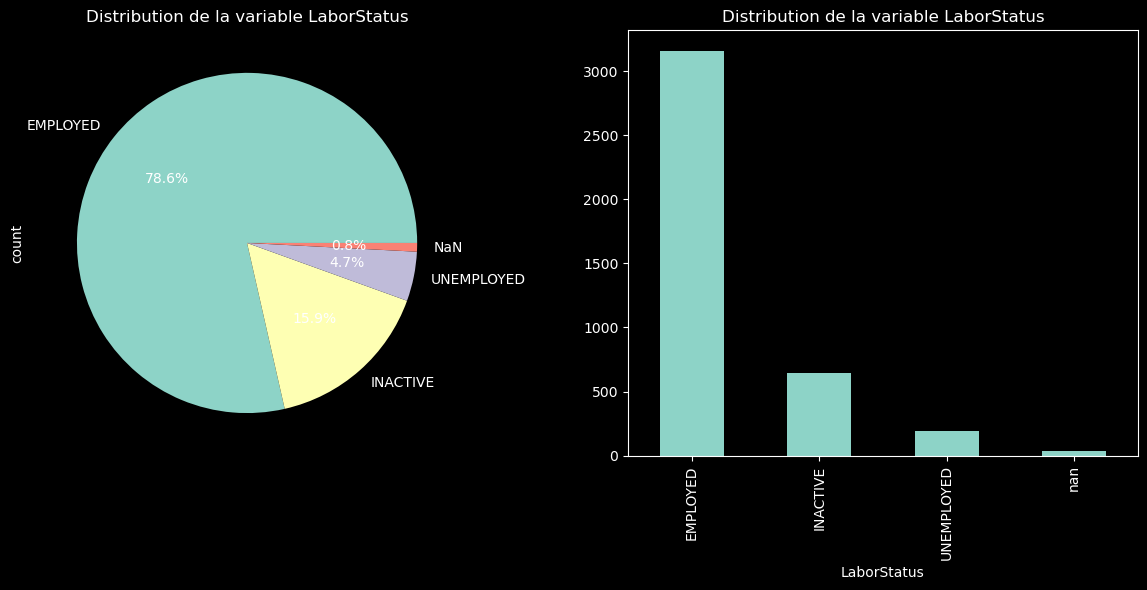

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

labels = ['EMPLOYED','INACTIVE','UNEMPLOYED','NaN']

df['LaborStatus'].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%', labels=labels, ax=axs[0])
axs[0].set_title('Distribution de la variable LaborStatus')

df['LaborStatus'].value_counts(dropna=False).plot(kind='bar', ax=axs[1])
axs[1].set_title('Distribution de la variable LaborStatus')

plt.tight_layout()
plt.show()

## Analyse des données manquantes <a id='data-manq'></a>

In [274]:
# Tableau des valeurs manquantes par colonne
missing_values = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                             Missing Values  Percentage
LaborStatus                              33    0.820080
isLiterate                               24    0.596421
nYearsEducation                          24    0.596421
hasLoan                                   9    0.223658
yTotalHouseholdSpendings                  3    0.074553
yTotalHouseholdSpendingsUSD               3    0.074553
ID                                        0    0.000000
GDP_variation                             0    0.000000
Weight                                    0    0.000000
Age                                       0    0.000000
HouseholdSize                             0    0.000000
isMale                                    0    0.000000
isMarried                                 0    0.000000
isUrban                                   0    0.000000
hasAccount                                0    0.000000
isHouseOwner                              0    0.000000


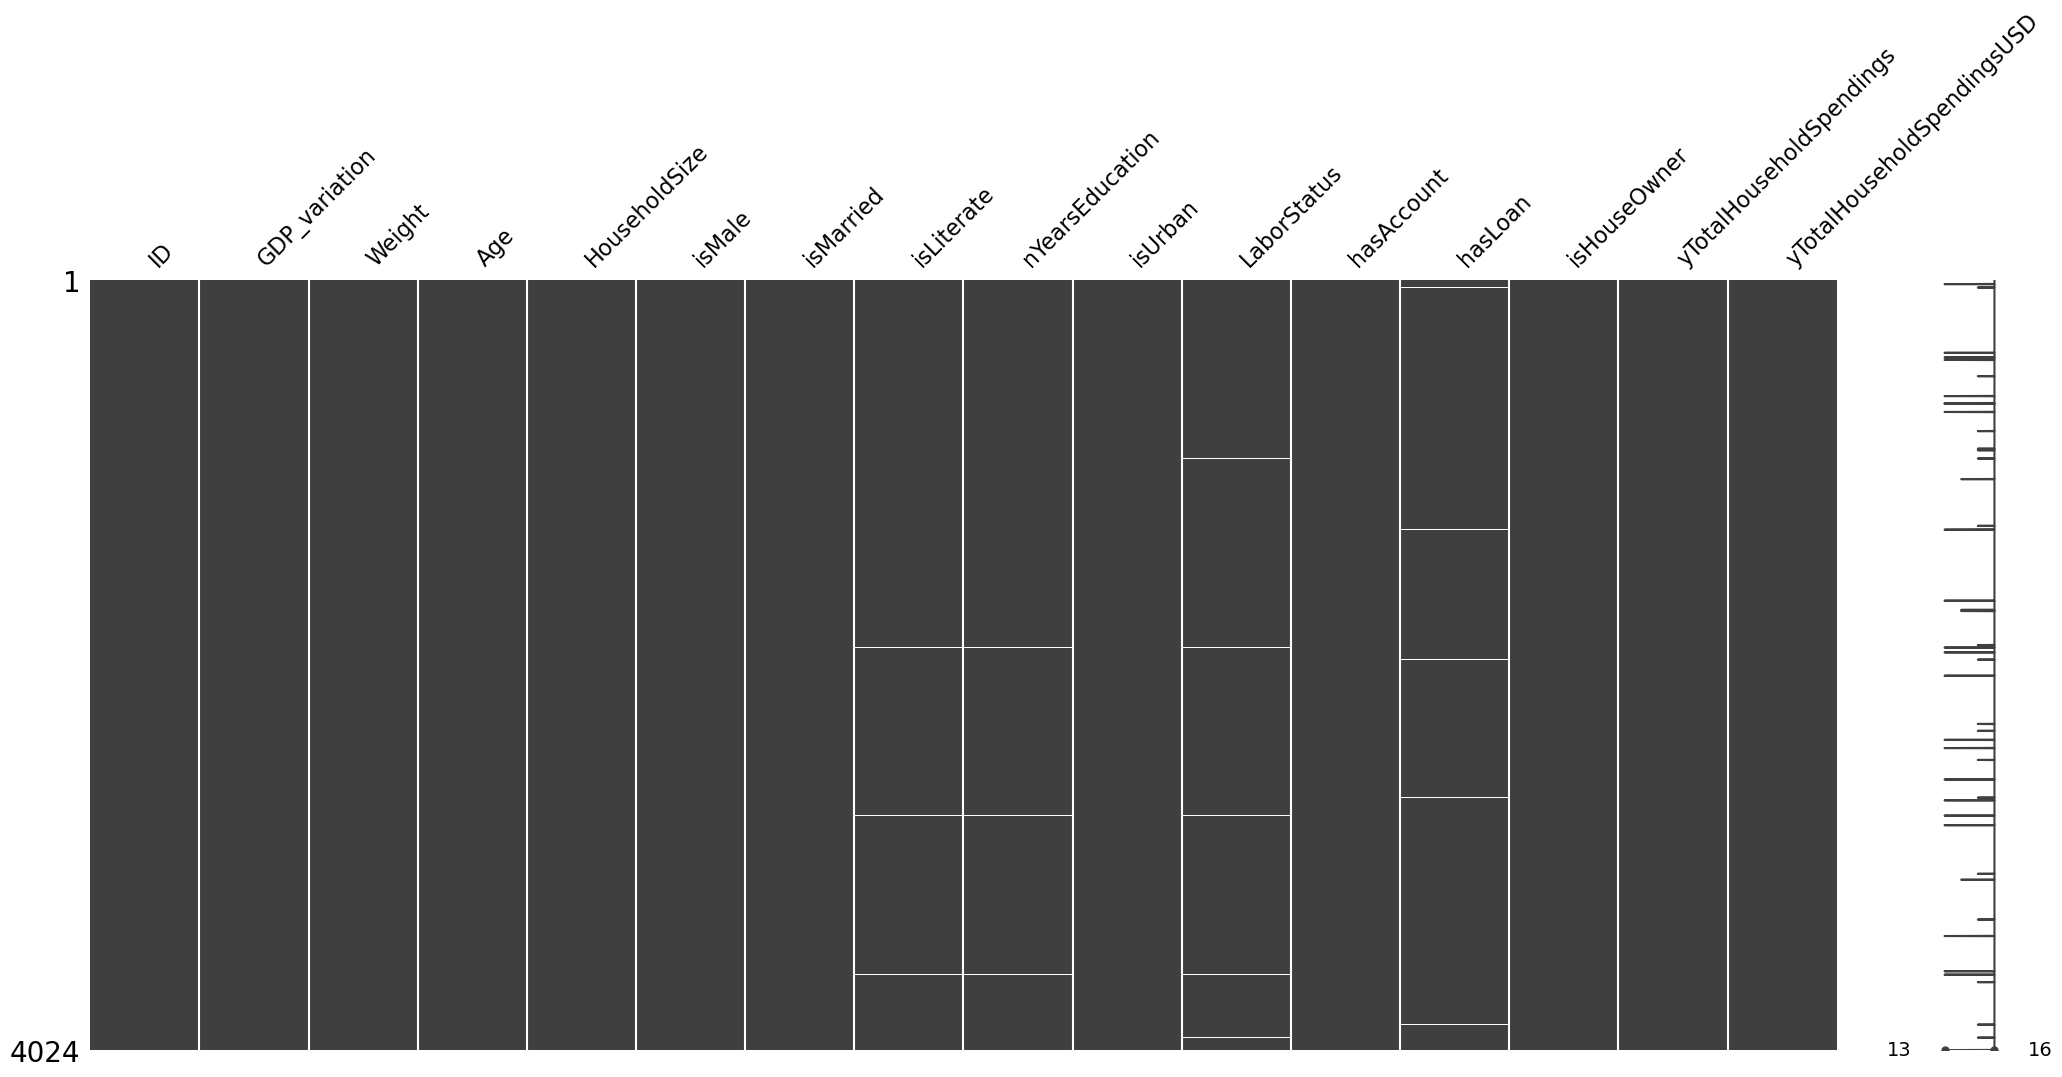

In [37]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(df)
plt.show();

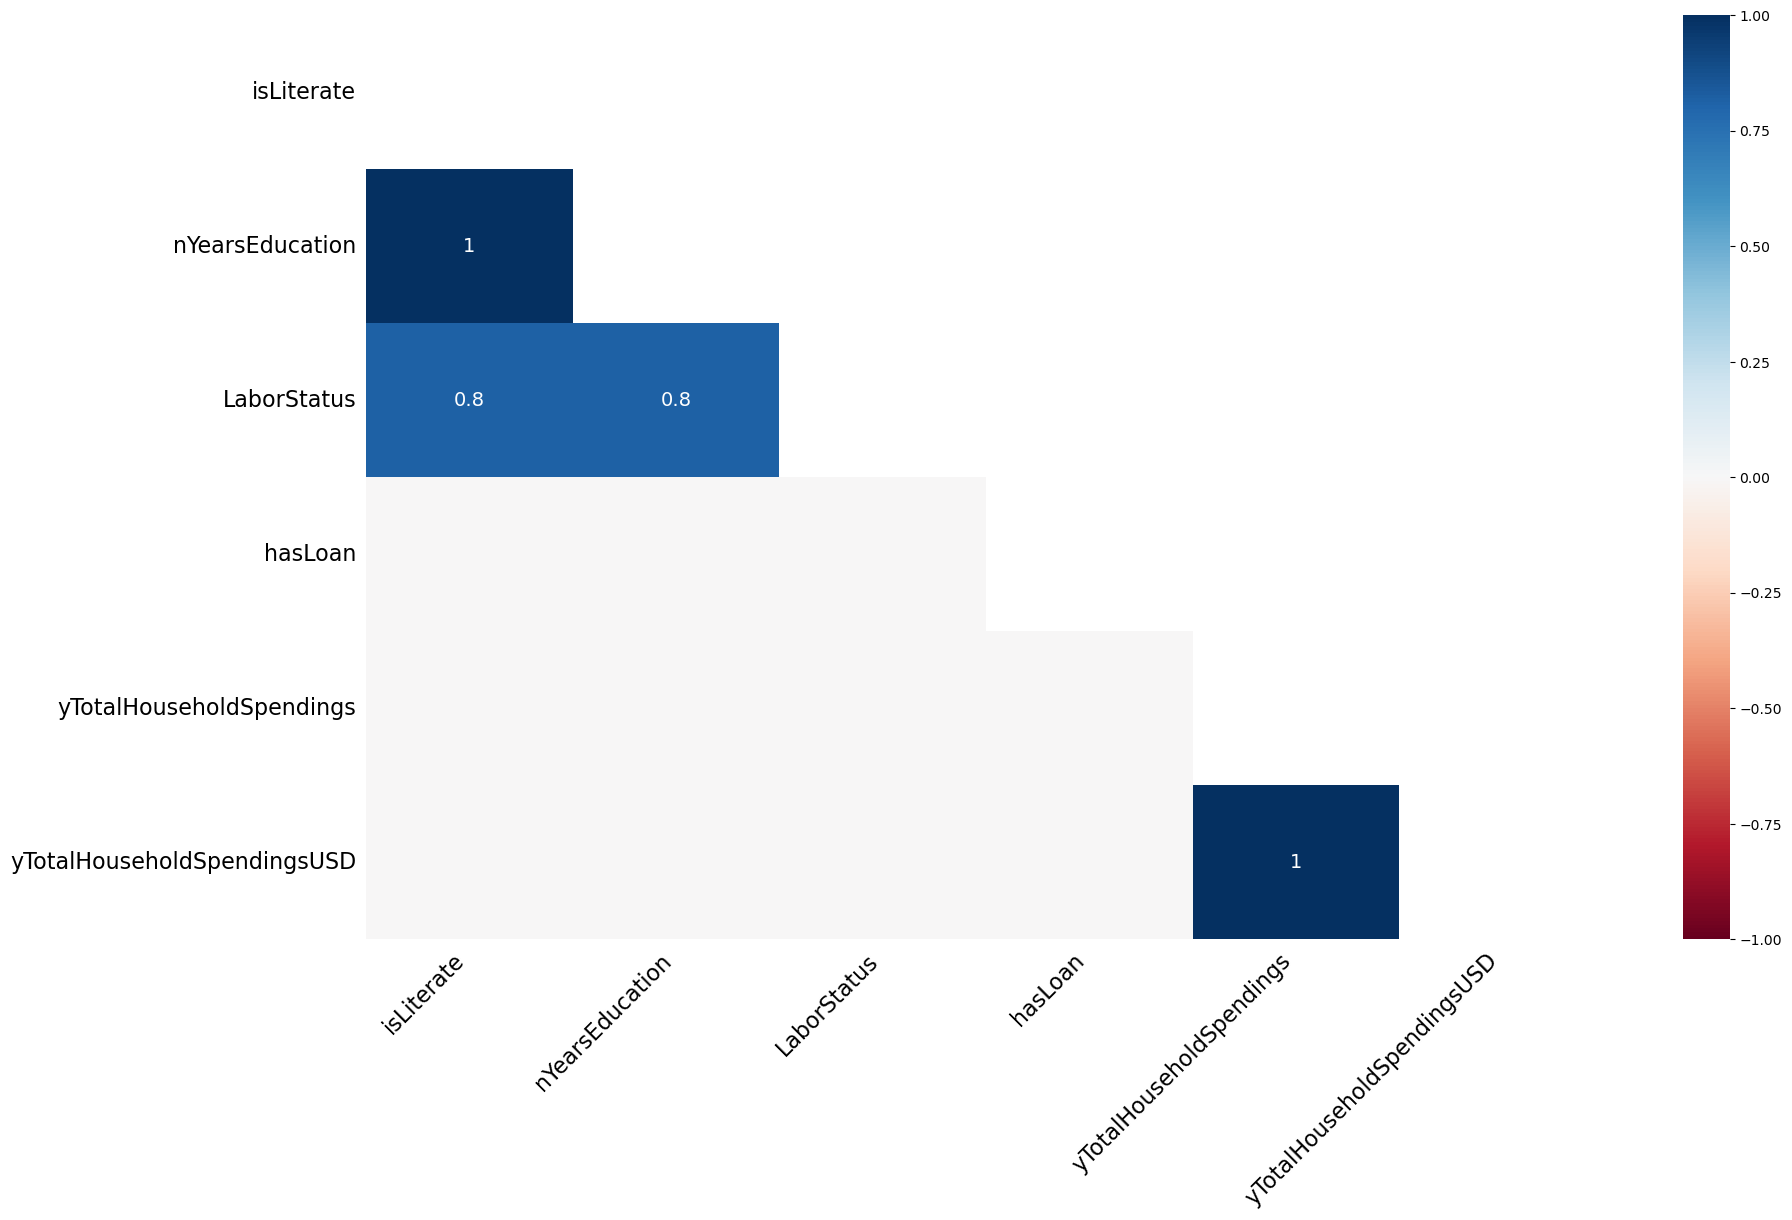

In [38]:
# Analyser la corrélation entre les valeurs manquantes
msno.heatmap(df)
plt.show();

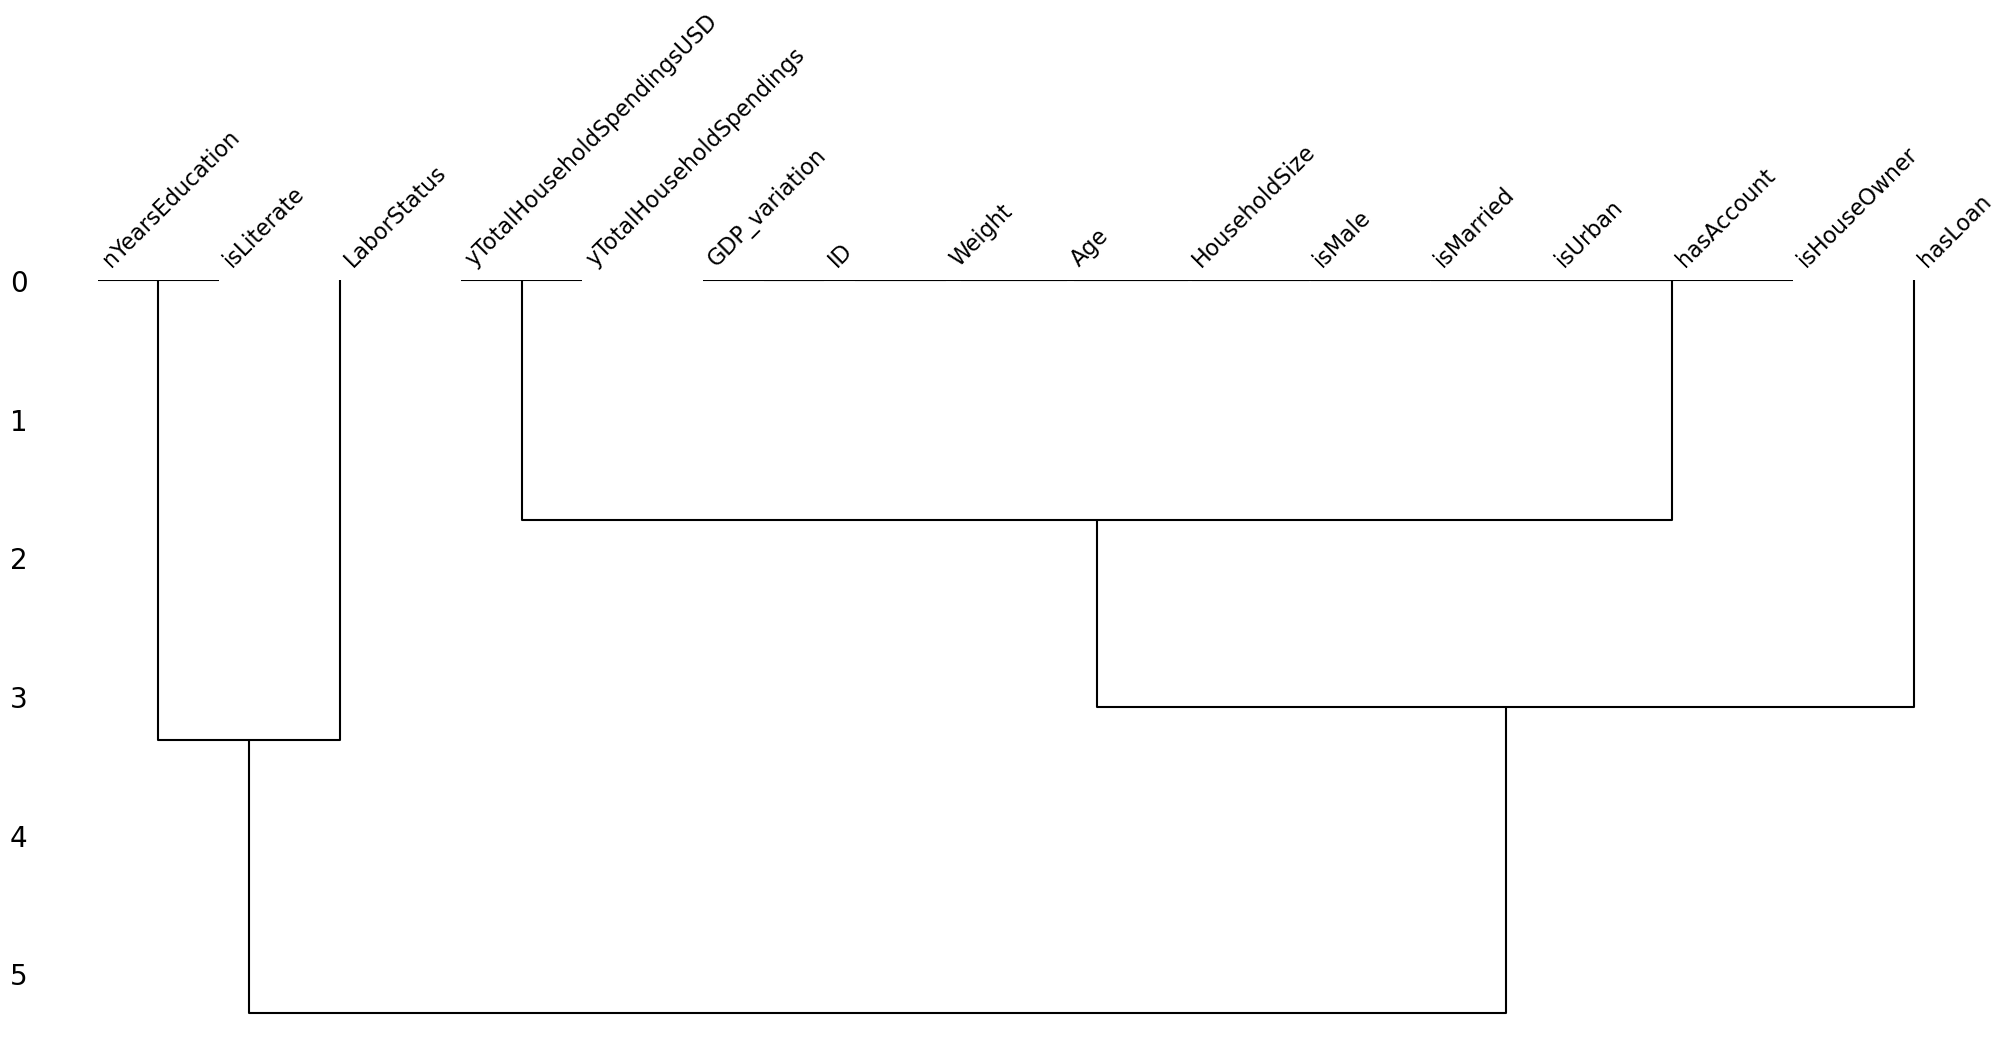

In [39]:
msno.dendrogram(df)
plt.show();

In [218]:
select_rows_with_missing_values(df, ['isLiterate', 'LaborStatus','nYearsEducation'])

isLiterate LaborStatus  nYearsEducation
21           NaN         NaN              NaN
380          NaN         NaN              NaN
404          NaN         NaN              NaN
417          NaN         NaN              NaN
502          0.0         NaN              0.0
606          NaN         NaN              NaN
643          NaN         NaN              NaN
646          NaN         NaN              NaN
689          NaN         NaN              NaN
881          1.0         NaN             11.0
889          1.0         NaN              6.0
932          1.0         NaN             12.0
1284         1.0         NaN              5.0
1304         NaN         NaN              NaN
1675         NaN         NaN              NaN
1729         NaN    EMPLOYED              NaN
1907         1.0         NaN              9.0
1920         NaN         NaN              NaN
1945         NaN         NaN              NaN
2067         NaN         NaN              NaN
2402         NaN         NaN              NaN
2445         NaN         NaN              NaN
2507         1.0         NaN              6.0
2609         NaN         NaN              NaN
2718         NaN         NaN              NaN
2798         NaN         NaN              NaN
2848         NaN         NaN              NaN
3102         1.0         NaN             11.0
3341         1.0         NaN              4.0
3427         NaN         NaN              NaN
3611         NaN         NaN              NaN
3629         NaN         NaN              NaN
3958         1.0         NaN             11.0
4023         NaN         NaN              NaN

In [219]:
# Imputation par KNN Imputer
# KNN imputer avec 3 voisins pour plusieurs colonnes

imputer = KNNImputer(n_neighbors=3)

df[['yTotalHouseholdSpendingsUSD', 'yTotalHouseholdSpendings','nYearsEducation']] = imputer.fit_transform(df[['yTotalHouseholdSpendingsUSD', 'yTotalHouseholdSpendings','nYearsEducation']])

df.isnull().sum()

ID                              0
GDP_variation                   0
Weight                          0
Age                             0
HouseholdSize                   0
isMale                          0
isMarried                       0
isLiterate                     24
nYearsEducation                 0
isUrban                         0
LaborStatus                    33
hasAccount                      0
hasLoan                         9
isHouseOwner                    0
yTotalHouseholdSpendings        0
yTotalHouseholdSpendingsUSD     0
dtype: int64

KNN Imputer est un puissant outil d'imputation de valeurs manquantes car il préserve les relations entre les variables, la structure des données, les corrélations et prend en compte les informations sur les échantillons voisins.

In [220]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [221]:
# Imputation par le mode
imputer_mode = SimpleImputer(strategy='most_frequent')
df['isLiterate'] = imputer_mode.fit_transform(df[['isLiterate']])
df['hasLoan'] = imputer_mode.fit_transform(df[['hasLoan']])

Les variables isLiterate et hasLoan sont toutes deux booléennes (ou peuvent être traitées comme catégoriques). Remplir ces variables avec la valeur la plus fréquente est un choix naturel car cela préserve la nature catégorielle de la variable et la distribution des données, ce qui peut être important pour les modèles d'apprentissage automatique sensibles aux changements dans la distribution des données.

In [222]:
#Conversion de variables booléennes en int:
df[['isLiterate', 'hasAccount', 'hasLoan', 'isHouseOwner','isMarried']] = df[['isLiterate', 'hasAccount', 'hasLoan', 'isHouseOwner','isMarried']].astype(int)

In [223]:
df.loc[:, 'LaborStatus']  = df['LaborStatus'].fillna('EMPLOYED')


Dans les données, la plupart des enregistrements pour LaborStatus sont « EMPLOYÉ », remplir les valeurs manquantes avec cette valeur peut être un choix logique. Cela minimise l'impact des valeurs manquantes sur l'analyse tout en préservant la répartition des données.

In [224]:
df['LaborStatus'].value_counts()

LaborStatus
EMPLOYED      3194
INACTIVE       641
UNEMPLOYED     189
Name: count, dtype: int64

In [225]:
#Codage de la variable catégorielle LaborStatus
label_encoder = LabelEncoder()
df['LaborStatus'] = label_encoder.fit_transform(df['LaborStatus']).astype(int)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4024 non-null   int64  
 1   GDP_variation                4024 non-null   float64
 2   Weight                       4024 non-null   int64  
 3   Age                          4024 non-null   float64
 4   HouseholdSize                4024 non-null   int64  
 5   isMale                       4024 non-null   int64  
 6   isMarried                    4024 non-null   int64  
 7   isLiterate                   4024 non-null   int64  
 8   nYearsEducation              4024 non-null   float64
 9   isUrban                      4024 non-null   int64  
 10  LaborStatus                  4024 non-null   int64  
 11  hasAccount                   4024 non-null   int64  
 12  hasLoan                      4024 non-null   int64  
 13  isHouseOwner      

# Traitement des doublons <a id='data-doub'></a>

In [227]:
df[df.duplicated(subset=['ID'], keep=False)].shape[0]

24

In [228]:
df[df.duplicated(subset=['ID'], keep=False)]

ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
208   423581       0.093446     155  62.0              1       0          0  \
231   985189       0.093446     256  57.0              5       1          1   
551    13305       0.093446     104  42.0              9       0          1   
645   633238       0.093446      67  70.0              3       1          0   
1093  985189       0.093446     113  70.0              6       1          1   
1132  219242       0.093446     348  63.0              6       1          1   
1274  866187       0.093446     239  30.0              6       1          1   
1314  786787       0.093446     135  40.0              4       0          0   
1427   35657       0.093446     241  38.0             12       1          0   
2127  633238       0.093446      67  70.0              3       0          0   
2166  786787       0.093446     135  40.0              4       0          0   
2375  298818       0.093446     194  48.0              6       1          1   
2441   35657       0.093446     241  38.0             12       0          0   
2479  219242       0.093446     348  63.0              6       0          1   
2591  798939       0.093446     201  28.0              6       1          1   
2613  866187       0.093446     239  30.0              6       0          1   
2820  298818       0.093446      81  33.0              9       1          1   
2822  995311       0.093446     248  38.0              8       1          1   
2927  995311       0.093446    1431  56.0              6       0          0   
3096  362644       0.093446     205  90.0              5       1          0   
3263  798939       0.093446     201  28.0              6       1          1   
3330  423581       0.093446     369  60.0              4       1          1   
3400   13305       0.093446     104  42.0              9       1          1   
4021  362644       0.093446     205  90.0              5       1          0   

      isLiterate  nYearsEducation  isUrban  LaborStatus  hasAccount  hasLoan   
208            1              0.0        0            1           0        0  \
231            0              0.0        0            0           0        0   
551            1              4.0        0            2           0        0   
645            0              0.0        0            1           0        0   
1093           0              0.0        0            0           0        1   
1132           0              0.0        1            1           0        0   
1274           1              6.0        1            0           0        0   
1314           1             11.0        1            0           0        0   
1427           0              0.0        0            1           0        0   
2127           0              0.0        0            1           0        0   
2166           1             11.0        1            0           0        0   
2375           1             12.0        1            0           1        1   
2441           0              0.0        0            1           0        0   
2479           0              0.0        1            1           0        0   
2591           1              0.0        0            0           0        0   
2613           1              6.0        1            0           0        0   
2820           1              0.0        0            0           0        0   
2822           1             14.0        1            0           0        0   
2927           0              0.0        1            0           0        1   
3096           0              0.0        1            0           0        0   
3263           1              0.0        0            0           0        0   
3330           0              0.0        0            1           0        0   
3400           1              4.0        0            2           0        0   
4021           0              0.0        1            0           0        0   

      isHouseOwner  yTotalHouseho

In [229]:
duplicates_grouped = df[df.duplicated(subset=['ID'], keep=False)].groupby('ID')
for group_id, group_data in duplicates_grouped:
    print(f"ID: {group_id}\n{group_data}\n")
    print('----------------------------------------------------------------------------------------')


ID: 13305
         ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
551   13305       0.093446     104  42.0              9       0          1  \
3400  13305       0.093446     104  42.0              9       1          1   

      isLiterate  nYearsEducation  isUrban  LaborStatus  hasAccount  hasLoan   
551            1              4.0        0            2           0        0  \
3400           1              4.0        0            2           0        0   

      isHouseOwner  yTotalHouseholdSpendings  yTotalHouseholdSpendingsUSD  
551              1                    7200.0                   672.810449  
3400             1                    7200.0                   672.810449  

----------------------------------------------------------------------------------------
ID: 35657
         ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
1427  35657       0.093446     241  38.0             12       1          0  \
2441  35657       0.093446    

In [230]:
duplicates_subset = df[df.duplicated(subset=['ID'], keep=False)]

for idx, row in duplicates_subset.iterrows():
    duplicate_rows = df[df['ID'] == row['ID']]
    for col in df.columns:
        if col != 'ID':
            if len(duplicate_rows[col].unique()) > 1:
                print(f"For ID '{row['ID']} difference in column '{col}': {duplicate_rows[col].unique()}")
    print('----------------------------------------------------------------------------------------')


For ID '423581.0 difference in column 'Weight': [155 369]
For ID '423581.0 difference in column 'Age': [62. 60.]
For ID '423581.0 difference in column 'HouseholdSize': [1 4]
For ID '423581.0 difference in column 'isMale': [0 1]
For ID '423581.0 difference in column 'isMarried': [0 1]
For ID '423581.0 difference in column 'isLiterate': [1 0]
For ID '423581.0 difference in column 'isHouseOwner': [1 0]
For ID '423581.0 difference in column 'yTotalHouseholdSpendings': [585.6   0. ]
For ID '423581.0 difference in column 'yTotalHouseholdSpendingsUSD': [54.72191772  0.        ]
----------------------------------------------------------------------------------------
For ID '985189.0 difference in column 'Weight': [256 113]
For ID '985189.0 difference in column 'Age': [57. 70.]
For ID '985189.0 difference in column 'HouseholdSize': [5 6]
For ID '985189.0 difference in column 'hasLoan': [0 1]
For ID '985189.0 difference in column 'yTotalHouseholdSpendings': [34502.4 16640. ]
For ID '985189.0 dif

1. Données complètement différentes pour ID :
    - 995311 (index 2822 et 2927)
    - 985189 (index 1093, 231)
    - 423581 (index 208 et 3330)
    - 298818 (index 2375 et 2820)
2. Données ne diffèrent que par la valeur de la variable isMale pour ID :
    - 866187 (index 1274 et 2613)
    - 633238 (index 645 et 2127)
    - 219242 (index 1132 et 2479)
    - 35657 (index 1427 et 2441)
    - 13305 (index 551 et 3400)
3. Toutes les valeurs sont égales pour ID :
    - 798939 (index 2591 et 3263)
    - 786787 (index 1314 et 2166)
    - 362644 (index 3096 et 4021)


In [231]:
# Obtenir ID maximum dans les données
max_id = df['ID'].max()

# Changer ID pour le deuxième index de chaque paire de doublons 
df.loc[2927, 'ID'] = max_id + 1
df.loc[231, 'ID'] = max_id + 2
df.loc[3330, 'ID'] = max_id + 3
df.loc[2820, 'ID'] = max_id + 4


In [232]:
df[df.duplicated(subset=['ID'], keep=False)].shape[0]

16

In [233]:
# Nous sélectionnons la première valeur de chaque paire de doublons et la laissons, les autres sont supprimées
df.drop_duplicates(subset=['ID'], keep='first', inplace=True)


In [234]:
df[df.duplicated(subset=['ID'], keep=False)].shape[0]

0

In [235]:
df.shape

(4016, 16)

<a id='data-analysis'></a>
# Analyse des données

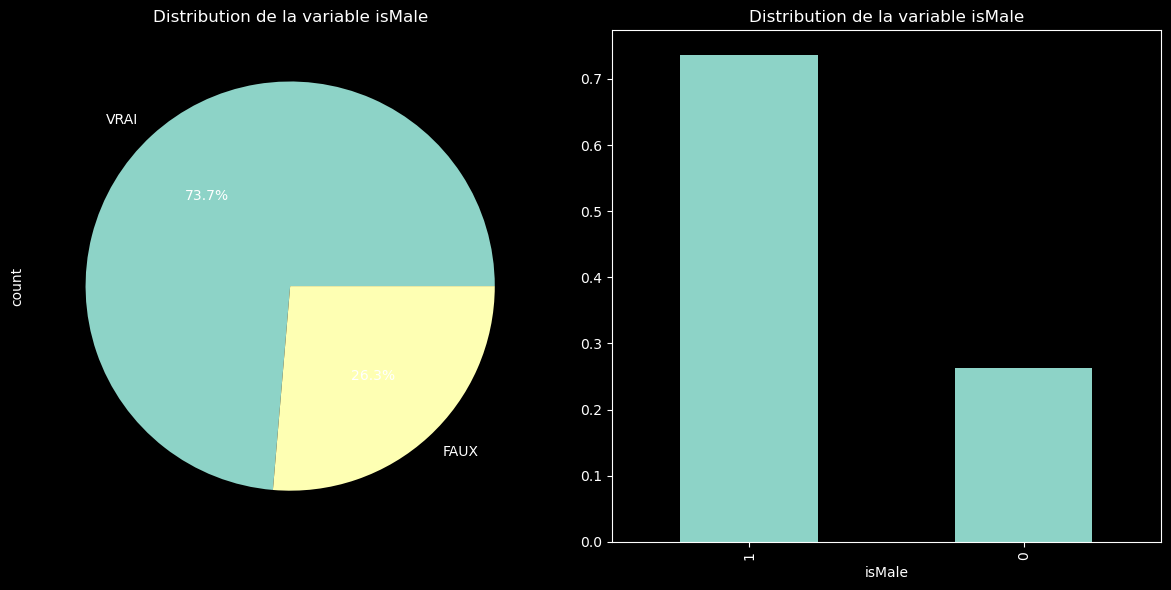

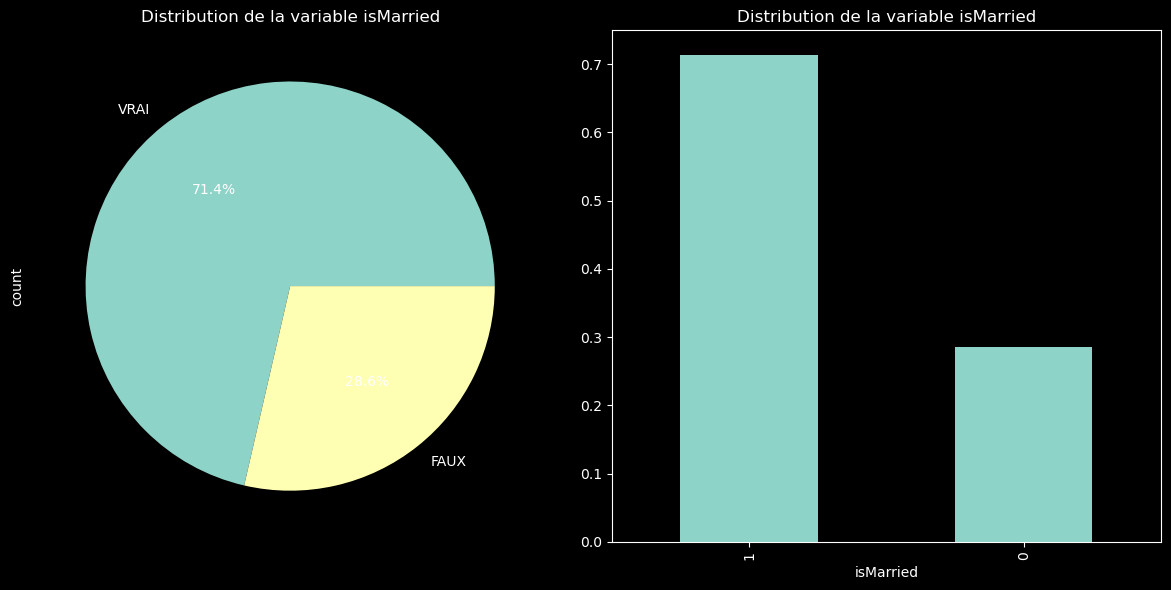

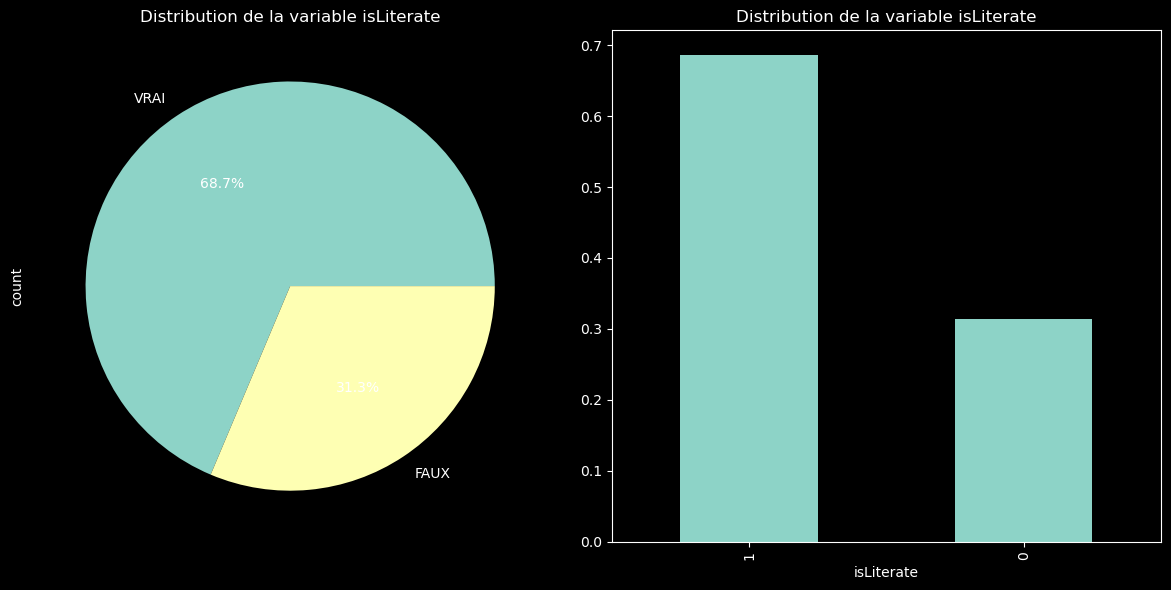

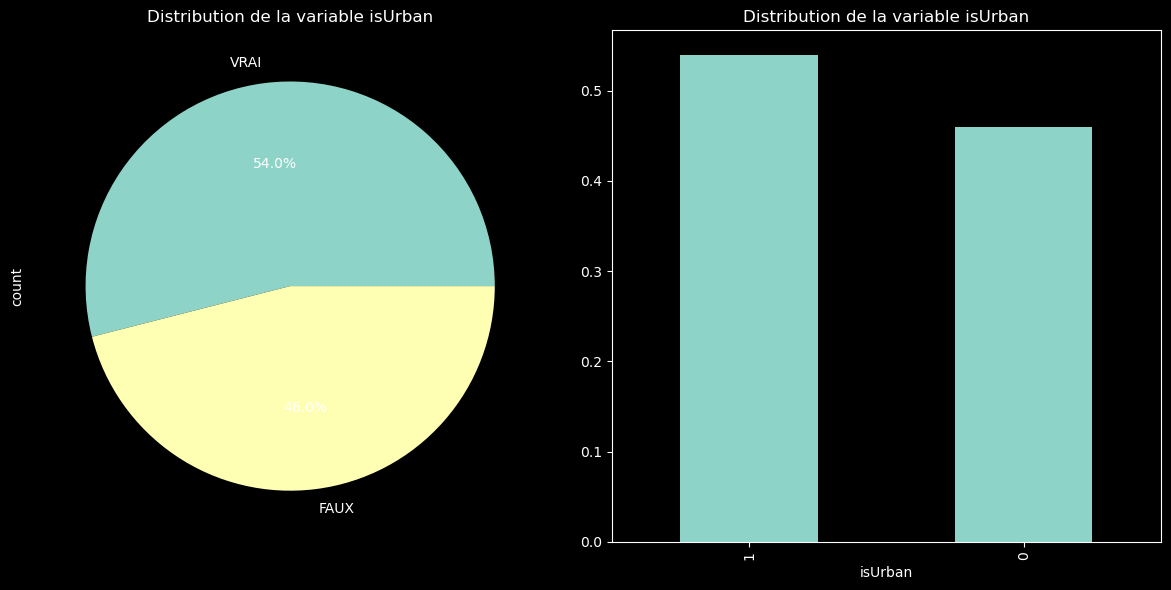

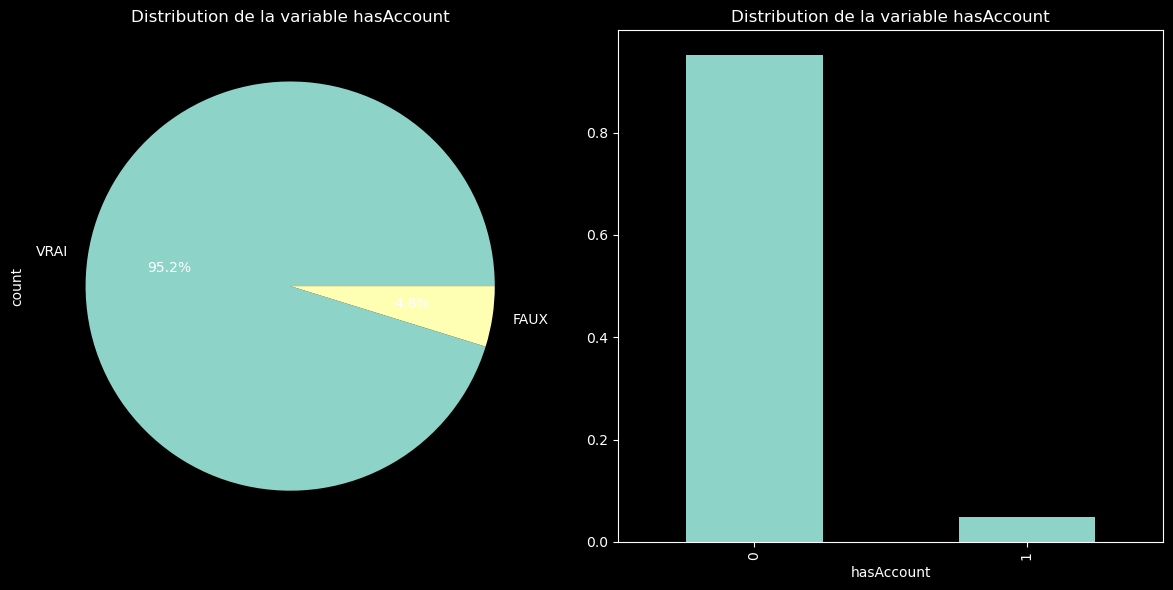

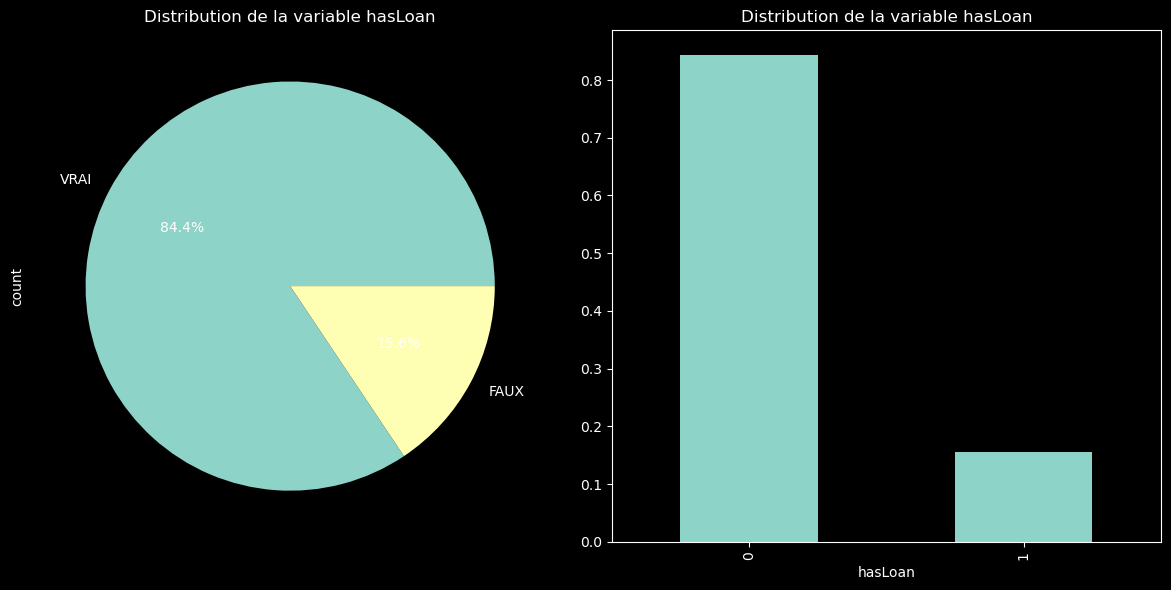

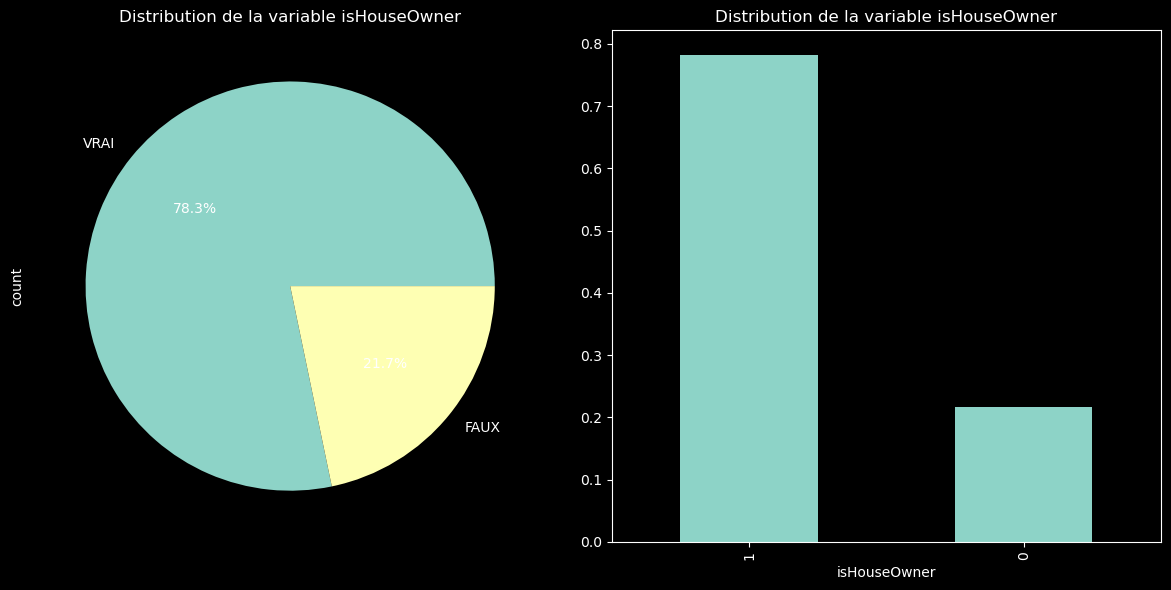

In [64]:
col=['isMale', 'isMarried', 'isLiterate', 'isUrban', 'hasAccount', 'hasLoan', 'isHouseOwner']
for i in col:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    labels = ['VRAI', 'FAUX']
    df[i].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%', labels=labels, ax=axs[0])
    axs[0].set_title(f'Distribution de la variable {i}')

    df[i].value_counts(dropna=False, normalize=True).plot(kind='bar', ax=axs[1])
    axs[1].set_title(f'Distribution de la variable {i}')

    plt.tight_layout()
    plt.show()

In [65]:
df.describe()

ID  GDP_variation       Weight          Age  HouseholdSize   
count    4016.000000   4.016000e+03  4016.000000  4016.000000    4016.000000  \
mean   501188.170568   9.344590e-02   220.455677    45.572211       5.488048   
std    288797.931402   2.775903e-17   179.966066    16.018942       2.785187   
min       106.000000   9.344590e-02  -213.000000    -2.000000       1.000000   
25%    254361.000000   9.344590e-02   137.000000    33.000000       4.000000   
50%    492900.500000   9.344590e-02   176.000000    43.000000       5.000000   
75%    757083.000000   9.344590e-02   233.000000    56.000000       7.000000   
max    999938.000000   9.344590e-02  2150.000000   220.000000      22.000000   

            isMale    isMarried   isLiterate  nYearsEducation      isUrban   
count  4016.000000  4016.000000  4016.000000      4016.000000  4016.000000  \
mean      0.736554     0.713894     0.686504         4.091716     0.539841   
std       0.440557     0.451996     0.463972         4.228223     0.498472   
min       0.000000     0.000000     0.000000         0.000000     0.000000   
25%       0.000000     0.000000     0.000000         0.000000     0.000000   
50%       1.000000     1.000000     1.000000         3.000000     1.000000   
75%       1.000000     1.000000     1.000000         6.000000     1.000000   
max       1.000000     1.000000     1.000000        17.000000     1.000000   

       LaborStatus   hasAccount      hasLoan  isHouseOwner   
count  4016.000000  4016.000000  4016.000000   4016.000000  \
mean      0.252490     0.047809     0.156125      0.782620   
std       0.531446     0.213388     0.363019      0.412515   
min       0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000      1.000000   
50%       0.000000     0.000000     0.000000      1.000000   
75%       0.000000     0.000000     0.000000      1.000000   
max       2.000000     1.000000     1.000000      1.000000   

       yTotalHouseholdSpendings  yTotalHouseholdSpendingsUSD  
count              4.016000e+03                  4016.000000  
mean               2.267523e+04                  2118.907605  
std                4.075598e+04                  3808.479508  
min                0.000000e+00                     0.000000  
25%                6.925500e+03                   647.159570  
50%                1.357400e+04                  1268.434619  
75%                2.568480e+04                  2400.139160  
max                1.347197e+06                125890.012500

### Répartition des données et outliers <a id='data-out'></a>

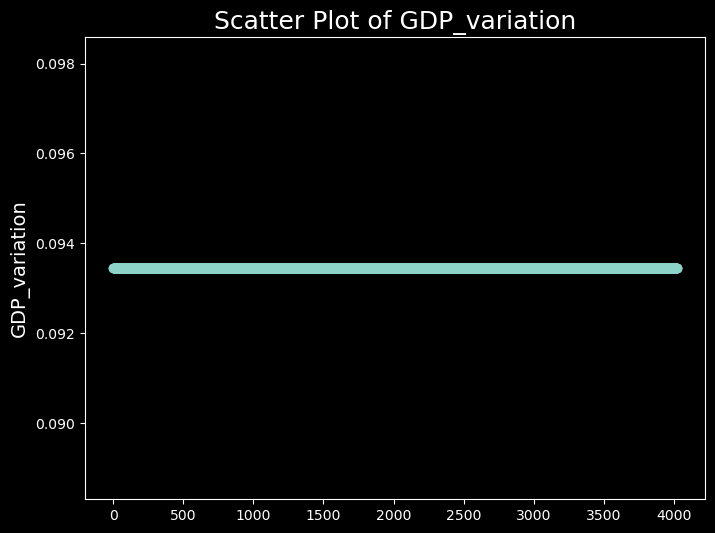

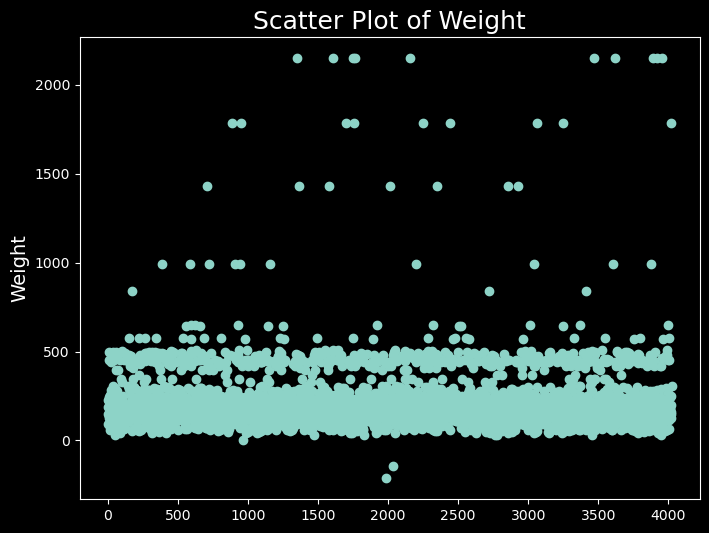

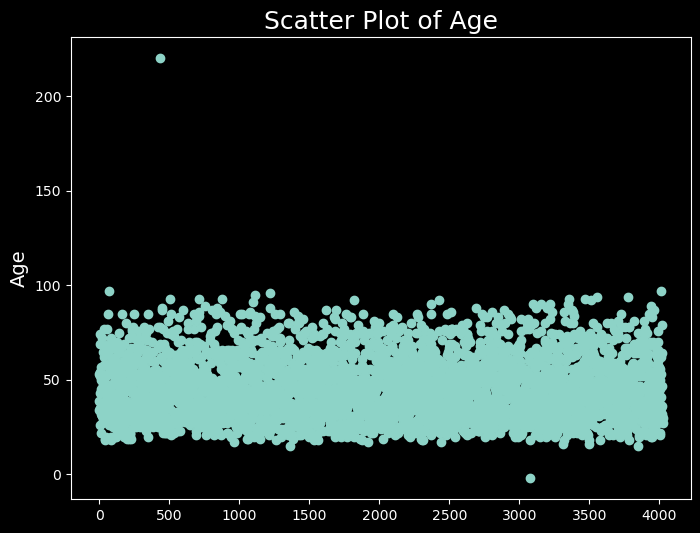

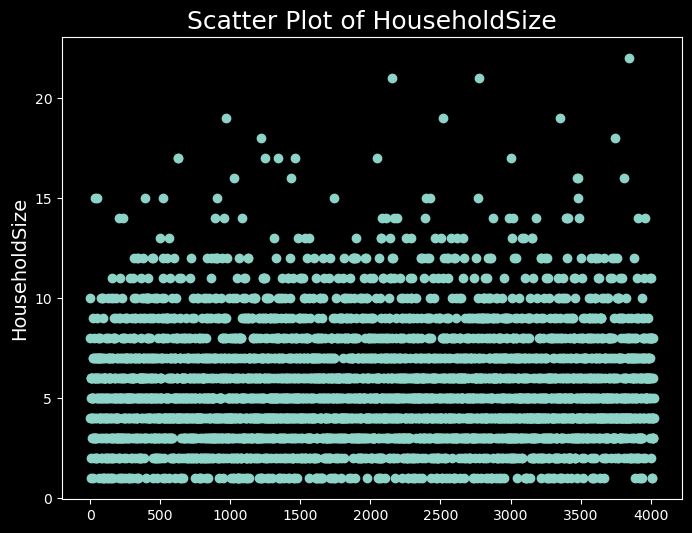

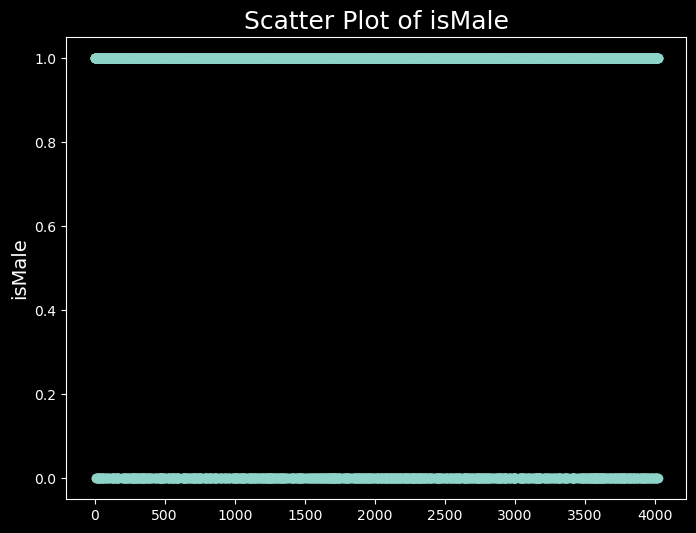

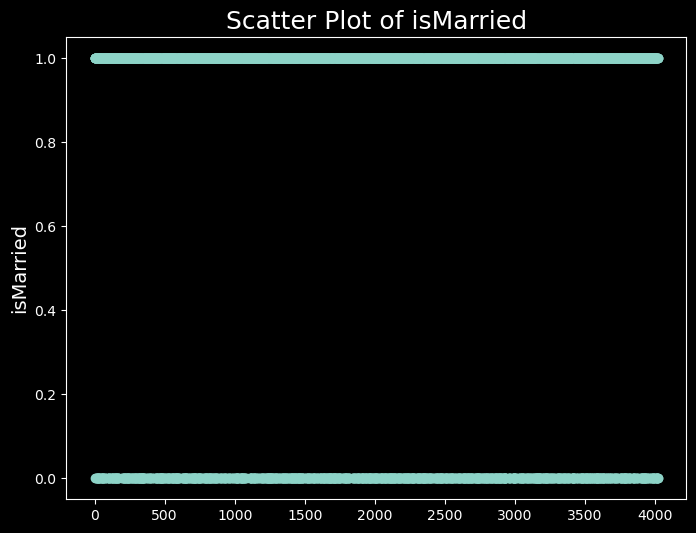

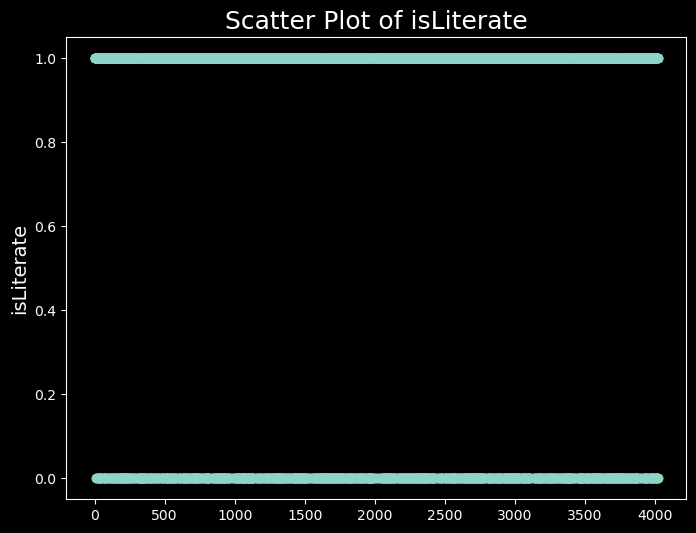

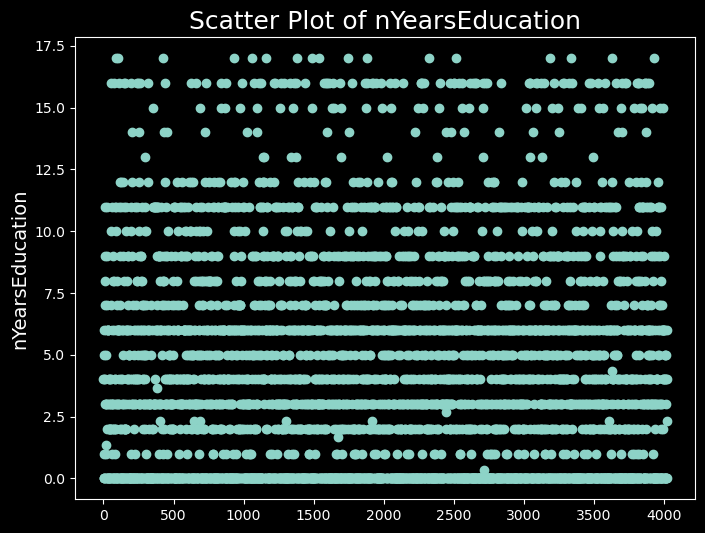

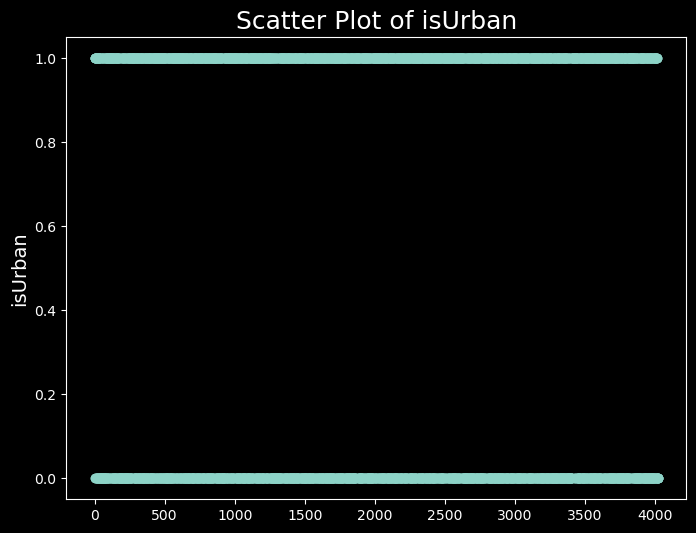

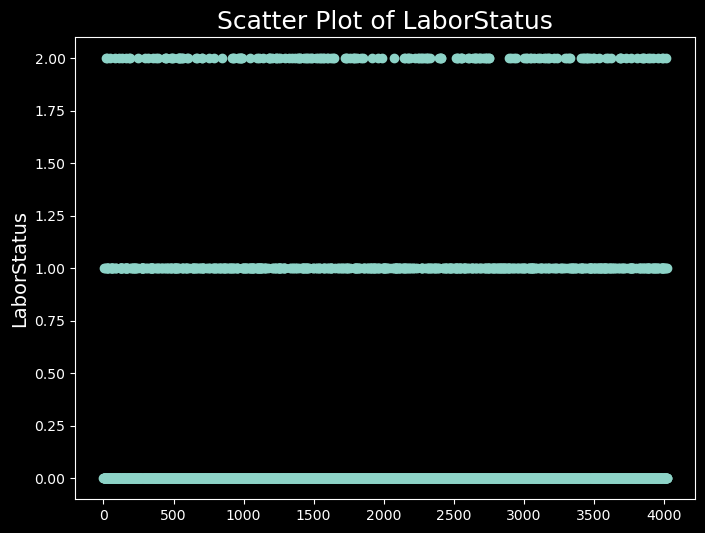

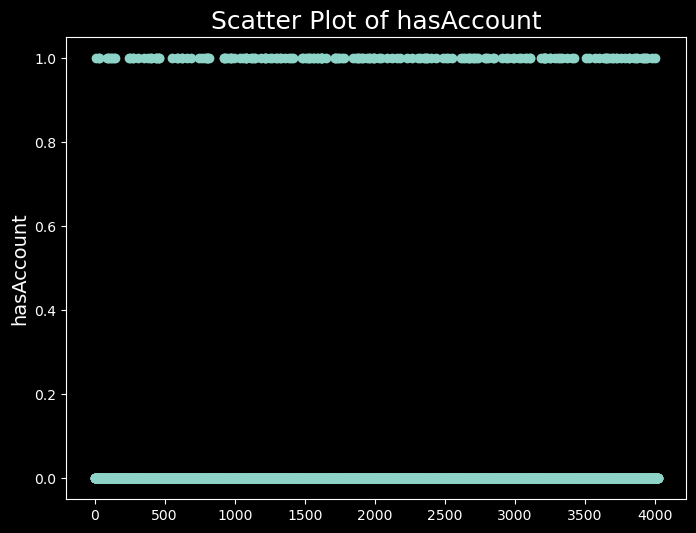

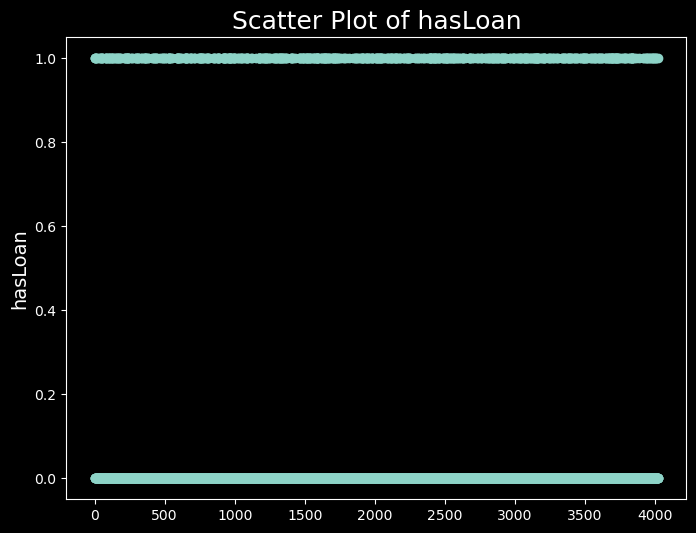

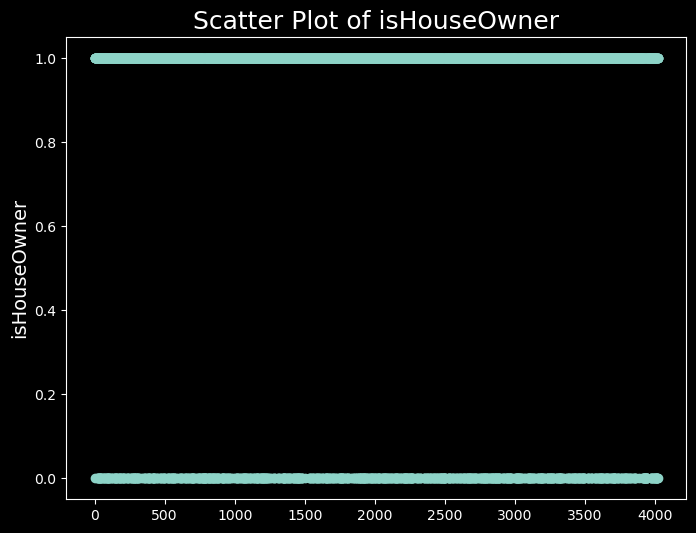

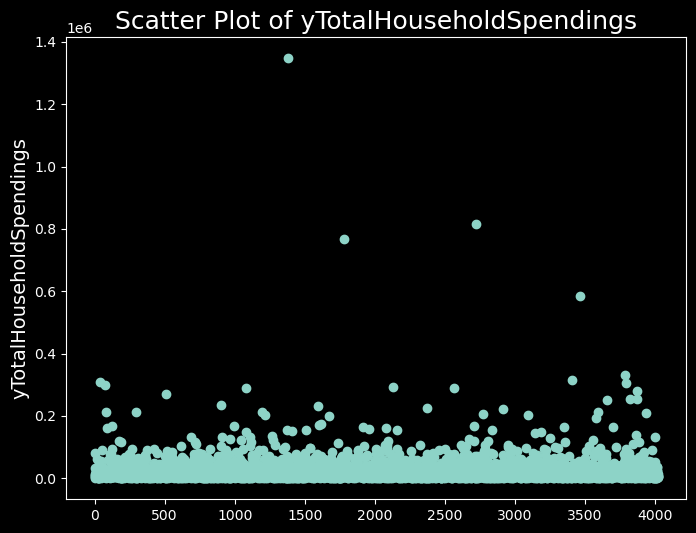

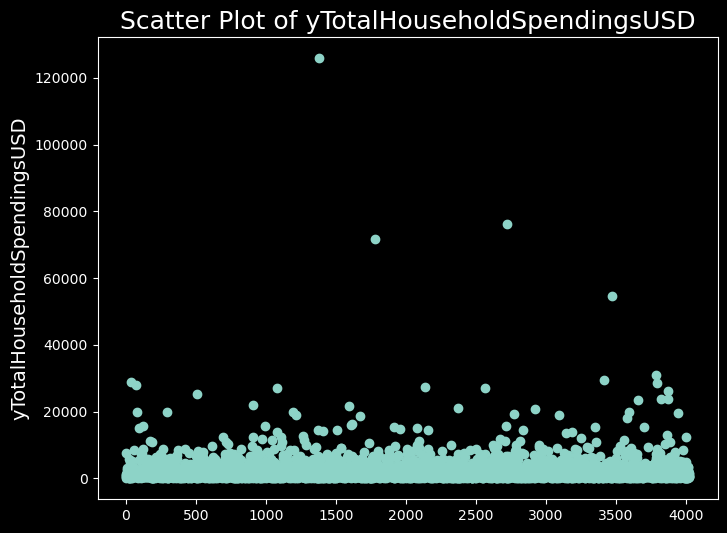

In [66]:
# Afin de se familiariser avec le dataset nous allons afficher chacune des composantes
_df=df.drop(['ID'], axis=1)

for column in _df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(_df.index, _df[column])
    plt.title(f'Scatter Plot of {column}', fontsize=18)
    plt.ylabel(column, fontsize=14)
    plt.show()

In [236]:
#Analyse skewness 
#Le but est d'analyser la répartition et la symétrie des données pour voir si il y a des outliers
_df.skew()

GDP_variation                   0.000000
Weight                          5.579625
Age                             0.863932
HouseholdSize                   1.045963
isMale                         -1.074420
isMarried                      -0.946916
isLiterate                     -0.804346
nYearsEducation                 0.989879
isUrban                        -0.159931
LaborStatus                     2.022764
hasAccount                      4.240319
hasLoan                         1.895468
isHouseOwner                   -1.370910
yTotalHouseholdSpendings       14.243757
yTotalHouseholdSpendingsUSD    14.243757
dtype: float64

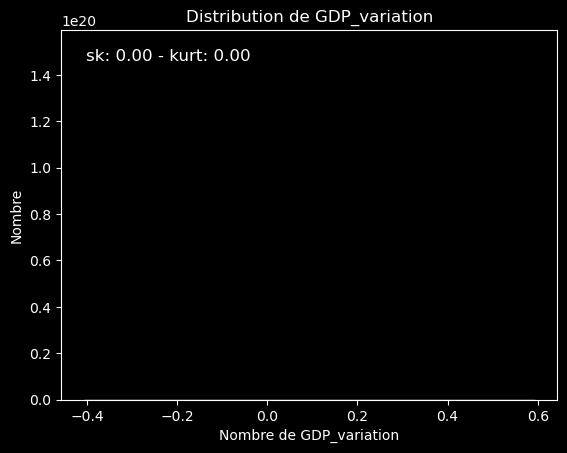

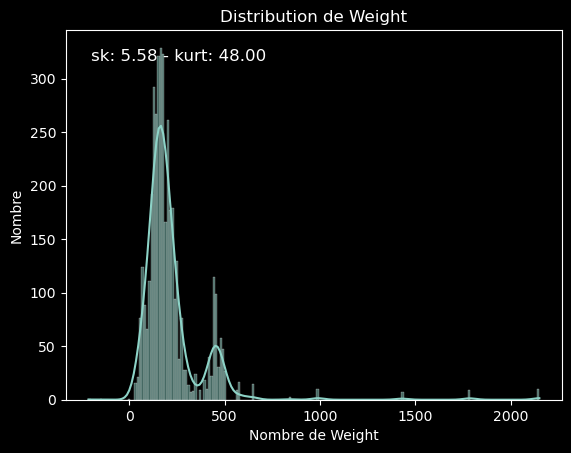

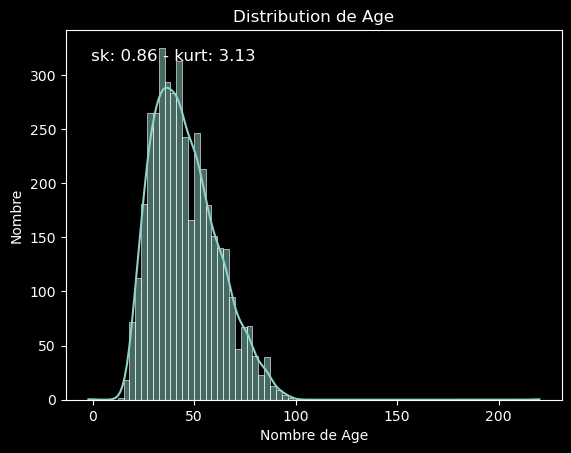

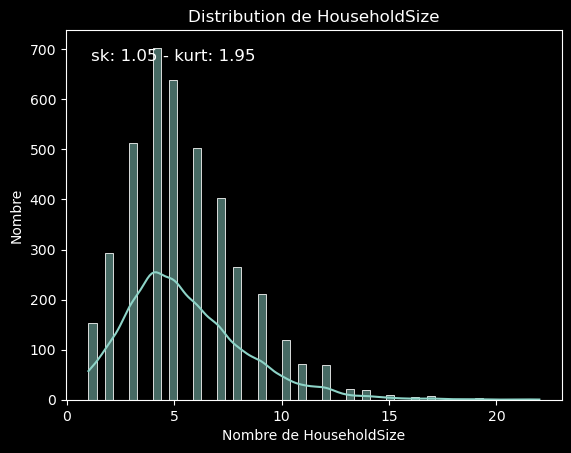

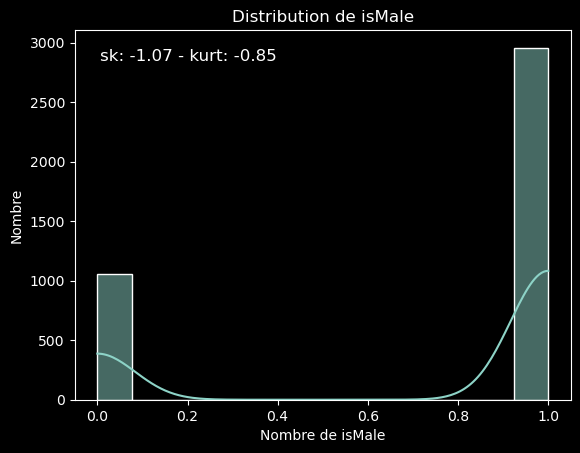

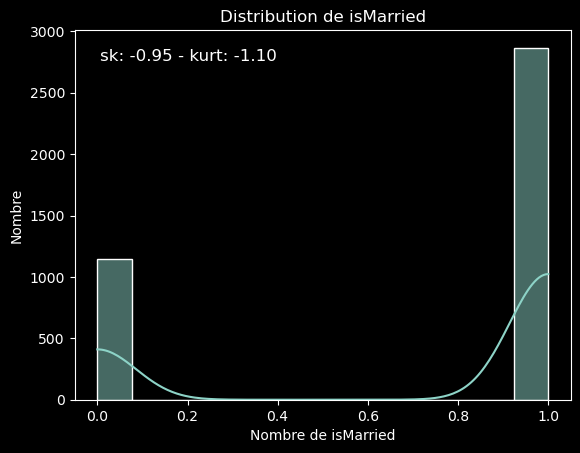

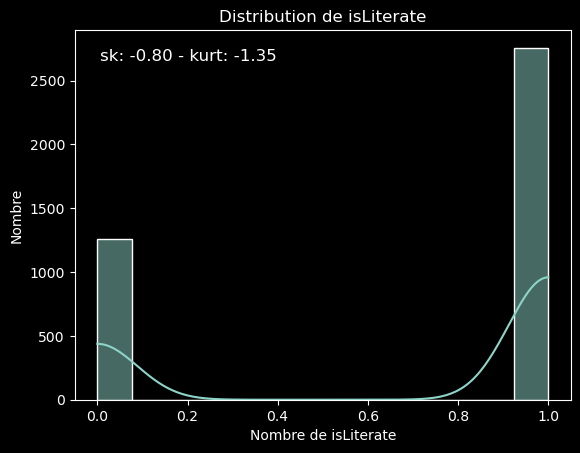

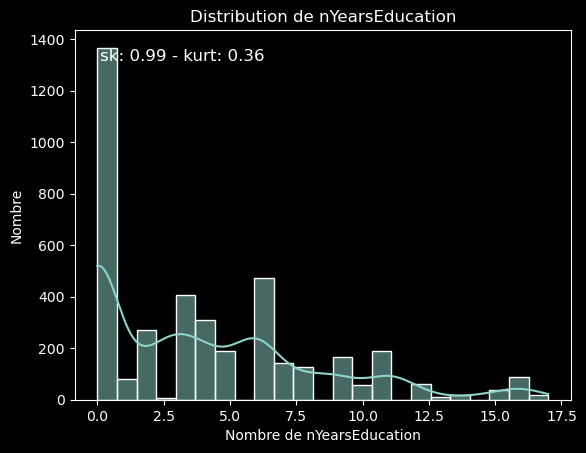

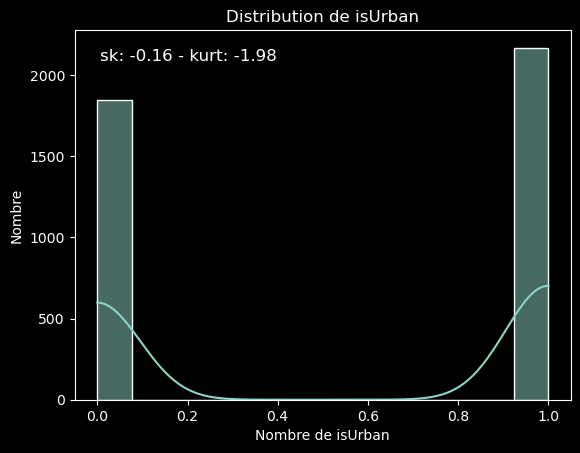

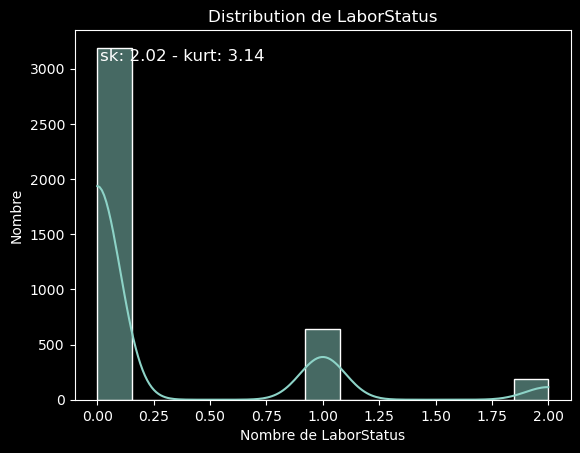

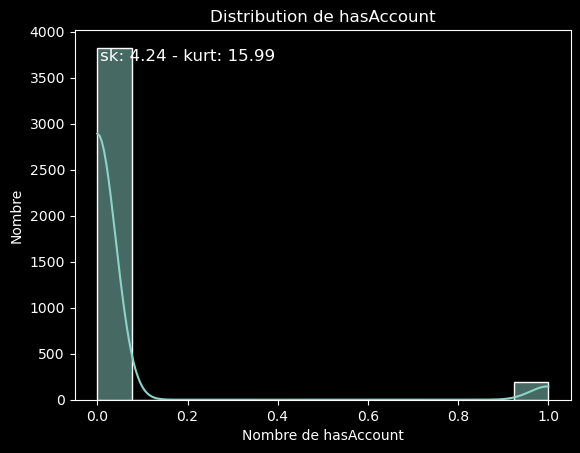

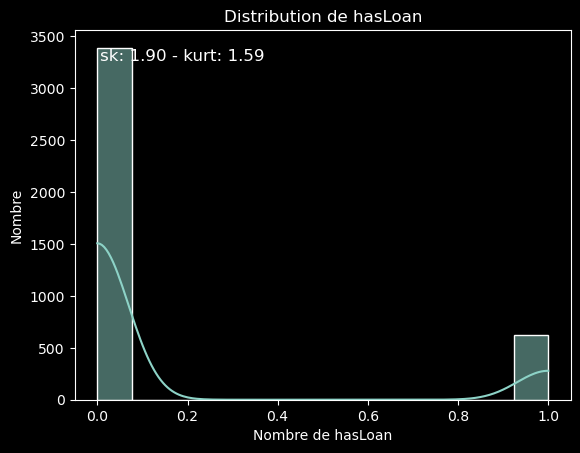

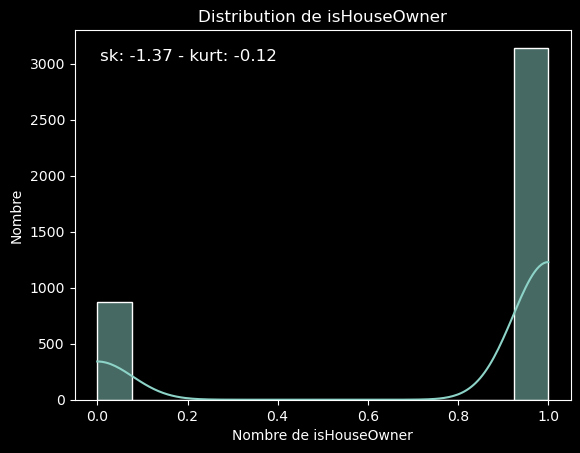

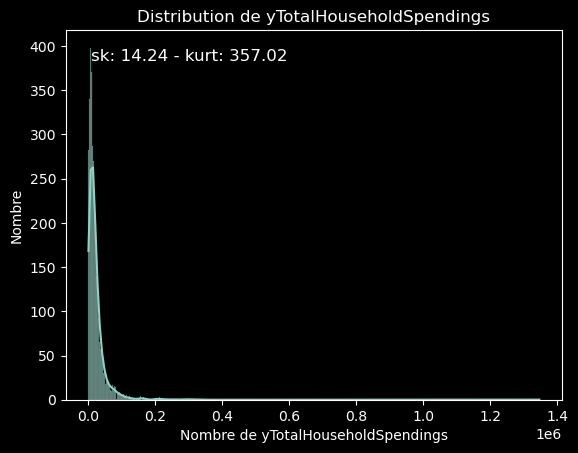

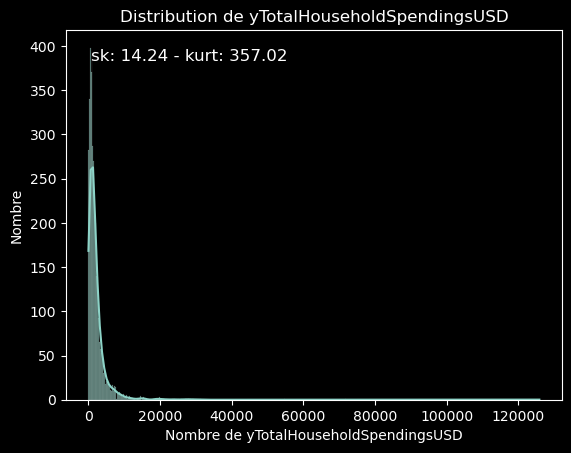

In [68]:
# Histogramme des variables & analyse skewness & kurtosis
for i in _df.columns:
    sns.histplot(_df[i], kde=True)
    plt.title(f'Distribution de {i}')
    plt.xlabel(f'Nombre de {i}')
    plt.ylabel(f'Nombre')
    sk = _df[i].skew() 
    kurt = _df[i].kurtosis() 
    plt.text(0.05, 0.95, f'sk: {sk:.2f} - kurt: {kurt:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.show()


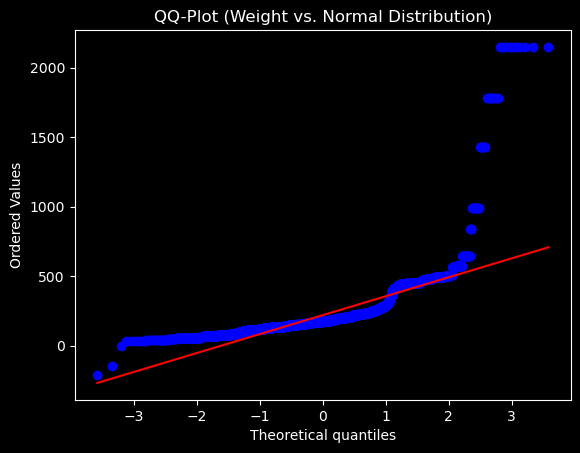

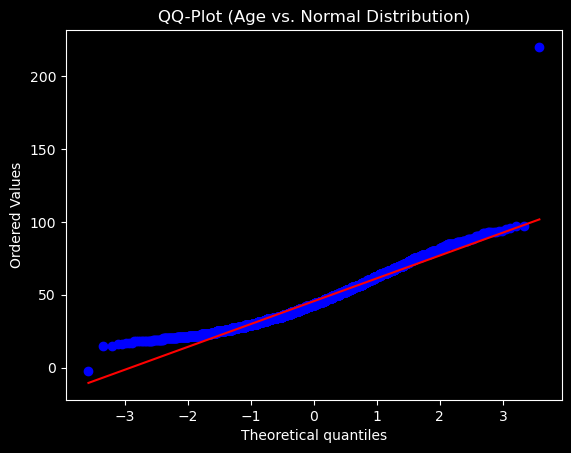

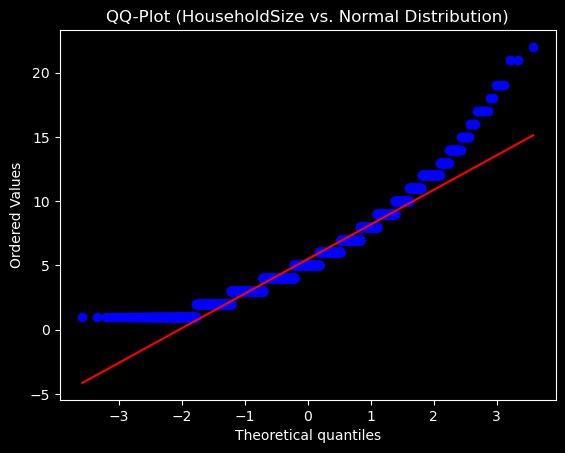

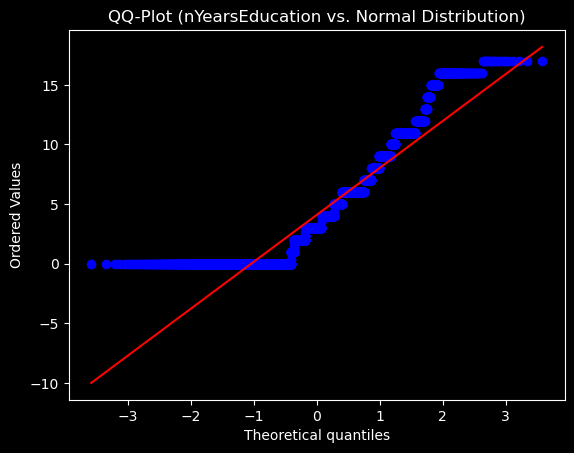

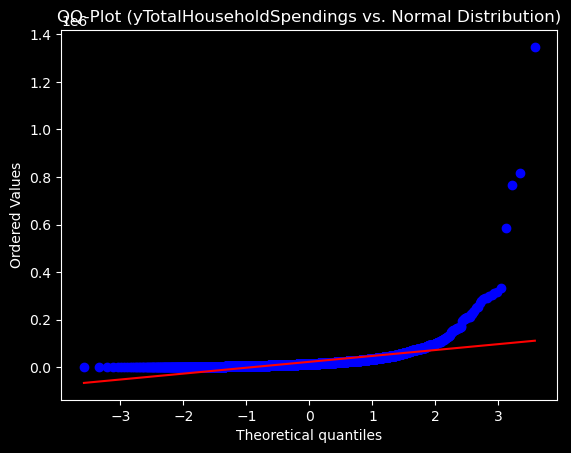

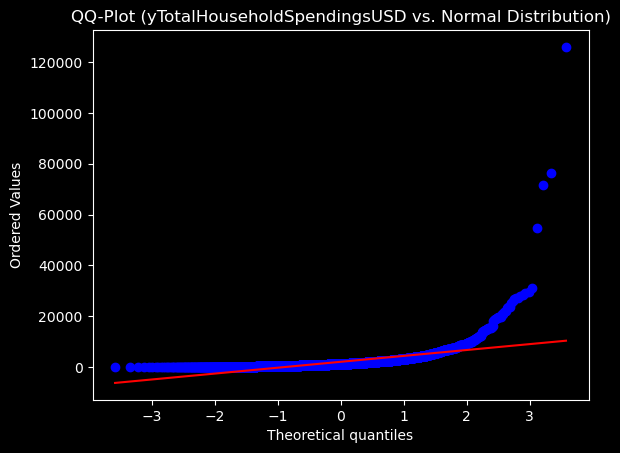

In [69]:
df_quant=df[['Weight','Age','HouseholdSize','nYearsEducation','yTotalHouseholdSpendings','yTotalHouseholdSpendingsUSD']]
for i in df_quant.columns:
    data_to_analyze = df_quant[i]

    # QQ-plot(Quantile-Quantile plot) pour l'analyse de la distribution des données
    stats.probplot(data_to_analyze, dist="norm", plot=plt)
    plt.title(f'QQ-Plot ({i} vs. Normal Distribution)')
    plt.show()

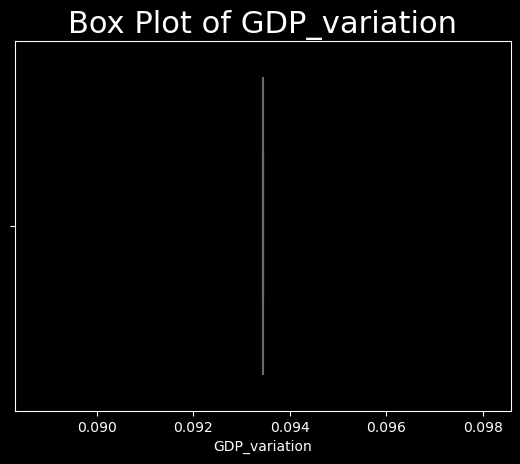

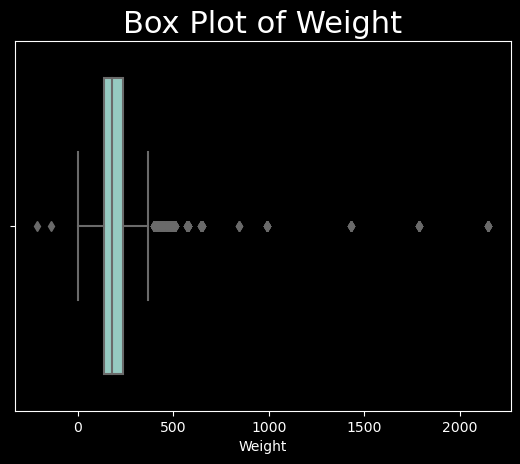

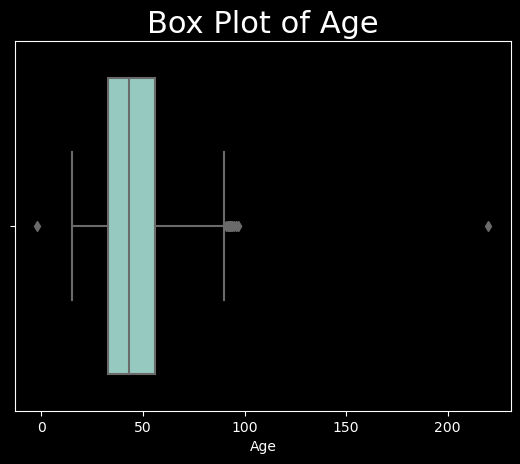

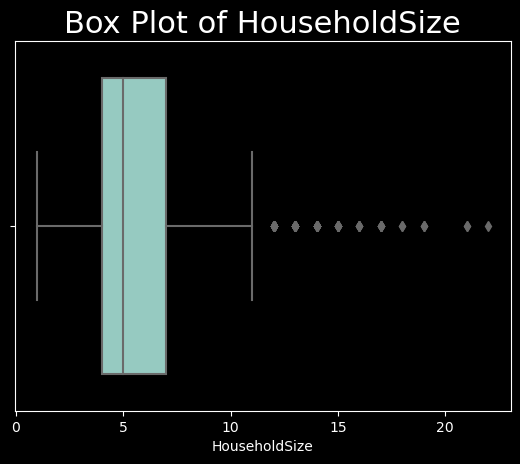

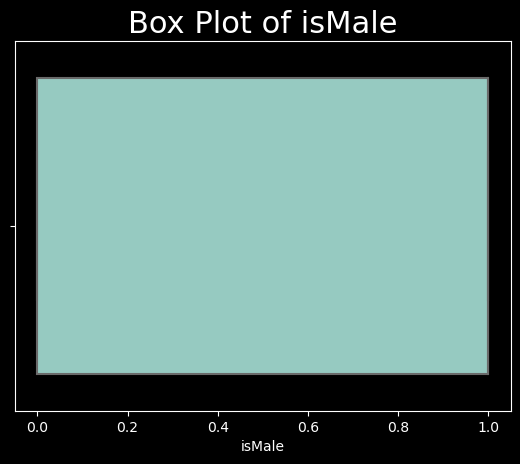

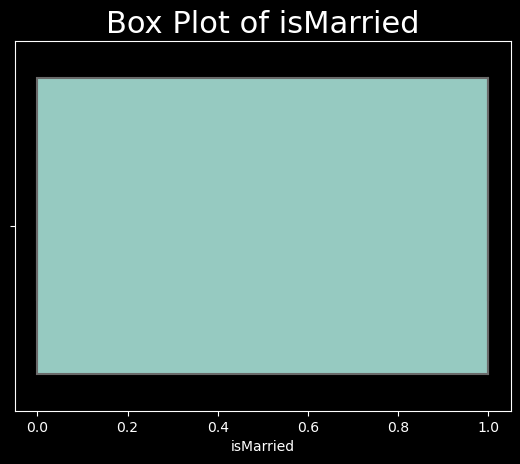

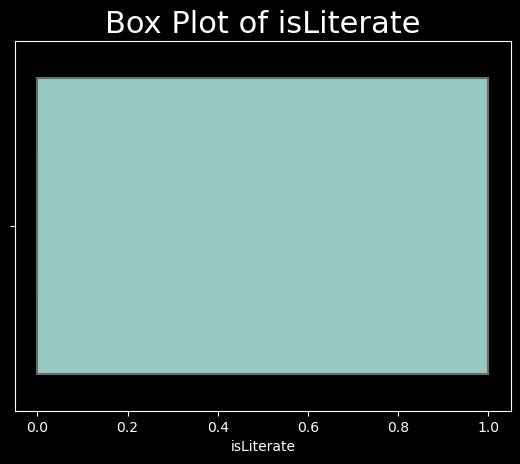

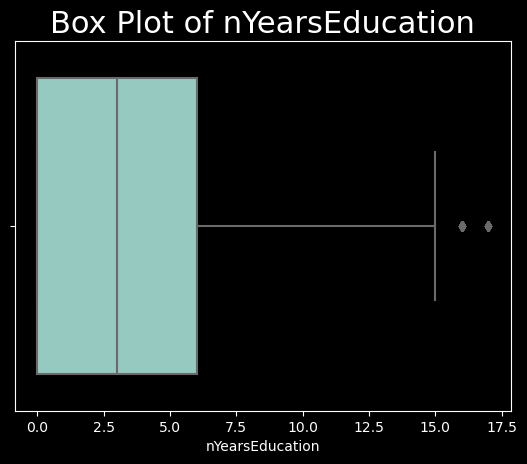

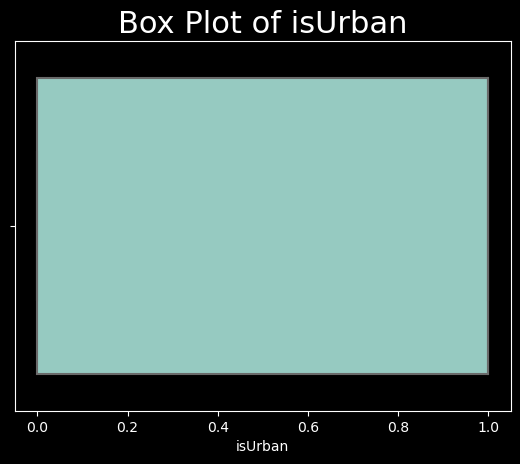

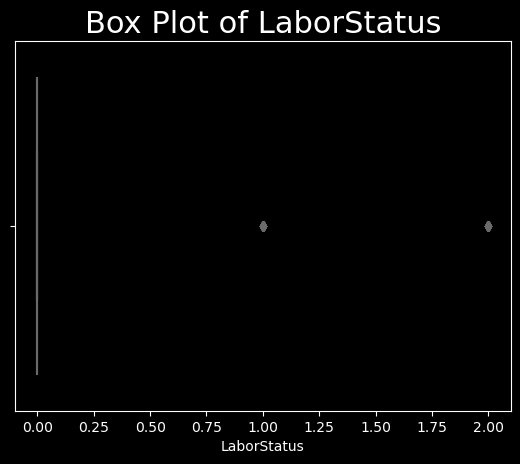

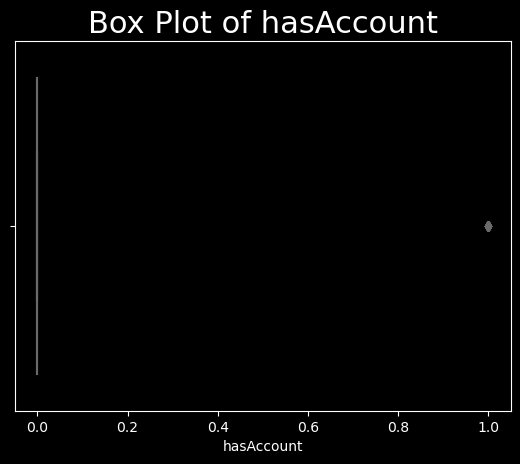

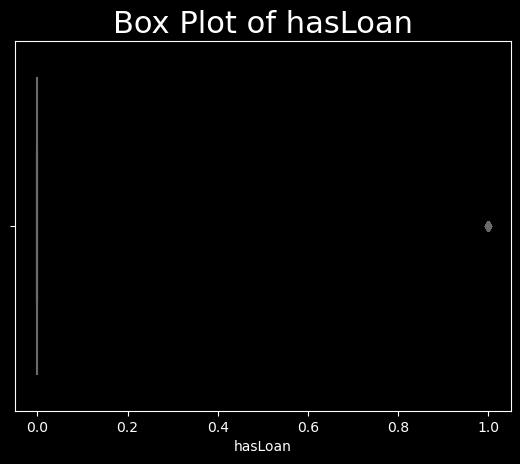

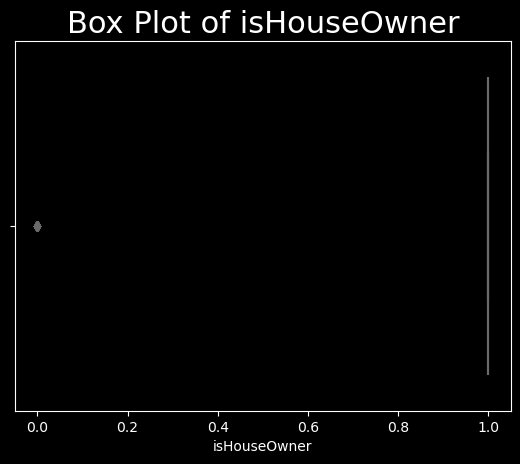

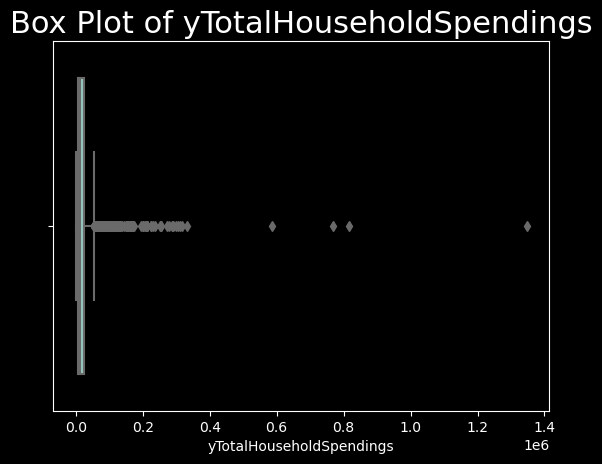

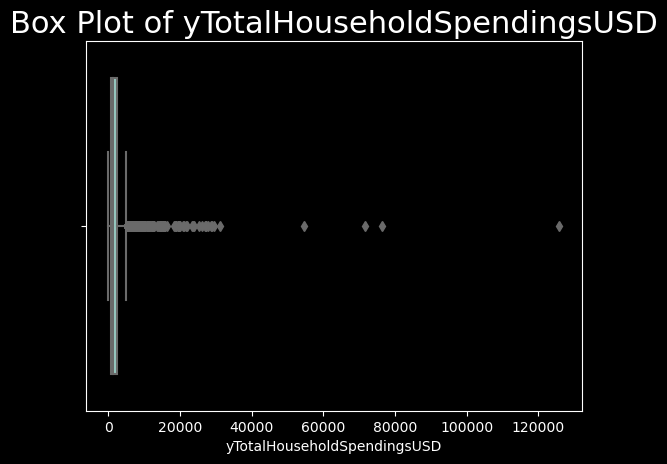

In [237]:
for column in _df.columns:
    sns.boxplot(x=_df[column])
    plt.title(f'Box Plot of {column}', fontsize=22)
    plt.show()

Anomalies dans les données  

La variable Weight :
Contient des valeurs négatives.
Contient des valeurs supérieures à 2000.

La variable Age :
Contient des valeurs négatives.
Contient des valeurs supérieures à 110 ans.  

La variable HouseholdSize :
Contient des valeurs atteignant 22.  

La variable nYearsEducation :
Contient des valeurs atteignant 17,5 années.  

La variable yTotalHouseholdSpendingsUSD / yTotalHouseholdSpendings :
Contient des valeurs atteignant 125 890 dollars.
Contient des valeurs atteignant 1 347 197,00 dollars...

In [71]:
## HouseholdSize

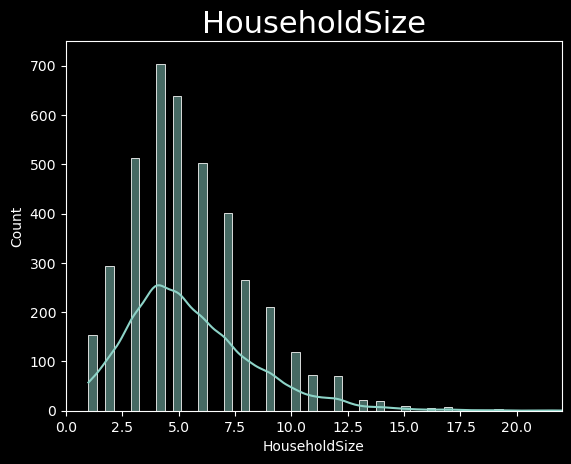

In [238]:
sns.histplot(_df['HouseholdSize'], kde=True)
plt.title('HouseholdSize', fontsize=22)
plt.ylim(0, 750)
plt.xlim(0, 22)
plt.show()

In [73]:
Q1 = df['HouseholdSize'].quantile(0.25)
Q3 = df['HouseholdSize'].quantile(0.75)
IQR = Q3 - Q1

# Définition des limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Échantillon des valeurs aberrantes
outliers = df[(df['HouseholdSize'] < lower_bound) | (df['HouseholdSize'] > upper_bound)]
outliers_sorted = outliers.sort_values(by='HouseholdSize', ascending=True)

print("Nombre de valeurs aberrantes:", outliers_sorted.shape[0])
print("Valeurs aberrantes:")
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)
print(outliers_sorted)

Nombre de valeurs aberrantes: 142
Valeurs aberrantes:
lower_bound: -0.5
upper_bound: 11.5
          ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
2153  703850       0.093446     232  33.0             12       1          1  \
1897  879844       0.093446     241  38.0             12       1          1   
1892  572955       0.093446      91  71.0             12       1          1   
1884  903512       0.093446     210  38.0             12       1          1   
1879  451420       0.093446     348  51.0             12       1          1   
...      ...            ...     ...   ...            ...     ...        ...   
2521  718405       0.093446     207  77.0             19       1          1   
3352  625398       0.093446     116  70.0             19       1          1   
2152  216082       0.093446     483  65.0             21       1          1   
2776  664883       0.093446      32  71.0             21       1          1   
3846  511341       0.093446     171  75.0

In [74]:
df['HouseholdSize'].sort_values(ascending=True).head()

2731    1
3110    1
516     1
3101    1
533     1
Name: HouseholdSize, dtype: int64

In [75]:
df['HouseholdSize'].sort_values(ascending=True).tail(15)

2044    17
1250    17
1343    17
3004    17
630     17
629     17
1463    17
1218    18
3749    18
2521    19
3352    19
967     19
2776    21
2152    21
3846    22
Name: HouseholdSize, dtype: int64

In [76]:
df['HouseholdSize'].unique()

array([ 4,  8, 10,  1,  5,  6,  2,  3,  7,  9, 15, 11, 14, 12, 13, 17, 19,
       16, 18, 21, 22])

Un ménage peut comprendre non seulement des membres d’une même famille, mais aussi d’autres personnes. Je ne supprimerai que les plus grandes valeurs aberrantes.

In [77]:
df = df[~((df['HouseholdSize'] <= 0) | (df['HouseholdSize'] > 19))]

## Weight

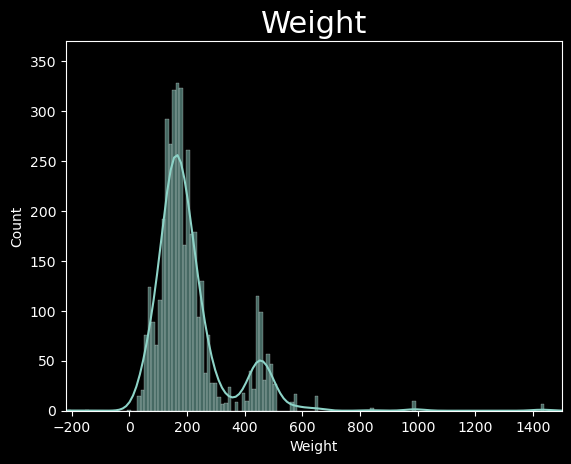

In [78]:
sns.histplot(df['Weight'], kde=True)
plt.title('Weight', fontsize=22)
plt.ylim(0, 370)
plt.xlim(-220, 1500)
plt.show()

In [79]:
df[df['Weight']<400].sort_values(by='Weight')

ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
1987  561064       0.093446    -213  29.0              4       0          0  \
2037  794114       0.093446    -142  25.0              5       0          0   
963   389360       0.093446       1  17.0              3       1          1   
3456  606294       0.093446      32  48.0             11       1          1   
1825  148876       0.093446      32  70.0              5       1          1   
...      ...            ...     ...   ...            ...     ...        ...   
1408  133671       0.093446     398  34.0              6       0          0   
3514  679132       0.093446     398  61.0              4       1          1   
1150  611030       0.093446     398  22.0              3       1          1   
1234  808179       0.093446     398  73.0              3       0          0   
1573  727977       0.093446     398  38.0              5       0          0   

      isLiterate  nYearsEducation  isUrban  LaborStatus  hasAccount  hasLoan   
1987           1              4.0        1            0           0        0  \
2037           1             11.0        1            1           0        0   
963            1              7.0        1            2           1        0   
3456           0              0.0        0            0           0        0   
1825           0              0.0        0            0           0        0   
...          ...              ...      ...          ...         ...      ...   
1408           1              3.0        0            0           0        0   
3514           0              0.0        0            0           0        0   
1150           1              8.0        0            0           0        0   
1234           0              5.0        0            1           0        0   
1573           0              0.0        0            1           0        0   

      isHouseOwner  yTotalHouseholdSpendings  yTotalHouseholdSpendingsUSD  
1987             0                5760.00000                   538.248389  
2037             1               15360.00000                  1435.329004  
963              0                2457.60000                   229.652637  
3456             1               56071.45625                  5239.647656  
1825             0                8460.80000                   790.627051  
...            ...                       ...                          ...  
1408             0               10291.20000                   961.670410  
3514             1               14112.00000                  1318.708496  
1150             0               76953.60000                  7190.998438  
1234             1                6233.60000                   582.504346  
1573             1                7979.20000                   745.623486  

[3485 rows x 16 columns]

In [80]:
df[df['Weight']>=400].sort_values(by='Weight')

ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
3488  950643       0.093446     406  21.0              3       1          1  \
2289  833216       0.093446     406  40.0             10       1          1   
1370  167543       0.093446     406  48.0             10       0          0   
2254  270481       0.093446     406  49.0              7       1          1   
176   993107       0.093446     406  54.0              6       1          1   
...      ...            ...     ...   ...            ...     ...        ...   
3893  427862       0.093446    2150  29.0              5       1          1   
1607  873934       0.093446    2150  57.0              2       1          1   
3618  763902       0.093446    2150  49.0              4       1          1   
1352  118062       0.093446    2150  22.0              3       1          1   
1752  894218       0.093446    2150  23.0              4       1          1   

      isLiterate  nYearsEducation  isUrban  LaborStatus  hasAccount  hasLoan   
3488           0              0.0        0            0           0        1  \
2289           0              0.0        0            0           0        0   
1370           0              0.0        0            0           0        0   
2254           0              0.0        0            0           0        0   
176            0              0.0        0            0           0        0   
...          ...              ...      ...          ...         ...      ...   
3893           1              5.0        0            0           0        0   
1607           0              0.0        0            0           0        0   
3618           0              0.0        0            0           0        1   
1352           1              6.0        0            0           0        0   
1752           0              0.0        0            0           0        0   

      isHouseOwner  yTotalHouseholdSpendings  yTotalHouseholdSpendingsUSD  
3488             0                   27129.6                  2535.149805  
2289             1                   19123.2                  1786.984570  
1370             0                   28552.0                  2668.067188  
2254             1                    9216.0                   861.197363  
176              1                    6240.0                   583.102393  
...            ...                       ...                          ...  
3893             1                   15456.0                  1444.299805  
1607             0                    9580.8                   895.286426  
3618             1                   23672.0                  2212.051367  
1352             0                   10560.0                   986.788672  
1752             0                    4816.0                   450.035449  

[528 rows x 16 columns]

In [81]:
df['Weight'].sort_values(ascending=True).tail(27)

909      991
2010    1431
1577    1431
2852    1431
705     1431
2927    1431
1360    1431
2350    1431
888     1786
1701    1786
3245    1786
4017    1786
2440    1786
2248    1786
3059    1786
949     1786
1756    1786
3952    2150
1752    2150
1607    2150
3471    2150
2154    2150
3893    2150
3918    2150
3618    2150
1760    2150
1352    2150
Name: Weight, dtype: int64

In [82]:
df['Weight'].sort_values(ascending=True).head()

1987   -213
2037   -142
963       1
1825     32
3456     32
Name: Weight, dtype: int64

In [83]:
df['Weight'].unique()

array([ 187,   95,  225,  148,  221,  247,  138,  126,  498,  451,  210,
        184,   78,   60,  256,  144,  178,  151,  135,  134,  252,  443,
        281,  245,  146,  199,   84,  495,  226,  307,  475,  173,  112,
        169,  123,  453,  474,   56,  239,  167,   32,  293,  466,  155,
        396,  500,  276,   76,  190,  125,   74,  261,  176,  145,  398,
        129,  124,  181,   91,  203,  481,  154,  222,   44,   99,  127,
        198,  165,  343,  161,  172,   69,  501,  180,  108,  331,  117,
        186,  160,  251,  131,  207,  175,   67,  136,  205,   70,  493,
        116,  110,  195,  189,  191,  106,  197,  171,  119,  166,  147,
        449,  118,  201,  209,  287,  113,  574,  483,  114,  419,  445,
         53,  842,  202,  406,  163,  152,  299,  156,  142,   58,  211,
        194,  235,  369,  122,  192,  482,  473,  428,   57,  183,  246,
        158,  168,  137,  208,  232,  107,  143,  452,  255,  206,   81,
        494,  200,  174,   77,  204,  486,  238,  1

In [84]:
df['Weight'] = abs(df['Weight'])

In [85]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Définition des limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Échantillon des valeurs aberrantes
outliers_Weight = df[(df['Weight'] < lower_bound) | (df['Weight'] > upper_bound)]
outliers_sorted = outliers.sort_values(by='Weight', ascending=True)

print("Nombre de valeurs aberrantes:", outliers_sorted.shape[0])
print("Valeurs aberrantes:")
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)
print(outliers_sorted)

Nombre de valeurs aberrantes: 142
Valeurs aberrantes:
lower_bound: -7.0
upper_bound: 377.0
          ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
2776  664883       0.093446      32  71.0             21       1          1  \
3155   71358       0.093446      53  45.0             13       0          0   
3601  681502       0.093446      56  66.0             12       1          1   
3409  379227       0.093446      57  49.0             14       1          1   
2768  215299       0.093446      57  36.0             15       1          1   
...      ...            ...     ...   ...            ...     ...        ...   
1659  287035       0.093446     483  63.0             12       1          1   
2152  216082       0.093446     483  65.0             21       1          1   
1125  906413       0.093446     498  71.0             12       1          1   
836   928547       0.093446     498  62.0             12       1          1   
3022  308872       0.093446     501  52.

Étant donné que le poids a des valeurs aussi élevées, il est peu probable qu'il s'agisse du poids physique des répondants en kilogrammes. L'interprétation la plus probable est un poids statistique utilisé pour ajuster l'échantillonnage dans les études socio-économiques. Ces poids peuvent être utilisés pour représenter la population et peuvent varier considérablement.

Un poids statistique utilisé pour ajuster l'échantillonnage dans la recherche socio-économique. Cette pondération permet de représenter la population générale, en tenant compte d'éventuelles irrégularités dans les données.

In [86]:
#On enlève les max qui déforment le dataset et sont beaucoup trop éloigné des autres valeurs

df = df[~((df['Weight'] <= 32) | (df['Weight'] > 1000))]


## Age

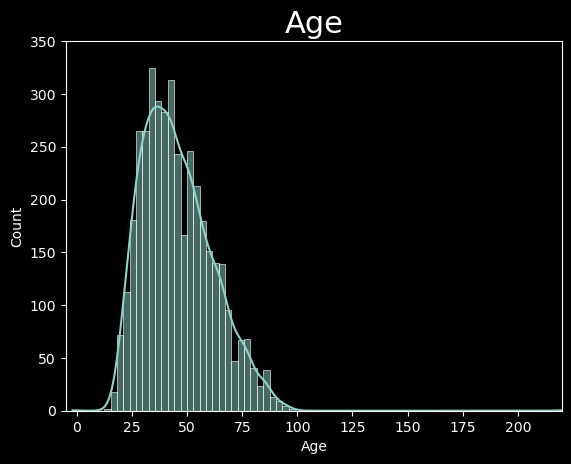

In [87]:
sns.histplot(_df['Age'], kde=True)
plt.title('Age', fontsize=22)
plt.ylim(0, 350)
plt.xlim(-5, 220)
plt.show()

In [88]:
Q1 = df['Age'].quantile(0.25) 
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Définition des limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Échantillon des valeurs aberrantes
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers_sorted = outliers.sort_values(by='Age', ascending=True)

print("Nombre de valeurs aberrantes:", outliers_sorted.shape[0])
print("Valeurs aberrantes:")
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)
print(outliers_sorted)

Nombre de valeurs aberrantes: 17
Valeurs aberrantes:
lower_bound: -1.5
upper_bound: 90.5
          ID  GDP_variation  Weight    Age  HouseholdSize  isMale  isMarried   
3079   37166       0.093446     184   -2.0              2       0          0  \
1101  333100       0.093446     163   91.0              3       1          1   
1820  678176       0.093446     298   92.0              4       1          1   
2426  383354       0.093446      76   92.0              5       1          0   
3509  105364       0.093446     141   92.0              4       1          1   
508   111897       0.093446     252   93.0              5       1          0   
713    58383       0.093446     187   93.0              8       0          0   
875   504005       0.093446     178   93.0              5       1          0   
3356   59744       0.093446     419   93.0              1       1          0   
3468  742070       0.093446     129   93.0              3       0          0   
3552  497509       0.093446    

In [89]:
df['Age'].sort_values(ascending=True)

3079     -2.0
1364     15.0
3849     15.0
3494     16.0
3312     16.0
        ...  
1113     95.0
1222     96.0
4013     97.0
68       97.0
438     220.0
Name: Age, Length: 3980, dtype: float64

In [90]:
df = df[~((df['Age'] <= 0) | (df['Age'] > 120))]

In [91]:
df.shape

(3978, 16)

##  yTotalHouseholdSpendings & yTotalHouseholdSpendingsUSD

(0.0, 30000.0)

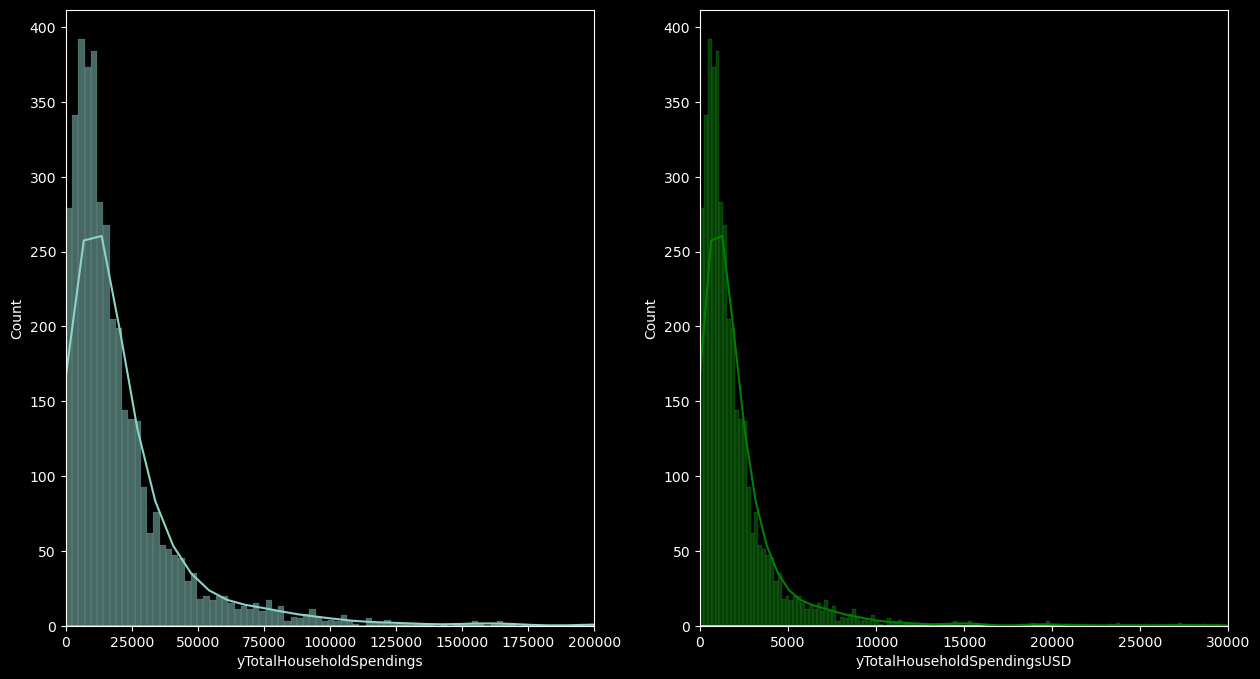

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(data=df, x='yTotalHouseholdSpendings', ax=ax[0], kde=True)
sns.kdeplot(data=df, x='yTotalHouseholdSpendings', ax=ax[0], fill=True, alpha=.5)
ax[0].set_xlim(0, 200000)

sns.histplot(data=df, x='yTotalHouseholdSpendingsUSD', ax=ax[1], kde=True, color='green')
sns.kdeplot(data=df, x='yTotalHouseholdSpendingsUSD', ax=ax[1], fill=True, alpha=.5)
ax[1].set_xlim(0, 30000) 

Nous appliquons une transformation logarithmique, qui réduit l'influence des grandes valeurs pouvant fausser le modèle. Ceci est particulièrement utile lorsque les données ont une longue « queue » (c'est-à-dire lorsque plusieurs observations ont des valeurs nettement plus grandes que d'autres).

In [93]:
def plot_log_transformed_distributions(df, columns):
    # Application de la transformation logarithmique aux variables
    log_transformer = FunctionTransformer(np.log1p)
    
    # Construction de graphiques pour comparer des distributions logarithmiques (pour réduire la variabilité et normaliser la distribution).
    fig, ax = plt.subplots(1, len(columns), figsize=(15, 8))

    for i, col in enumerate(columns):
        df_log = log_transformer.fit_transform(df[columns])
        sns.histplot(data=df_log, x=col, ax=ax[i], kde=True, color='blue')
        sns.kdeplot(data=df_log, x=col, ax=ax[i], fill=True, alpha=0.8, color='green',linewidth=2)
        ax[i].set_title('Log Transformation of ' + col)
    plt.show()


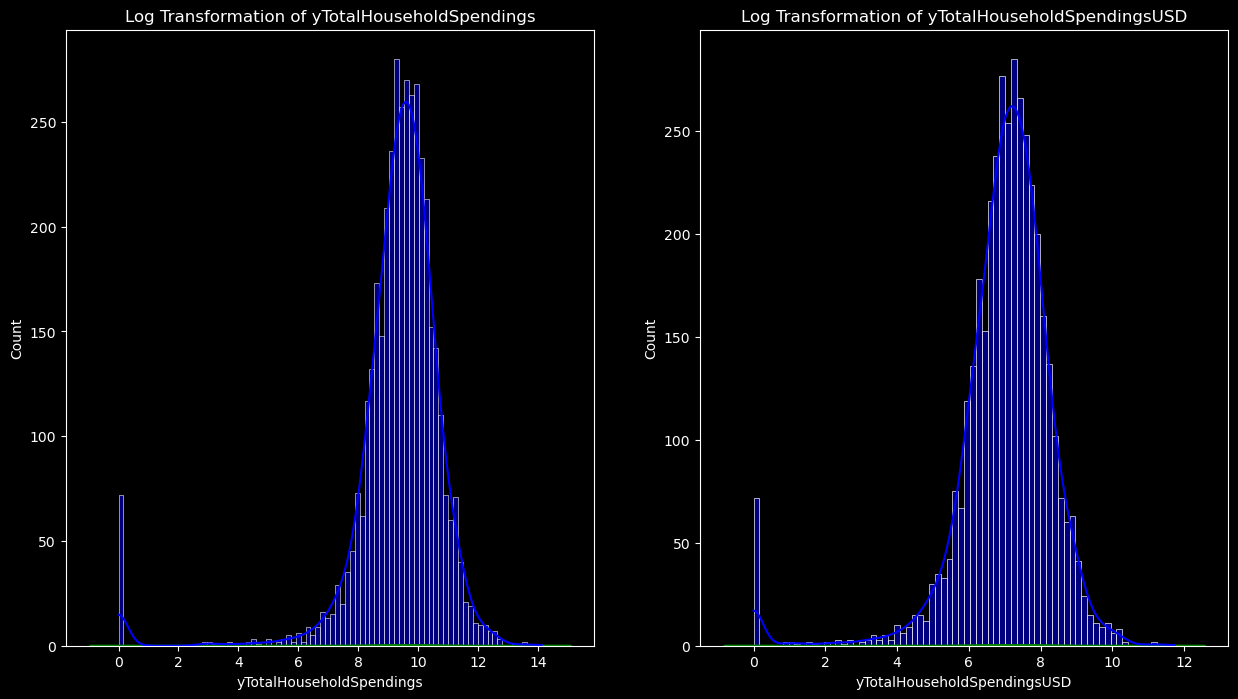

In [94]:
plot_log_transformed_distributions(df, ['yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD'])


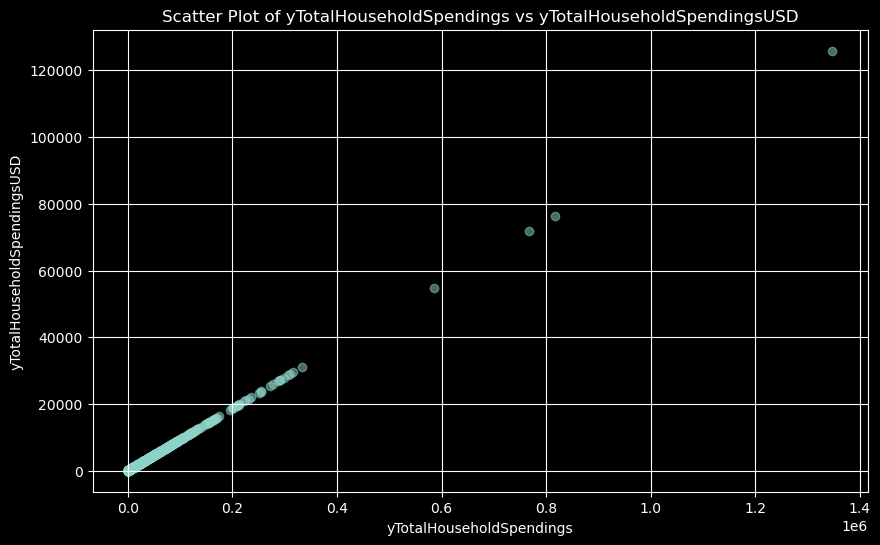

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(df['yTotalHouseholdSpendings'], df['yTotalHouseholdSpendingsUSD'], alpha=0.5)
plt.xlabel('yTotalHouseholdSpendings')
plt.ylabel('yTotalHouseholdSpendingsUSD')
plt.title('Scatter Plot of yTotalHouseholdSpendings vs yTotalHouseholdSpendingsUSD')
plt.grid(True)
plt.show()


In [96]:
Q1 = df['yTotalHouseholdSpendings'].quantile(0.25) 
Q3 = df['yTotalHouseholdSpendings'].quantile(0.75)
IQR = Q3 - Q1

# Définition des limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Échantillon des valeurs aberrantes
outliers = df[(df['yTotalHouseholdSpendings'] < lower_bound) | (df['yTotalHouseholdSpendings'] > upper_bound)]
outliers_sorted = outliers.sort_values(by='Age', ascending=True)

print("Nombre de valeurs aberrantes:", outliers_sorted.shape[0])
print("Valeurs aberrantes:")
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)
print(outliers_sorted)

Nombre de valeurs aberrantes: 306
Valeurs aberrantes:
lower_bound: -21207.15
upper_bound: 53789.25
          ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
219   951919       0.093446     160  21.0              3       1          0  \
822    57541       0.093446     117  21.0              5       0          0   
2133  758717       0.093446     276  22.0              2       1          1   
1150  611030       0.093446     398  22.0              3       1          1   
1698  787240       0.093446     172  22.0              3       1          1   
...      ...            ...     ...   ...            ...     ...        ...   
3012  189369       0.093446     169  82.0              2       1          1   
2730  115884       0.093446     452  85.0              5       0          0   
1883   73259       0.093446     160  85.0              5       0          0   
2802  219768       0.093446     203  86.0              5       1          0   
3468  742070       0.093446     

In [97]:
df['yTotalHouseholdSpendings'].sort_values(ascending=True).tail(15)

3869     254918.400
510      271104.000
3874     278400.000
1078     288115.200
2562     290876.800
2133     291555.825
74       298032.000
3793     305779.200
37       310380.800
3411     315661.600
3785     332812.800
3468     585600.000
1781     768000.000
2723     816576.000
1381    1347196.800
Name: yTotalHouseholdSpendings, dtype: float64

In [98]:
df = df[~((df['yTotalHouseholdSpendings'] <= 0) | (df['yTotalHouseholdSpendings'] > 500001))]

In [99]:
df.shape

(3902, 16)

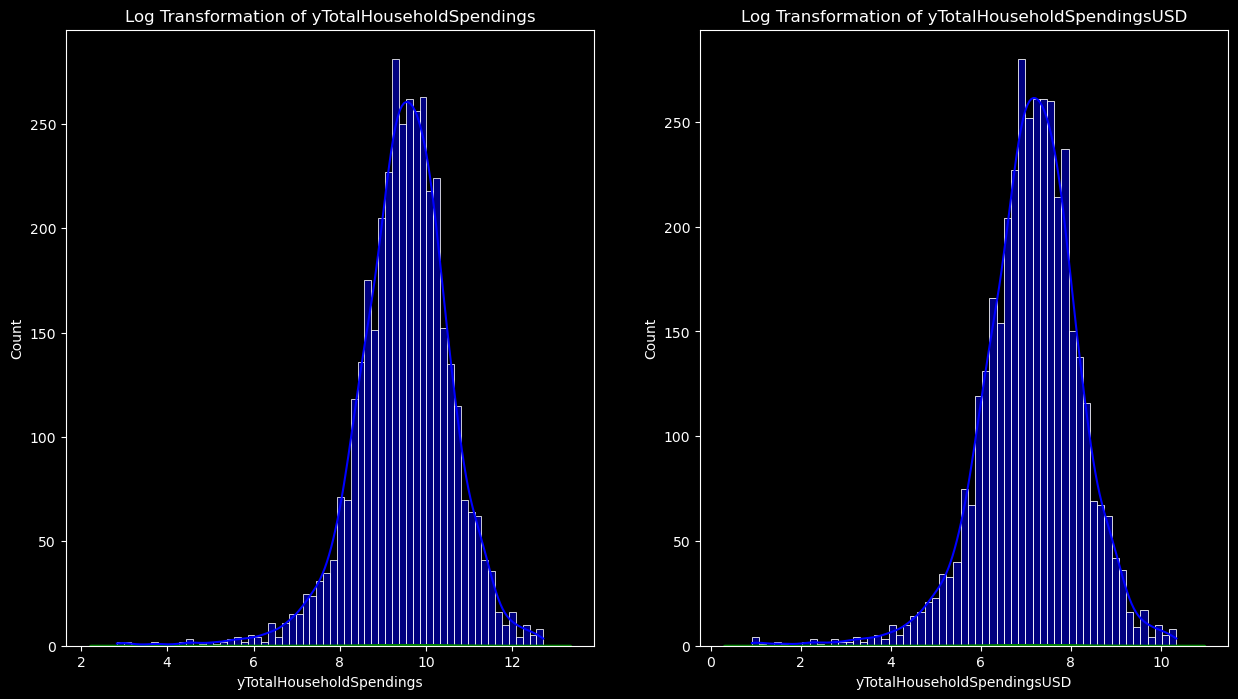

In [100]:
plot_log_transformed_distributions(df, ['yTotalHouseholdSpendings', 'yTotalHouseholdSpendingsUSD'])

In [101]:
df.describe()

ID  GDP_variation       Weight          Age  HouseholdSize   
count    3902.000000   3.902000e+03  3902.000000  3902.000000    3902.000000  \
mean   499130.514095   9.344590e-02   209.593285    45.487186       5.496668   
std    288650.178086   2.775913e-17   121.385097    15.740207       2.754850   
min       106.000000   9.344590e-02    39.000000    15.000000       1.000000   
25%    252497.500000   9.344590e-02   137.000000    33.000000       4.000000   
50%    489615.500000   9.344590e-02   174.000000    43.000000       5.000000   
75%    752694.000000   9.344590e-02   232.000000    56.000000       7.000000   
max    999938.000000   9.344590e-02   991.000000    97.000000      19.000000   

            isMale    isMarried   isLiterate  nYearsEducation      isUrban   
count  3902.000000  3902.000000  3902.000000       3902.00000  3902.000000  \
mean      0.738339     0.716556     0.688365          4.09713     0.541005   
std       0.439595     0.450728     0.463221          4.22349     0.498380   
min       0.000000     0.000000     0.000000          0.00000     0.000000   
25%       0.000000     0.000000     0.000000          0.00000     0.000000   
50%       1.000000     1.000000     1.000000          3.00000     1.000000   
75%       1.000000     1.000000     1.000000          6.00000     1.000000   
max       1.000000     1.000000     1.000000         17.00000     1.000000   

       LaborStatus   hasAccount      hasLoan  isHouseOwner   
count  3902.000000  3902.000000  3902.000000   3902.000000  \
mean      0.235008     0.048180     0.156843      0.782932   
std       0.511217     0.214175     0.363699      0.412302   
min       0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000      1.000000   
50%       0.000000     0.000000     0.000000      1.000000   
75%       0.000000     0.000000     0.000000      1.000000   
max       2.000000     1.000000     1.000000      1.000000   

       yTotalHouseholdSpendings  yTotalHouseholdSpendingsUSD  
count               3902.000000                  3902.000000  
mean               22225.233942                  2076.856924  
std                29322.602065                  2740.076859  
min                   16.000000                     1.495134  
25%                 7296.000000                   681.781250  
50%                13920.000000                  1300.766895  
75%                25920.000000                  2422.117578  
max               332812.800000                 31099.990625

In [102]:
df_compl=df.copy()

In [103]:
# Припущення постійного GDP_variation
#GDP_variation = 0.093446

# initial_GDP
#df['initial_GDP'] = df['yTotalHouseholdSpendingsUSD'] / 0.6

# Обчислення поточного GDP з урахуванням GDP_variation
#df['current_GDP'] = df['initial_GDP'] * (1 + GDP_variation)

# Обчислення base_total_household_spendings
#df['base_total_household_spendings'] = 0.6 * df['current_GDP'] * (df['yTotalHouseholdSpendings'] / df['yTotalHouseholdSpendingsUSD'])

# Додавання змінних для моделі
#df['DeviationFromBase'] = df['yTotalHouseholdSpendings'] - df['base_total_household_spendings']
#df['AnnualGrowthRate'] = df['DeviationFromBase'] * (1 + GDP_variation)


In [104]:
df

ID  GDP_variation  Weight   Age  HouseholdSize  isMale  isMarried   
0     408112       0.093446     187  34.0              4       1          1  \
1      99522       0.093446      95  39.0              8       1          1   
2     450411       0.093446     225  53.0             10       1          1   
3     230464       0.093446     148  54.0              1       1          0   
4     187256       0.093446     221  69.0              5       1          1   
...      ...            ...     ...   ...            ...     ...        ...   
4018  640576       0.093446     128  64.0              3       1          1   
4019  288611       0.093446     197  79.0              3       0          0   
4020  354302       0.093446     161  36.0              3       1          0   
4022  168832       0.093446     150  27.0              5       1          1   
4023  315705       0.093446     307  30.0              4       1          1   

      isLiterate  nYearsEducation  isUrban  LaborStatus  hasAccount  hasLoan   
0              1         4.000000        1            0           0        1  \
1              1         0.000000        1            0           0        0   
2              1         4.000000        1            0           0        0   
3              1         5.000000        1            1           0        0   
4              1         0.000000        0            0           0        1   
...          ...              ...      ...          ...         ...      ...   
4018           0         0.000000        0            0           0        0   
4019           0         0.000000        0            1           0        0   
4020           1         6.000000        0            0           0        0   
4022           1         4.000000        0            0           0        0   
4023           1         2.333333        0            0           0        1   

      isHouseOwner  yTotalHouseholdSpendings  yTotalHouseholdSpendingsUSD  
0                1                     518.4                    48.442352  
1                1                   12000.0                  1121.350781  
2                1                   80160.0                  7490.623438  
3                1                   13584.0                  1269.369043  
4                1                    3200.0                   299.026880  
...            ...                       ...                          ...  
4018             0                    8899.2                   831.593750  
4019             1                    5932.8                   554.395801  
4020             1                    3494.4                   326.537354  
4022             1                    4288.0                   400.695996  
4023             1                   14400.0                  1345.620898  

[3902 rows x 16 columns]

In [105]:
df=df.drop(['GDP_variation','yTotalHouseholdSpendingsUSD'], axis=1)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3902 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3902 non-null   int64  
 1   Weight                    3902 non-null   int64  
 2   Age                       3902 non-null   float64
 3   HouseholdSize             3902 non-null   int64  
 4   isMale                    3902 non-null   int64  
 5   isMarried                 3902 non-null   int64  
 6   isLiterate                3902 non-null   int64  
 7   nYearsEducation           3902 non-null   float64
 8   isUrban                   3902 non-null   int64  
 9   LaborStatus               3902 non-null   int64  
 10  hasAccount                3902 non-null   int64  
 11  hasLoan                   3902 non-null   int64  
 12  isHouseOwner              3902 non-null   int64  
 13  yTotalHouseholdSpendings  3902 non-null   float64
dtypes: float64(3)

In [107]:
df.skew()

ID                          0.039055
Weight                      1.898241
Age                         0.574331
HouseholdSize               0.953272
isMale                     -1.084914
isMarried                  -0.961408
isLiterate                 -0.813700
nYearsEducation             0.986300
isUrban                    -0.164636
LaborStatus                 2.114703
hasAccount                  4.221331
hasLoan                     1.888008
isHouseOwner               -1.373152
yTotalHouseholdSpendings    4.655410
dtype: float64

# Analyses bivariée <a id='data-biv'></a>

### Analyse des liaisons entre les variables

In [108]:
df_corr=df.corr()
df_corr

ID    Weight       Age  HouseholdSize   
ID                        1.000000 -0.009191  0.004058      -0.014474  \
Weight                   -0.009191  1.000000  0.008249      -0.064030   
Age                       0.004058  0.008249  1.000000       0.085938   
HouseholdSize            -0.014474 -0.064030  0.085938       1.000000   
isMale                   -0.030104 -0.069785 -0.176924       0.058867   
isMarried                -0.014828 -0.056420 -0.270712       0.179675   
isLiterate                0.001137  0.117583 -0.256886      -0.124154   
nYearsEducation           0.008862  0.170331 -0.273532      -0.181799   
isUrban                   0.008975  0.152265  0.028317      -0.111366   
LaborStatus              -0.009722  0.070466  0.275510      -0.046496   
hasAccount               -0.012104  0.093677 -0.025899      -0.055774   
hasLoan                  -0.015551  0.076123 -0.043622      -0.020458   
isHouseOwner             -0.027654  0.038080  0.204873       0.144594   
yTotalHouseholdSpendings  0.001836  0.133218  0.037029       0.104580   

                            isMale  isMarried  isLiterate  nYearsEducation   
ID                       -0.030104  -0.014828    0.001137         0.008862  \
Weight                   -0.069785  -0.056420    0.117583         0.170331   
Age                      -0.176924  -0.270712   -0.256886        -0.273532   
HouseholdSize             0.058867   0.179675   -0.124154        -0.181799   
isMale                    1.000000   0.716235    0.056424         0.047888   
isMarried                 0.716235   1.000000    0.083896         0.078654   
isLiterate                0.056424   0.083896    1.000000         0.629866   
nYearsEducation           0.047888   0.078654    0.629866         1.000000   
isUrban                  -0.191463  -0.120563    0.274113         0.381668   
LaborStatus              -0.264704  -0.217030   -0.039220        -0.052129   
hasAccount               -0.002199   0.014041    0.138462         0.269524   
hasLoan                  -0.022228   0.002296    0.145646         0.155127   
isHouseOwner             -0.075847  -0.052524   -0.009335        -0.041326   
yTotalHouseholdSpendings  0.049479   0.080565    0.160698         0.322254   

                           isUrban  LaborStatus  hasAccount   hasLoan   
ID                        0.008975    -0.009722   -0.012104 -0.015551  \
Weight                    0.152265     0.070466    0.093677  0.076123   
Age                       0.028317     0.275510   -0.025899 -0.043622   
HouseholdSize            -0.111366    -0.046496   -0.055774 -0.020458   
isMale                   -0.191463    -0.264704   -0.002199 -0.022228   
isMarried                -0.120563    -0.217030    0.014041  0.002296   
isLiterate                0.274113    -0.039220    0.138462  0.145646   
nYearsEducation           0.381668    -0.052129    0.269524  0.155127   
isUrban                   1.000000     0.095481    0.154400  0.120076   
LaborStatus               0.095481     1.000000    0.008940 -0.048014   
hasAccount                0.154400     0.008940    1.000000  0.162944   
hasLoan                   0.120076    -0.048014    0.162944  1.000000   
isHouseOwner              0.061417     0.057224    0.011057  0.009993   
yTotalHouseholdSpendings  0.198667    -0.082717    0.236973  0.103171   

                          isHouseOwner  yTotalHouseholdSpendings  
ID                           -0.027654                  0.001836  
Weight                        0.038080                  0.133218  
Age                           0.204873                  0.037029  
HouseholdSize                 0.144594                  0.104580  
isMale                       -0.075847                  0.049479  
isMarried                    -0.052524                  0.080565  
isLiterate                   -0.009335                  0.160698  
nYearsEducation              -0.041326                  0.322254  
isUrban                       0.061417                  0.198667  

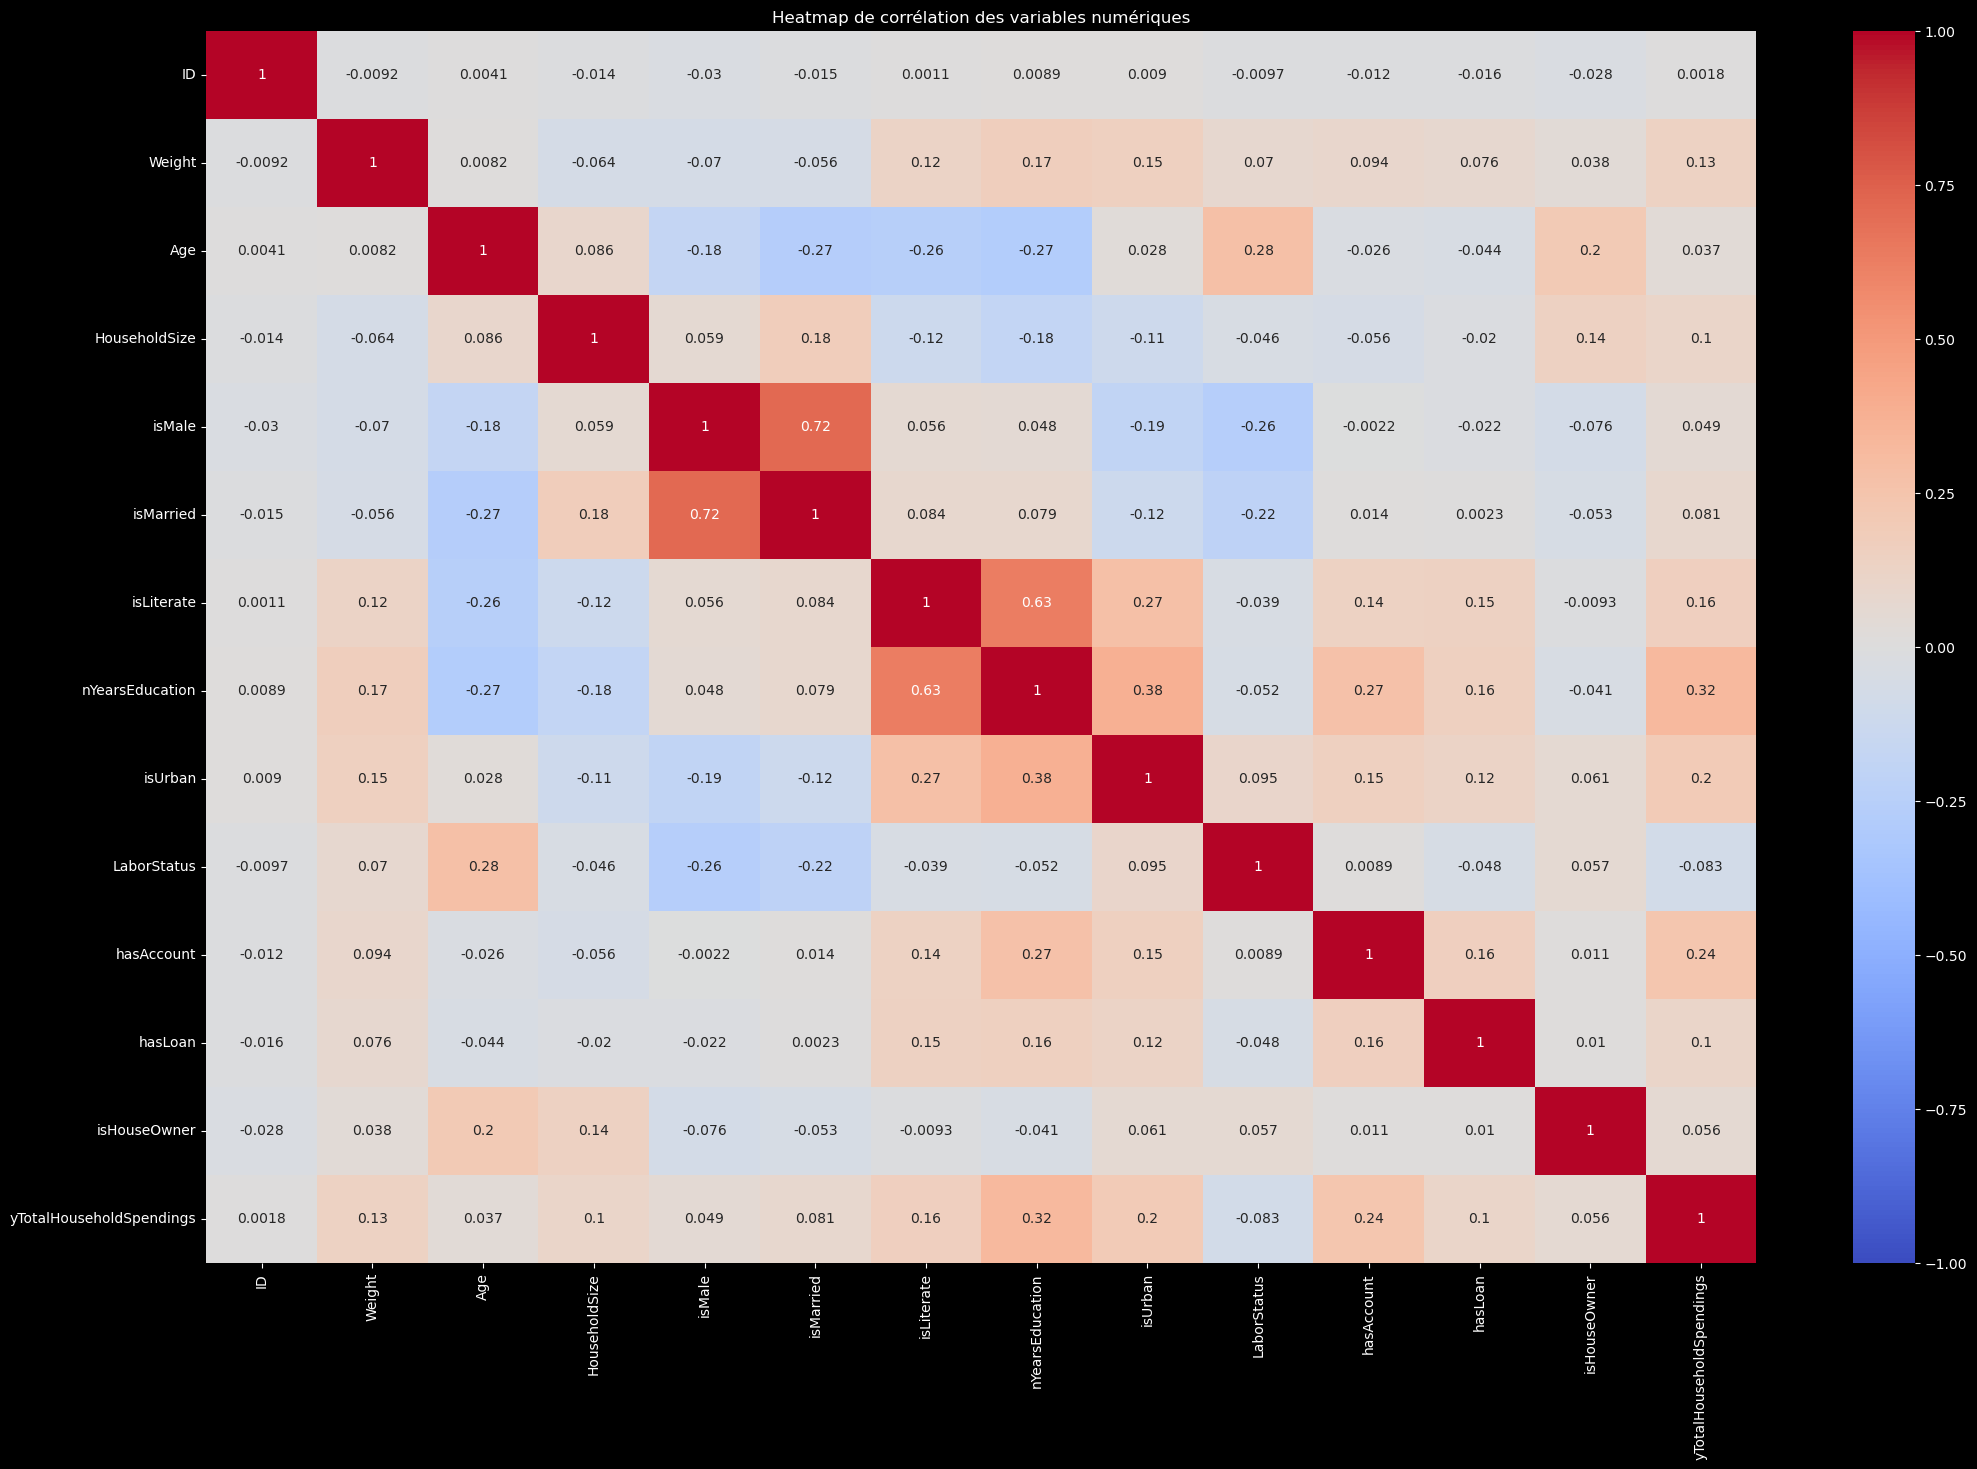

In [109]:
plt.figure(figsize=(25,16))
sns.heatmap(df_corr, vmin=-1,vmax=1, cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

In [110]:
#Déterminer le seuil de corrélation
threshold = 0.6

# Paires de variables fortement corrélées
strong_correlations = (df_corr[(np.abs(df_corr) > threshold) & (np.abs(df_corr) < 1)])
strong_correlation_pairs = np.where(np.abs(df_corr) > threshold)

for i, j in zip(strong_correlation_pairs[0], strong_correlation_pairs[1]):
    if i != j:
        print(f"Variables {df_corr.columns[i]} та {df_corr.columns[j]} avoir une corrélation {strong_correlations.iloc[i, j]}")

Variables isMale та isMarried avoir une corrélation 0.7162345596798745
Variables isMarried та isMale avoir une corrélation 0.7162345596798745
Variables isLiterate та nYearsEducation avoir une corrélation 0.6298663838628017
Variables nYearsEducation та isLiterate avoir une corrélation 0.6298663838628017


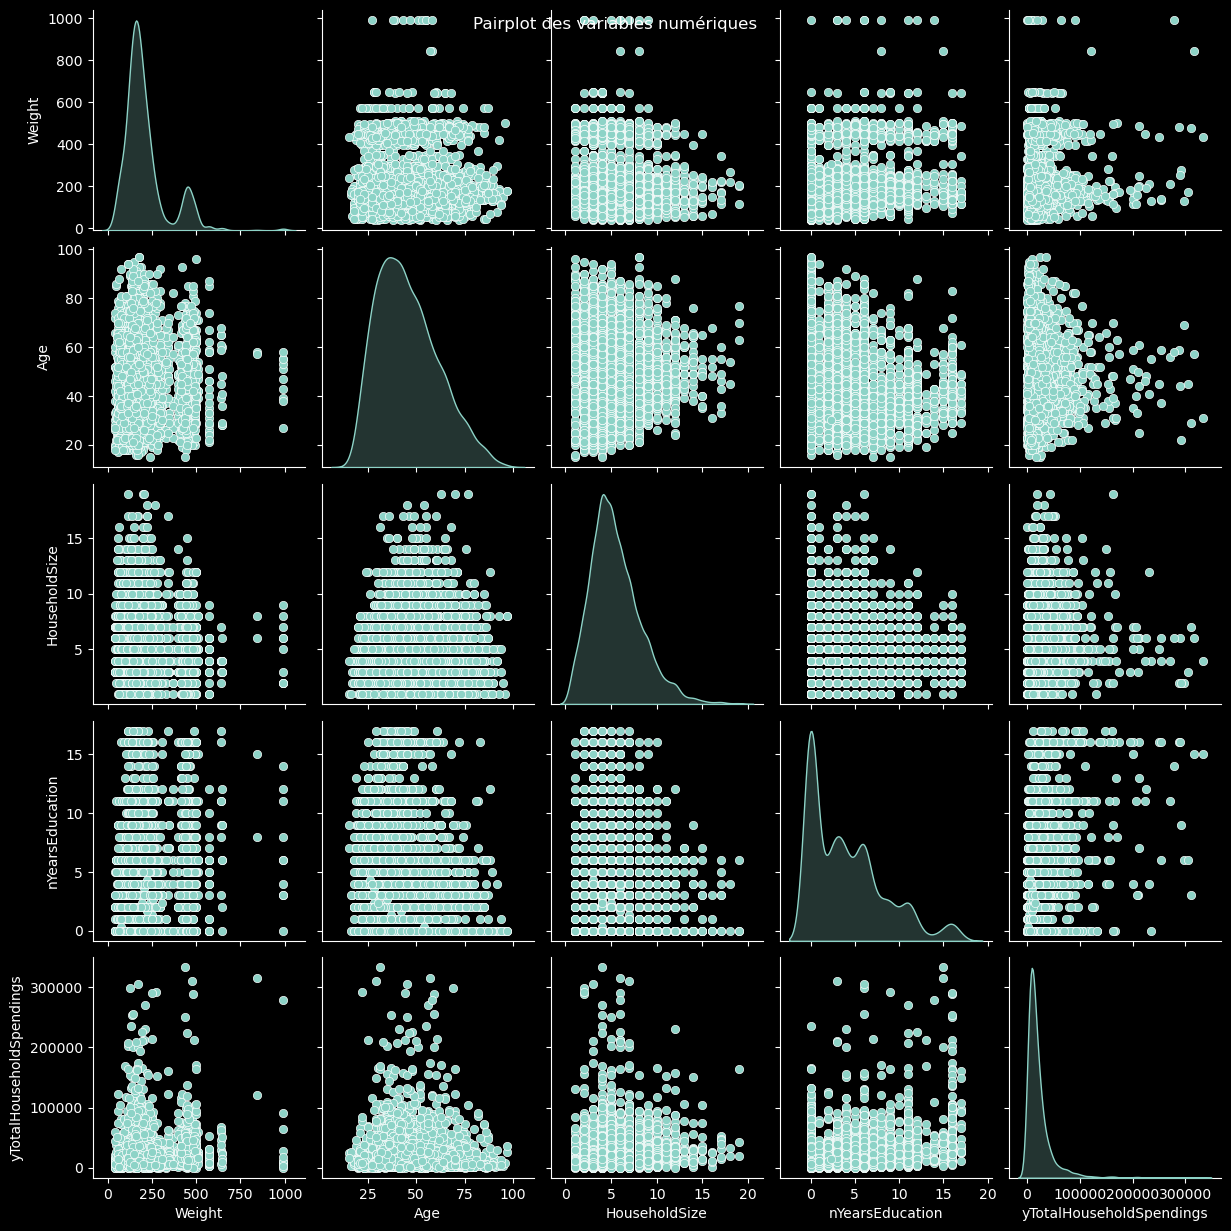

In [111]:
# Génération du pairplot
df_numériques=df[['Weight','Age','HouseholdSize','nYearsEducation','yTotalHouseholdSpendings']]
sns.pairplot(data=df_numériques,  diag_kind='kde')
plt.suptitle('Pairplot des variables numériques')
plt.show()

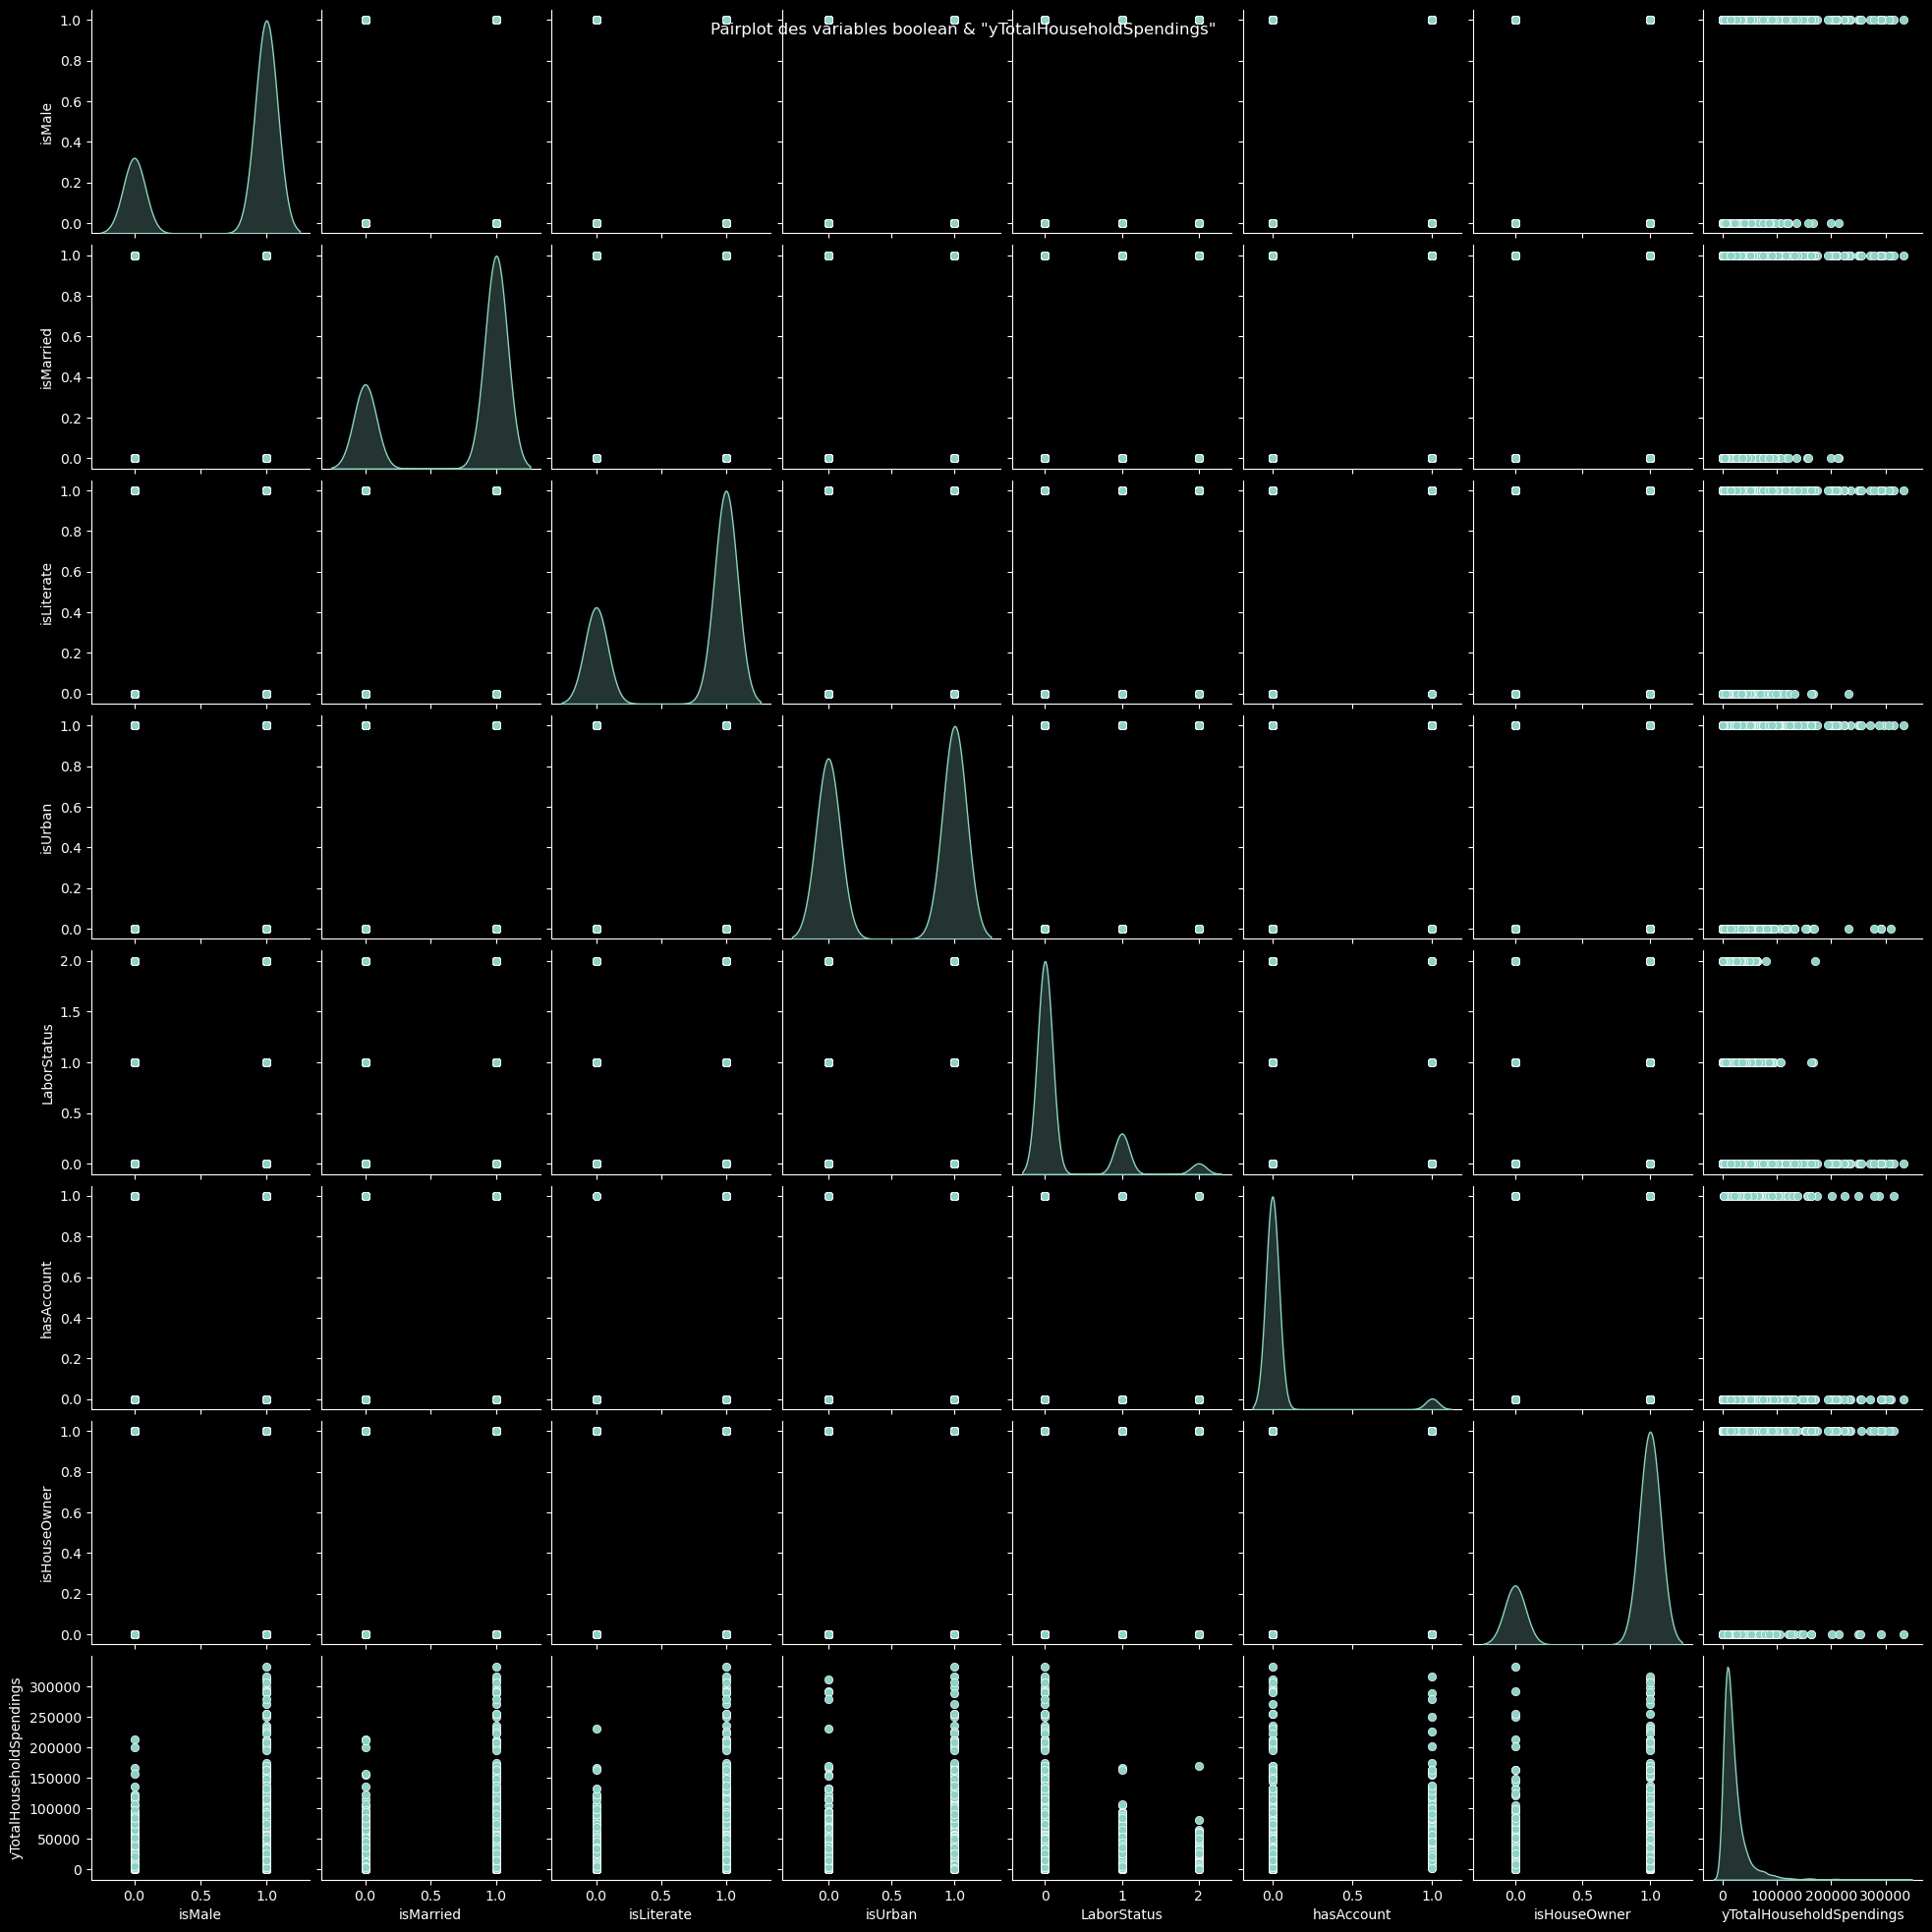

In [112]:
df_bool=df[['isMale','isMarried','isLiterate','isUrban','LaborStatus','hasAccount','isHouseOwner','yTotalHouseholdSpendings']]
sns.pairplot(data=df_bool, diag_kind='kde')
plt.suptitle('Pairplot des variables boolean & "yTotalHouseholdSpendings" ')
plt.show()

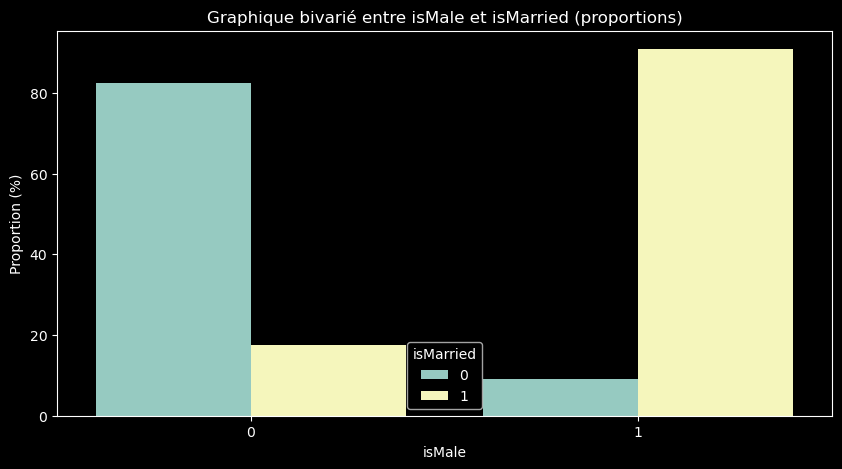

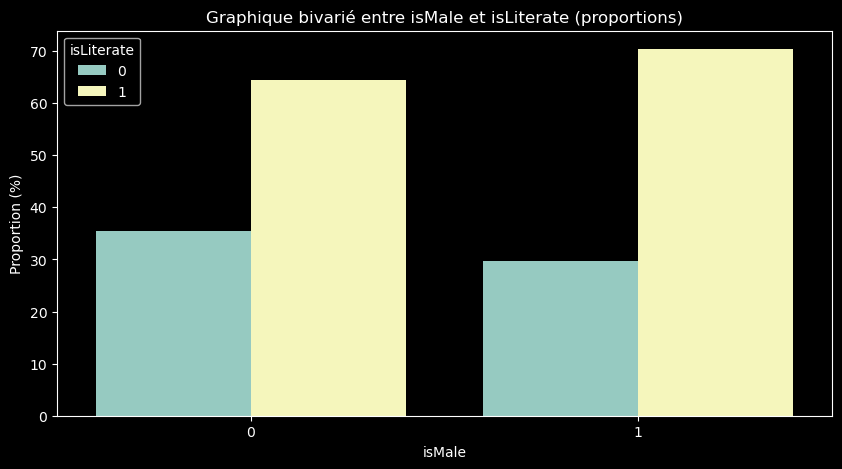

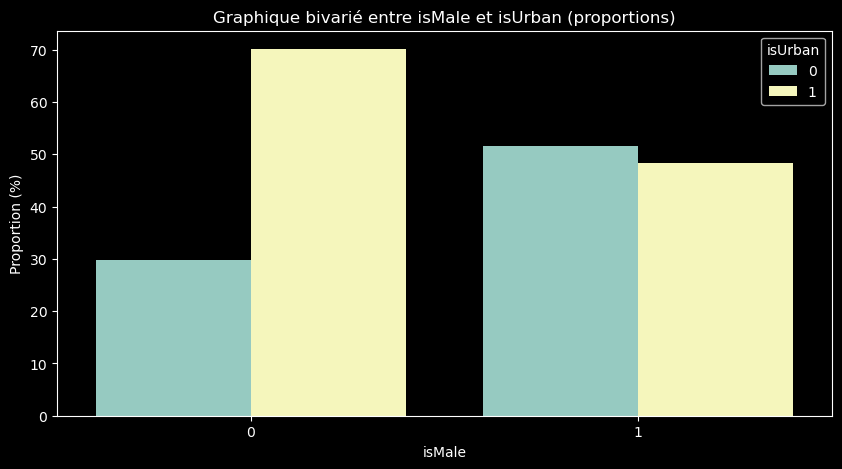

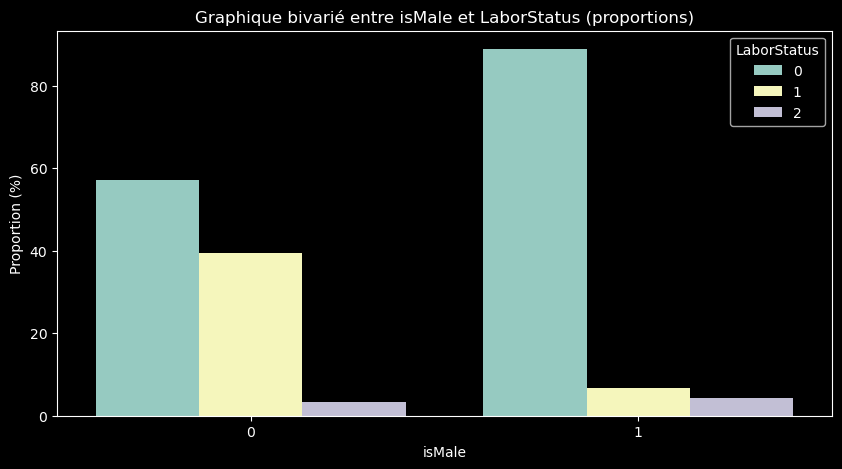

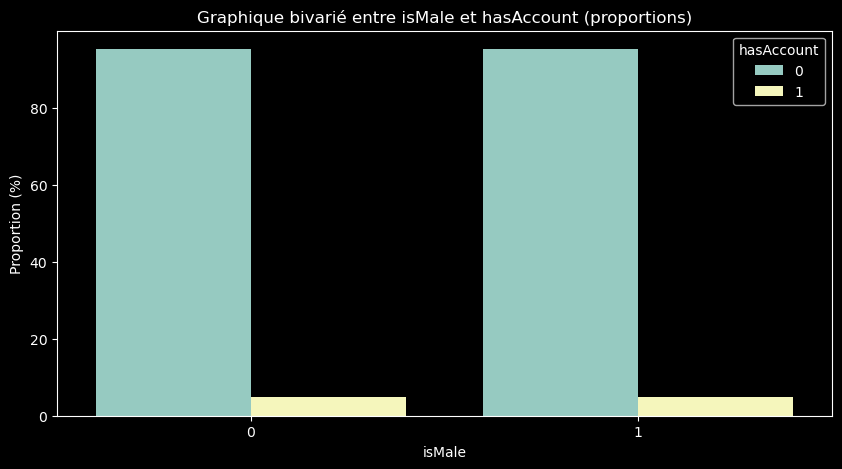

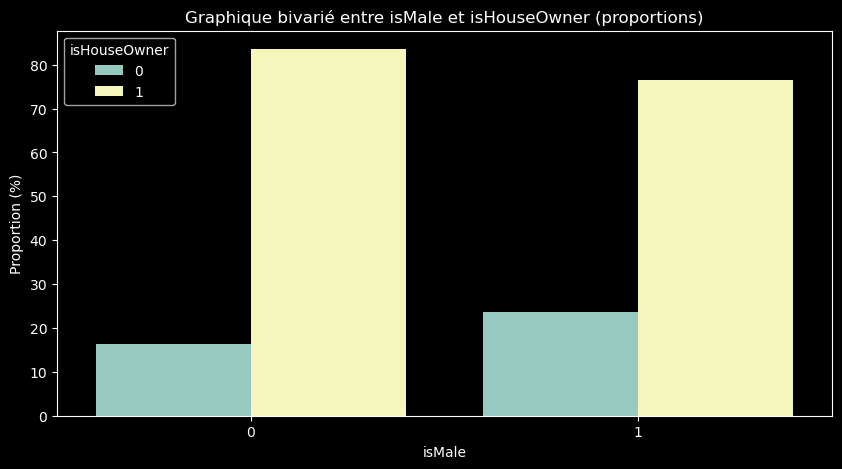

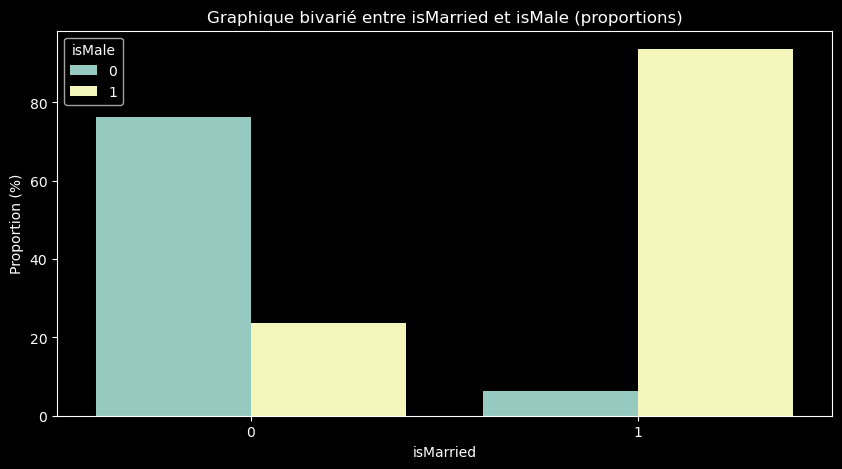

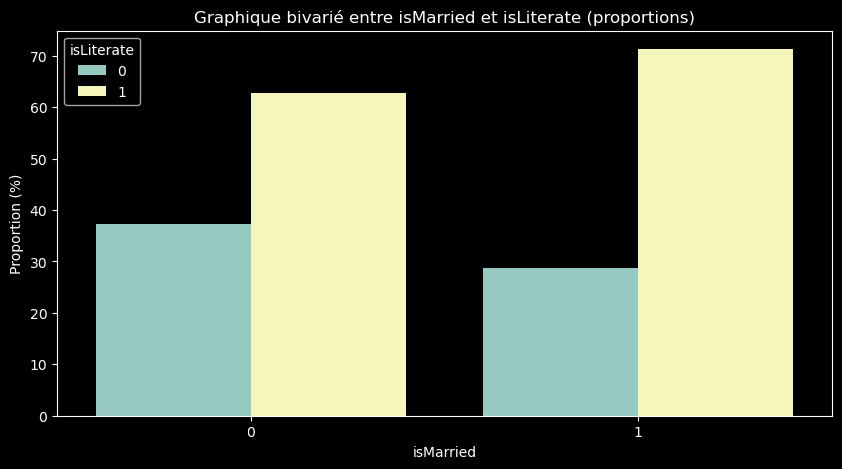

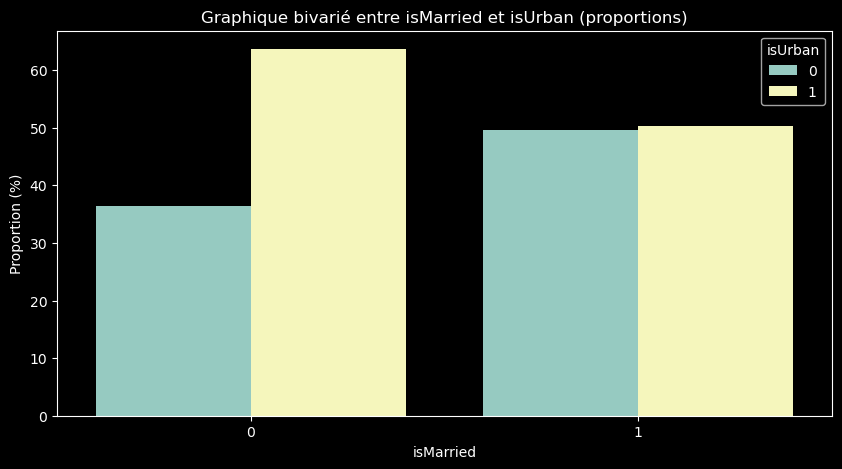

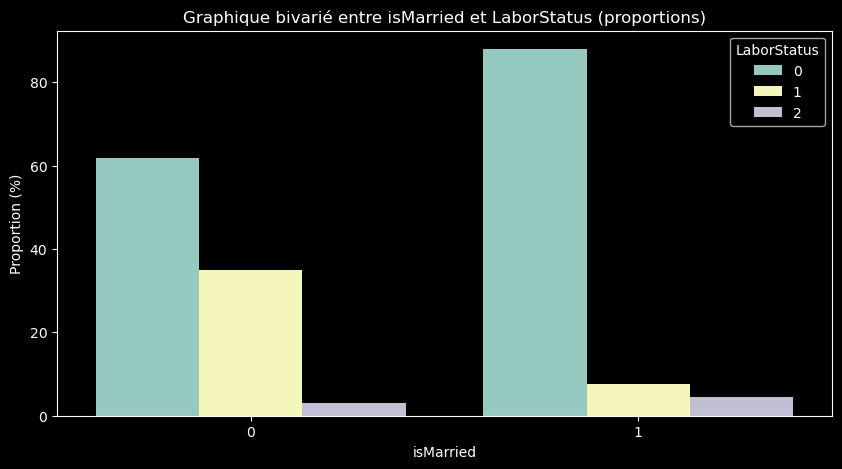

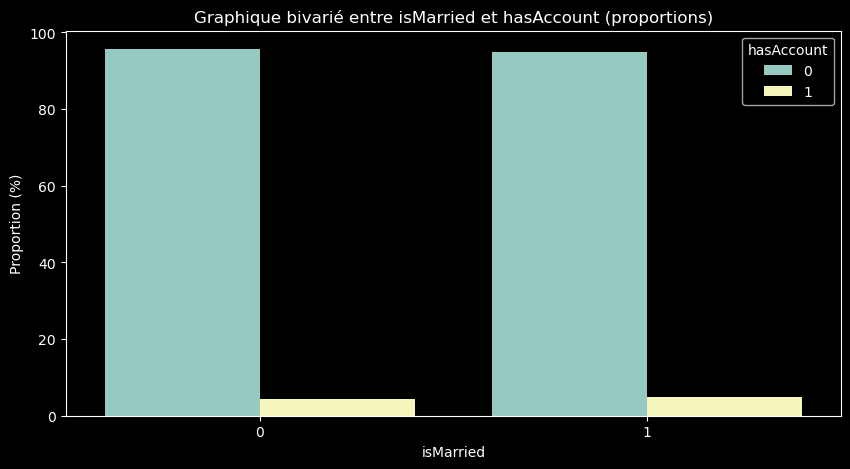

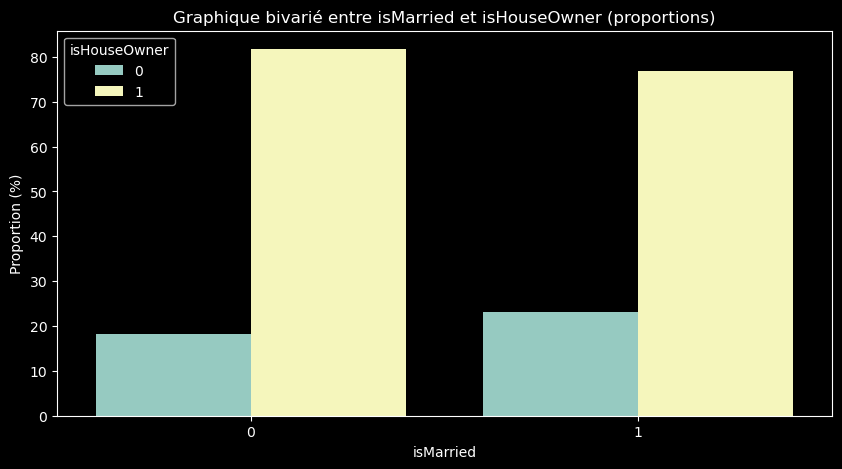

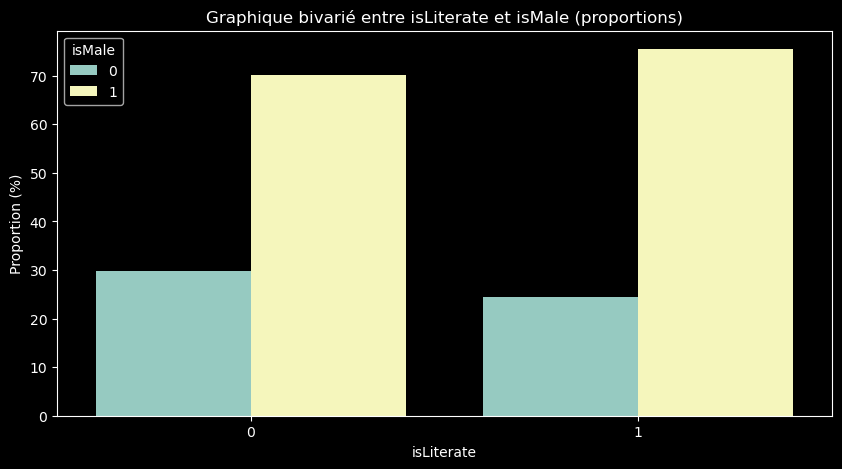

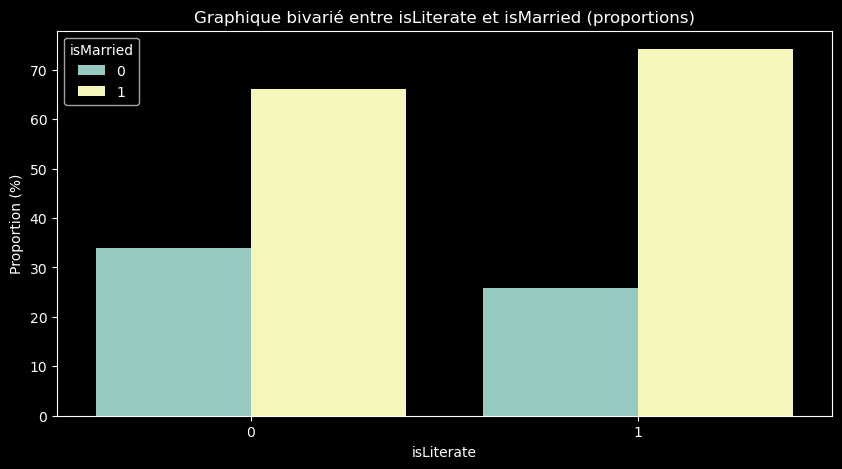

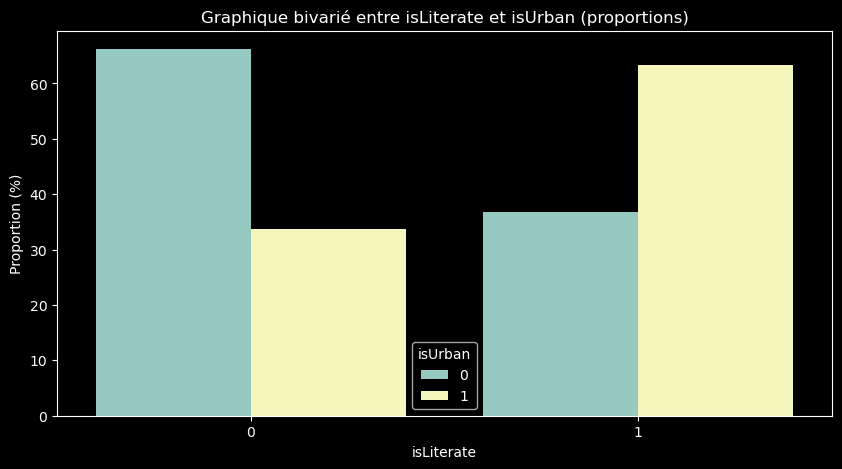

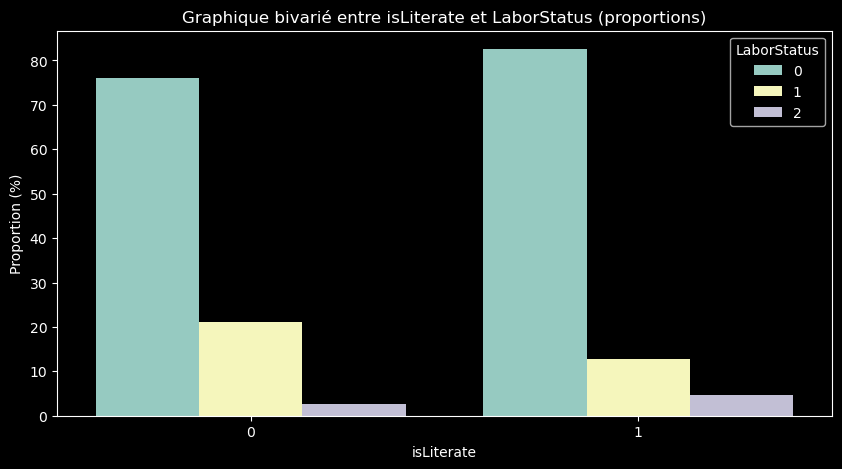

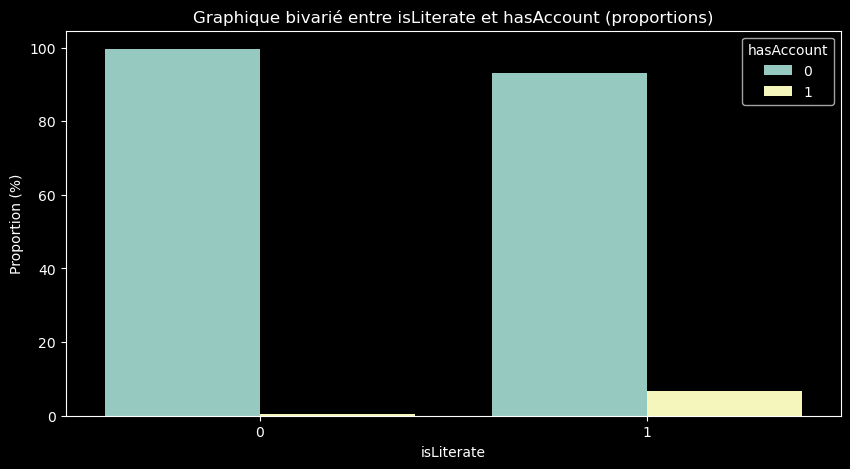

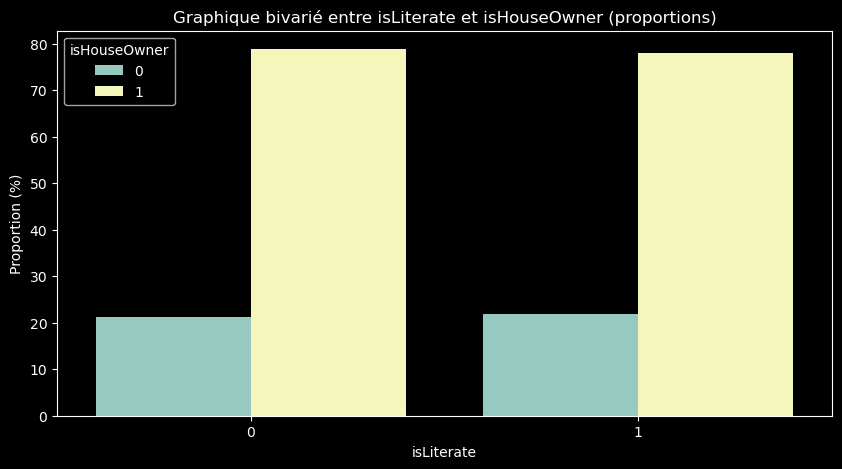

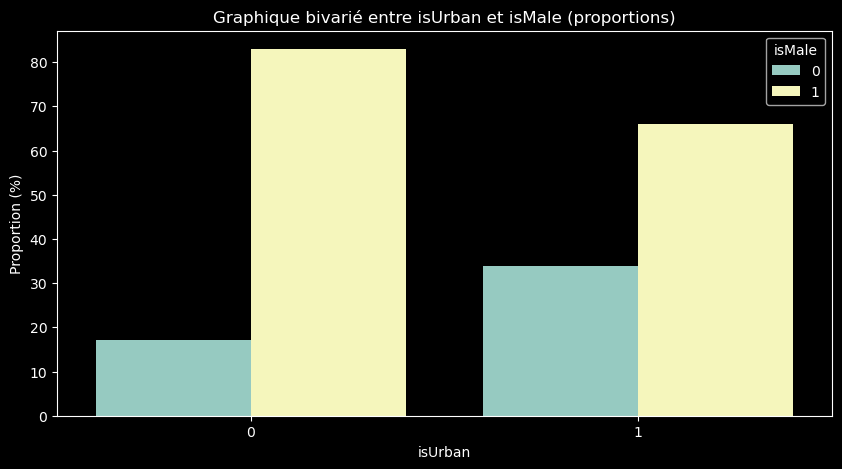

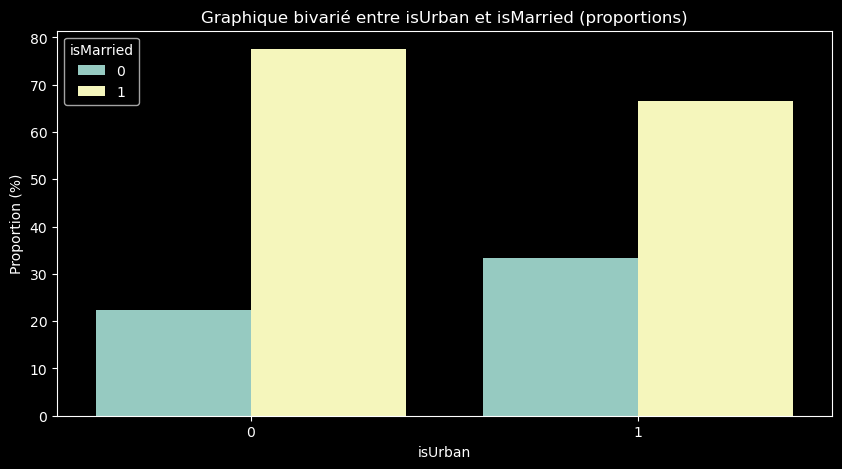

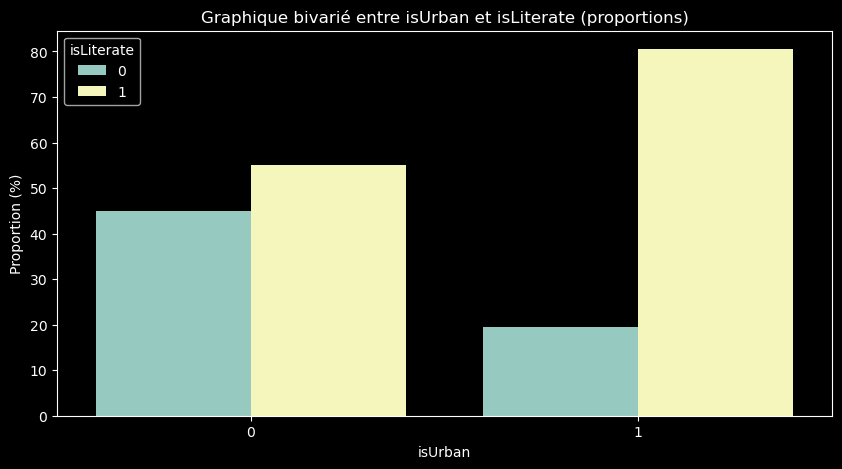

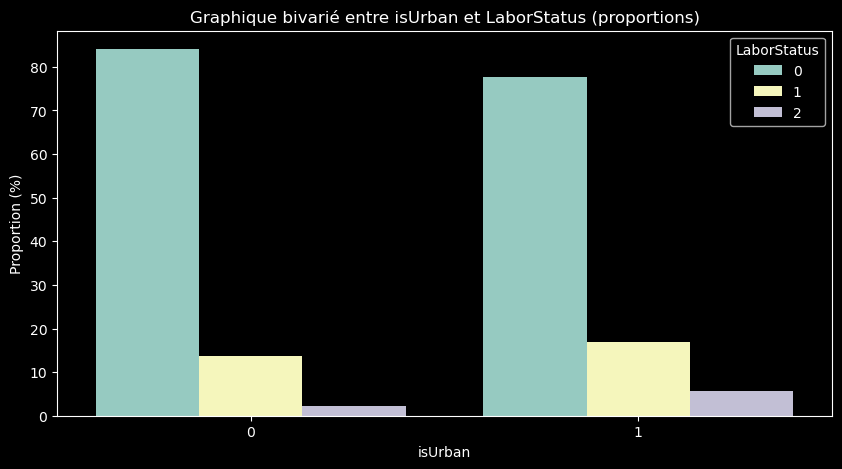

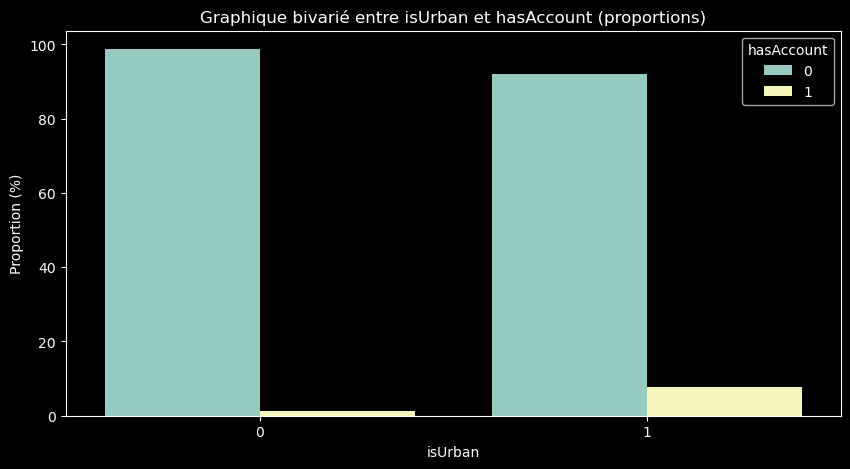

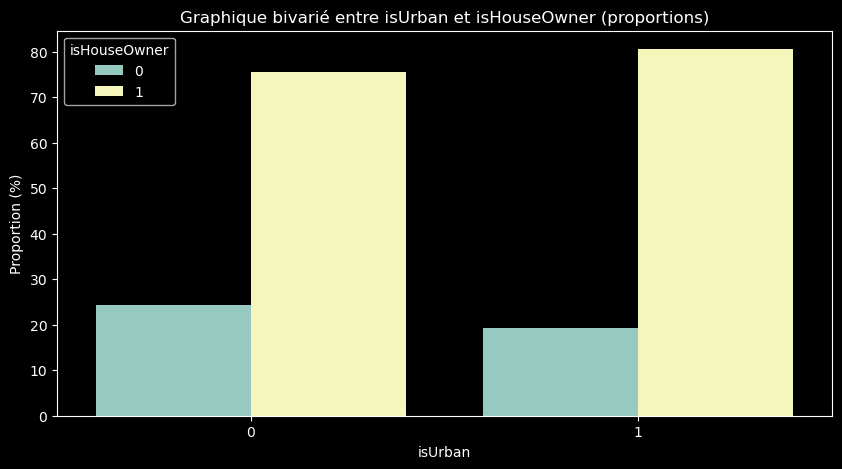

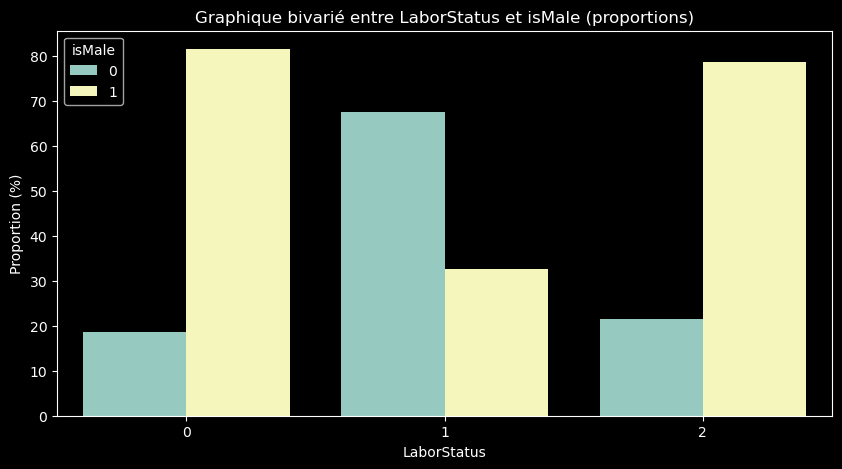

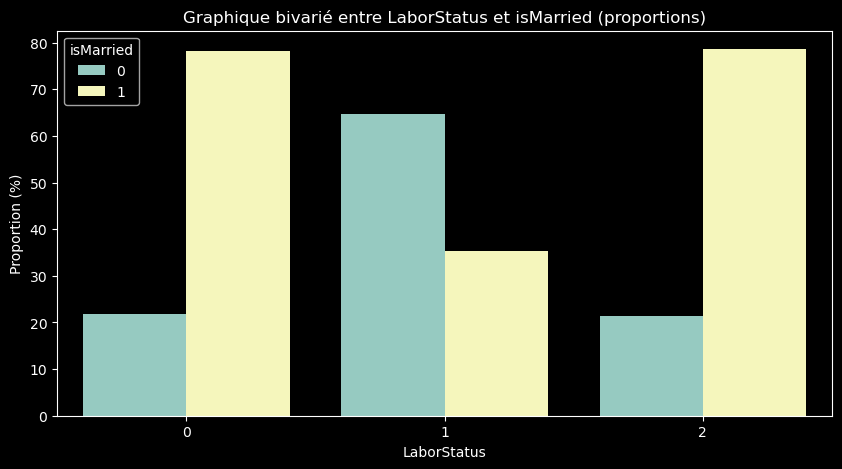

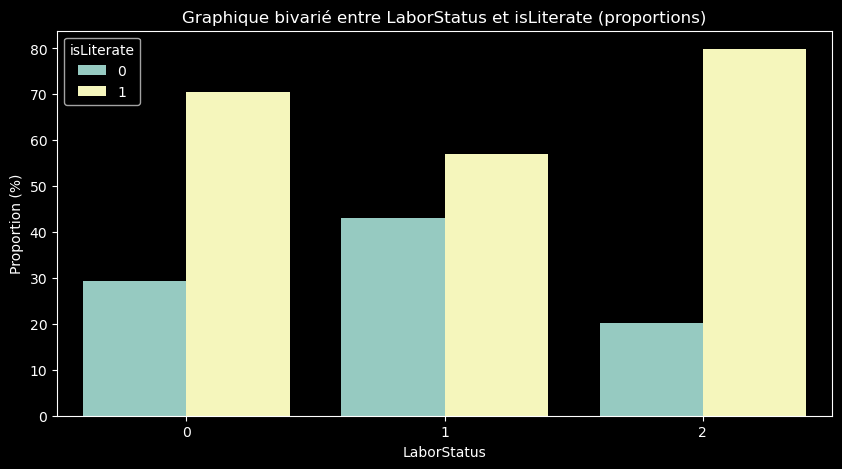

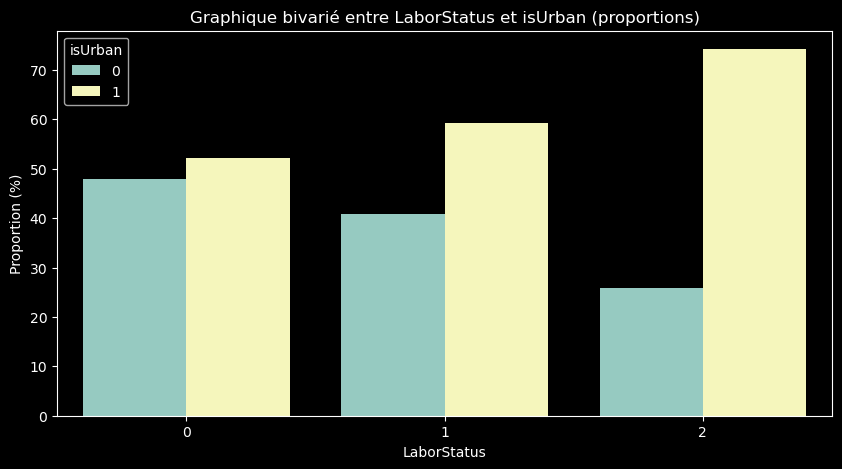

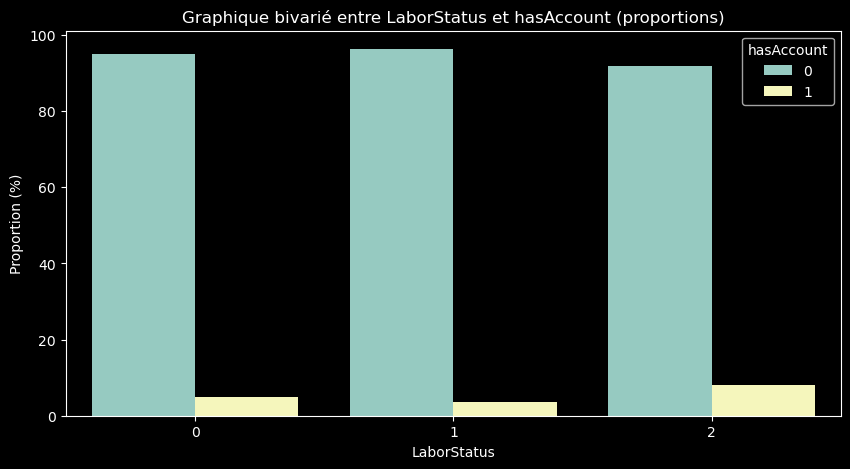

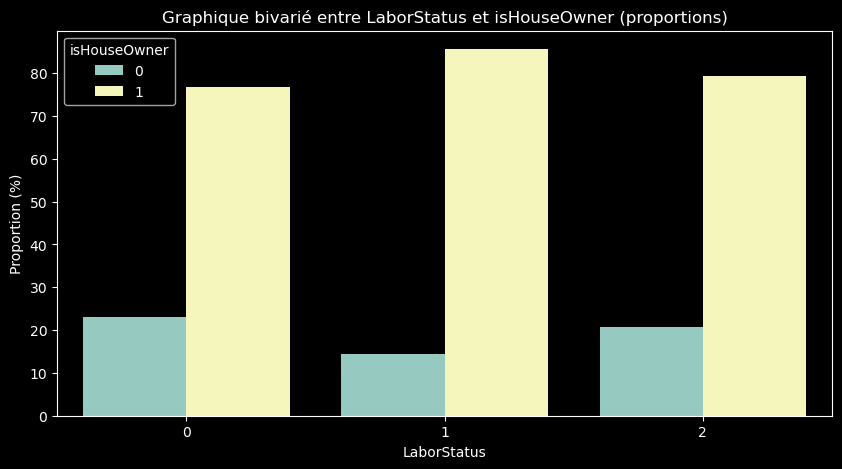

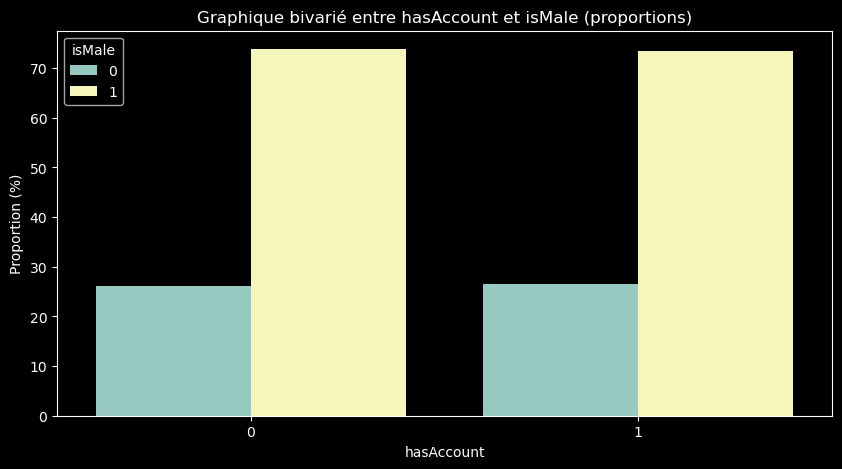

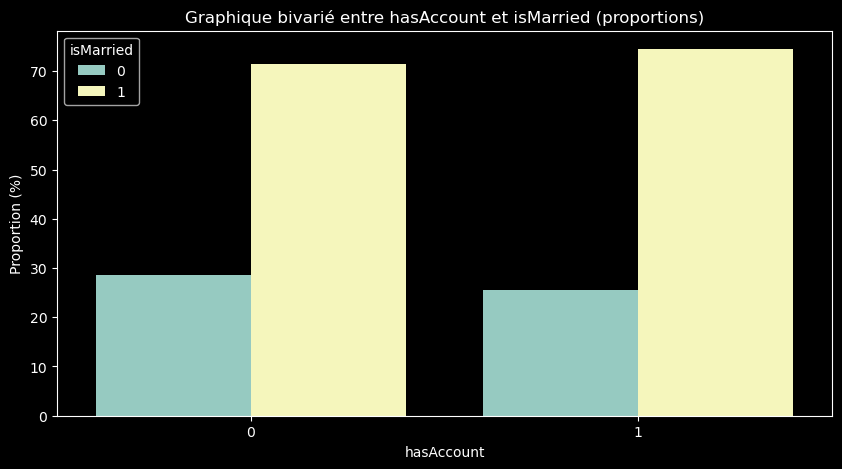

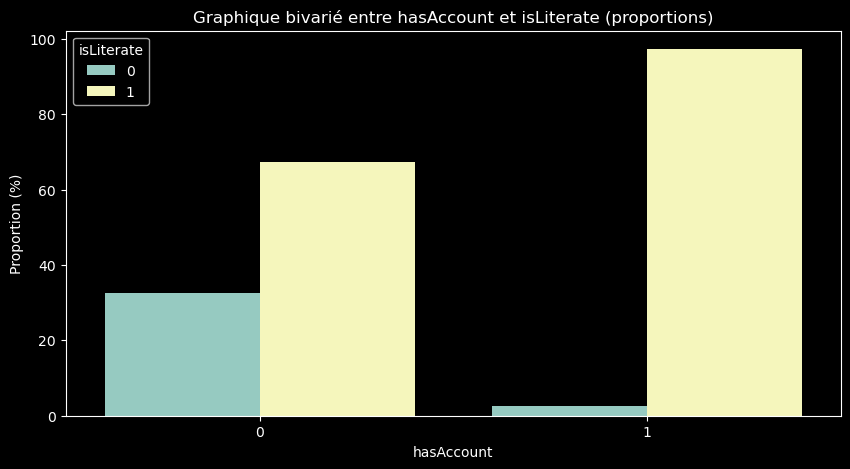

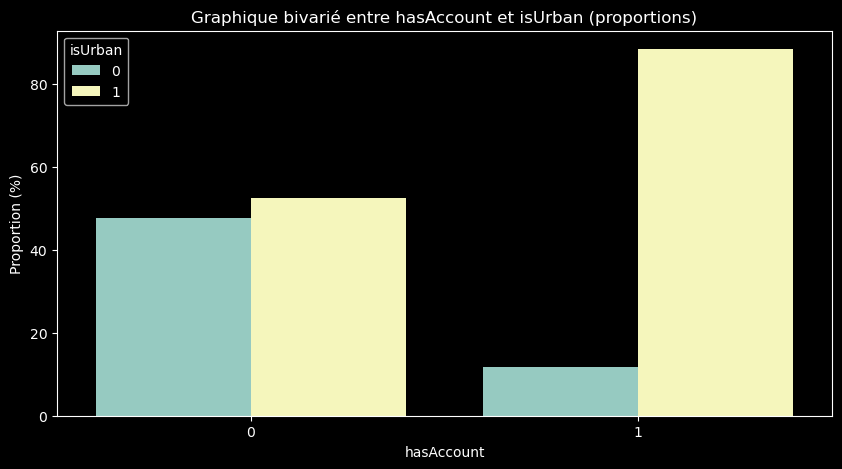

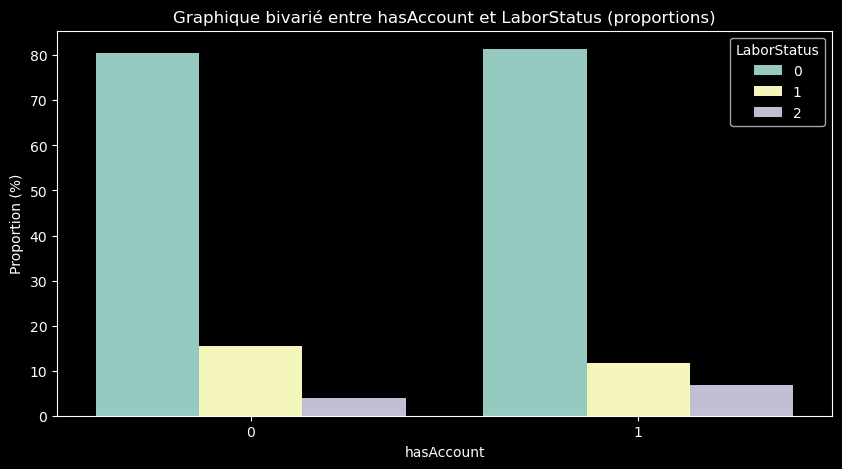

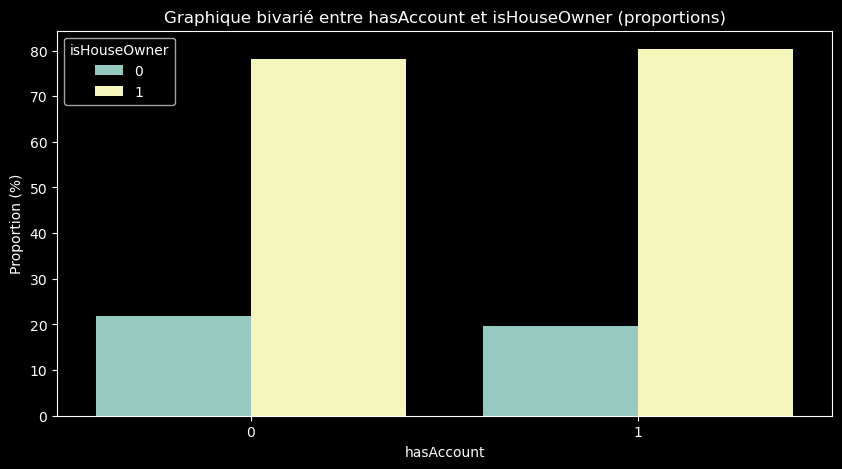

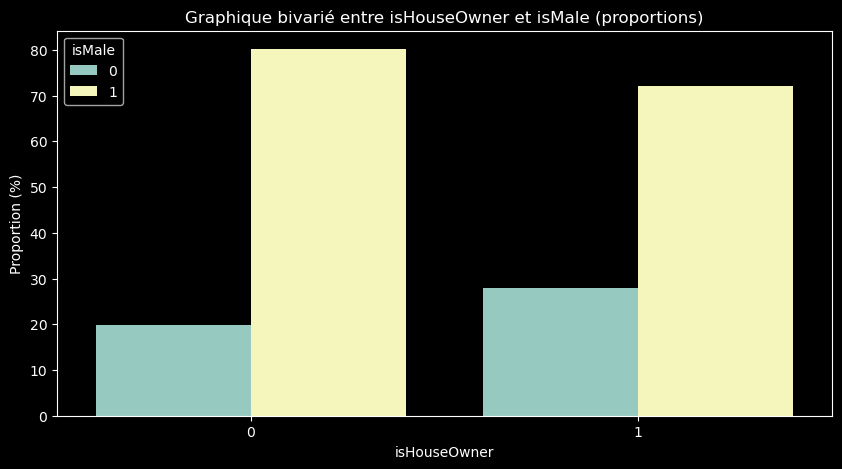

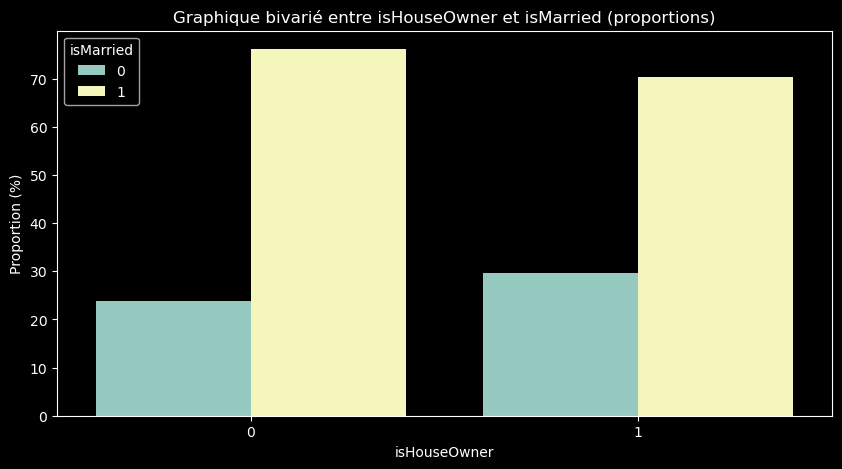

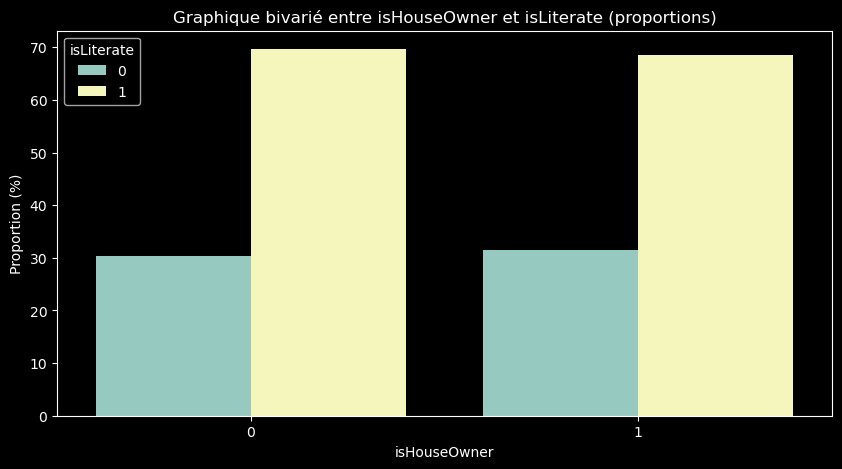

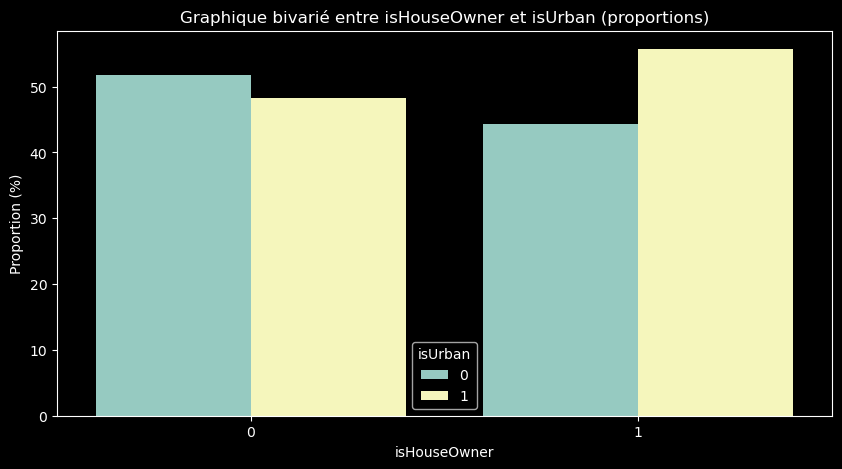

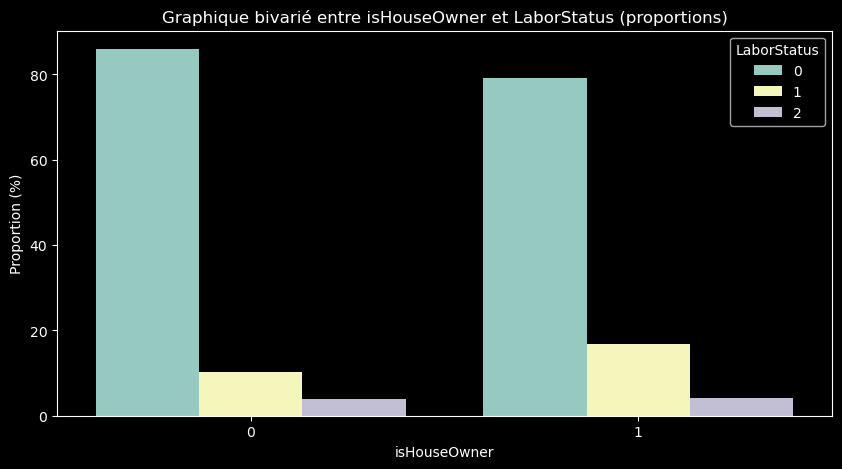

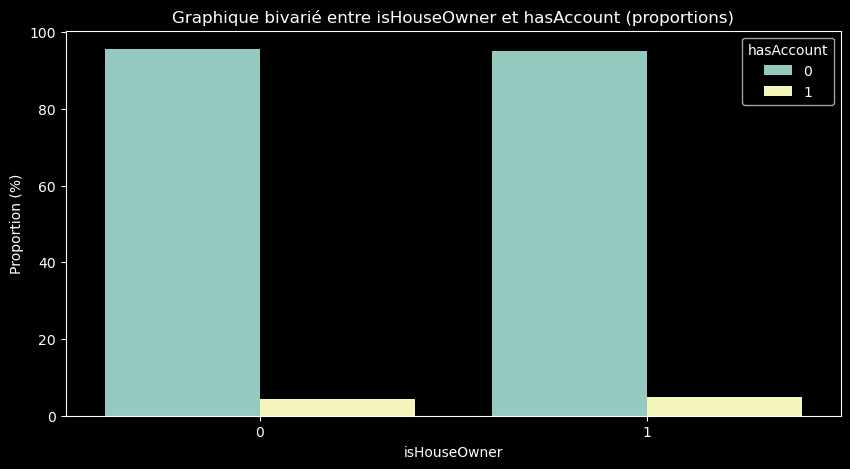

In [113]:
# Créer des graphiques bivariés pour chaque paire de variables qualitatives
df_qualitatives=df[['isMale','isMarried','isLiterate','isUrban','LaborStatus','hasAccount','isHouseOwner']]

for col1 in df_qualitatives:
    for col2 in df_qualitatives:
        if col1 != col2:
            # Calculer les proportions pour le graphique bivarié
            proportions = df_qualitatives.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100

            # Créer un graphique en barres empilées pour la paire de variables
            plt.figure(figsize=(10, 5))
            sns.barplot(x=col1, y='Proportion', hue=col2, data=proportions)
            plt.title(f"Graphique bivarié entre {col1} et {col2} (proportions)")
            plt.ylabel('Proportion (%)')
            plt.show()

<a id='data-cr'></a>

In [114]:
# Variables isMale та isMarried avoir une corrélation 0.7160442184080089, alors créons une nouvelle variable isUnmarriedMale
df['isUnmarriedMale'] = df.apply(lambda x: 1 if x['isMale'] == 1 and x['isMarried'] == 0 else 0, axis=1)

df[['isUnmarriedMale','isMale','isMarried']]

isUnmarriedMale  isMale  isMarried
0                   0       1          1
1                   0       1          1
2                   0       1          1
3                   1       1          0
4                   0       1          1
...               ...     ...        ...
4018                0       1          1
4019                0       0          0
4020                1       1          0
4022                0       1          1
4023                0       1          1

[3902 rows x 3 columns]

In [115]:
# Suppression de l'ancienne variable isMale
df = df.drop('isMale', axis=1)

In [116]:
df

ID  Weight   Age  HouseholdSize  isMarried  isLiterate   
0     408112     187  34.0              4          1           1  \
1      99522      95  39.0              8          1           1   
2     450411     225  53.0             10          1           1   
3     230464     148  54.0              1          0           1   
4     187256     221  69.0              5          1           1   
...      ...     ...   ...            ...        ...         ...   
4018  640576     128  64.0              3          1           0   
4019  288611     197  79.0              3          0           0   
4020  354302     161  36.0              3          0           1   
4022  168832     150  27.0              5          1           1   
4023  315705     307  30.0              4          1           1   

      nYearsEducation  isUrban  LaborStatus  hasAccount  hasLoan   
0            4.000000        1            0           0        1  \
1            0.000000        1            0           0        0   
2            4.000000        1            0           0        0   
3            5.000000        1            1           0        0   
4            0.000000        0            0           0        1   
...               ...      ...          ...         ...      ...   
4018         0.000000        0            0           0        0   
4019         0.000000        0            1           0        0   
4020         6.000000        0            0           0        0   
4022         4.000000        0            0           0        0   
4023         2.333333        0            0           0        1   

      isHouseOwner  yTotalHouseholdSpendings  isUnmarriedMale  
0                1                     518.4                0  
1                1                   12000.0                0  
2                1                   80160.0                0  
3                1                   13584.0                1  
4                1                    3200.0                0  
...            ...                       ...              ...  
4018             0                    8899.2                0  
4019             1                    5932.8                0  
4020             1                    3494.4                1  
4022             1                    4288.0                0  
4023             1                   14400.0                0  

[3902 rows x 14 columns]

In [117]:
#Afficher les lignes où isLiterate = 0 et nYearsEducation != 0
invalid_cases = df[(df['isLiterate'] == 0) & (df['nYearsEducation'] != 0)]

print("Incohérences des données:")
print(invalid_cases)


Incohérences des données:
          ID  Weight   Age  HouseholdSize  isMarried  isLiterate   
73    686320     398  27.0              5          0           0  \
169   589275     169  55.0              6          0           0   
394   475595     135  50.0              7          1           0   
478   432063     158  28.0              5          1           0   
573   537104     154  46.0              4          1           0   
...      ...     ...   ...            ...        ...         ...   
3610  222213     298  45.0             12          1           0   
3786  337416      74  43.0              5          1           0   
3842  505433     191  33.0              7          0           0   
3843  492205     107  42.0              5          1           0   
3863  635105      54  22.0              3          1           0   

      nYearsEducation  isUrban  LaborStatus  hasAccount  hasLoan   
73                2.0        0            0           0        0  \
169               6.0

In [118]:
'''
Il est possible que isLiterate == 0, mais la personne a plusieurs années d'études. 
Cela peut refléter des situations dans lesquelles une personne n’a pas été en mesure d’atteindre un niveau d’alphabétisation de base malgré sa fréquentation scolaire.
Normes pour définir l'alphabétisation:
1. UNESCO : Selon la définition de l'UNESCO, une personne alphabétisée est une personne capable de lire et d'écrire avec compréhension un texte court et simple pertinent pour sa vie quotidienne.
2. Normes nationales : De nombreux pays ont leurs propres normes, qui peuvent être plus ou moins strictes.

Afin d'analyser et de prévoir les dépenses des ménages, il est important d'intégrer correctement l'indicateur isLiterate dans le modèle,
car l'alphabétisation peut influencer le comportement des consommateurs,
leur capacité à gérer leurs finances et à prendre des décisions économiques rationnelles.
'''

"\nIl est possible que isLiterate == 0, mais la personne a plusieurs années d'études. \nCela peut refléter des situations dans lesquelles une personne n’a pas été en mesure d’atteindre un niveau d’alphabétisation de base malgré sa fréquentation scolaire.\nNormes pour définir l'alphabétisation:\n1. UNESCO : Selon la définition de l'UNESCO, une personne alphabétisée est une personne capable de lire et d'écrire avec compréhension un texte court et simple pertinent pour sa vie quotidienne.\n2. Normes nationales : De nombreux pays ont leurs propres normes, qui peuvent être plus ou moins strictes.\n\nAfin d'analyser et de prévoir les dépenses des ménages, il est important d'intégrer correctement l'indicateur isLiterate dans le modèle,\ncar l'alphabétisation peut influencer le comportement des consommateurs,\nleur capacité à gérer leurs finances et à prendre des décisions économiques rationnelles.\n"

In [119]:
# Créer une nouvelle variable qui prend en compte les deux caractéristiques
df['LiterateEducation'] = df['isLiterate'] * df['nYearsEducation']


In [120]:
df

ID  Weight   Age  HouseholdSize  isMarried  isLiterate   
0     408112     187  34.0              4          1           1  \
1      99522      95  39.0              8          1           1   
2     450411     225  53.0             10          1           1   
3     230464     148  54.0              1          0           1   
4     187256     221  69.0              5          1           1   
...      ...     ...   ...            ...        ...         ...   
4018  640576     128  64.0              3          1           0   
4019  288611     197  79.0              3          0           0   
4020  354302     161  36.0              3          0           1   
4022  168832     150  27.0              5          1           1   
4023  315705     307  30.0              4          1           1   

      nYearsEducation  isUrban  LaborStatus  hasAccount  hasLoan   
0            4.000000        1            0           0        1  \
1            0.000000        1            0           0        0   
2            4.000000        1            0           0        0   
3            5.000000        1            1           0        0   
4            0.000000        0            0           0        1   
...               ...      ...          ...         ...      ...   
4018         0.000000        0            0           0        0   
4019         0.000000        0            1           0        0   
4020         6.000000        0            0           0        0   
4022         4.000000        0            0           0        0   
4023         2.333333        0            0           0        1   

      isHouseOwner  yTotalHouseholdSpendings  isUnmarriedMale   
0                1                     518.4                0  \
1                1                   12000.0                0   
2                1                   80160.0                0   
3                1                   13584.0                1   
4                1                    3200.0                0   
...            ...                       ...              ...   
4018             0                    8899.2                0   
4019             1                    5932.8                0   
4020             1                    3494.4                1   
4022             1                    4288.0                0   
4023             1                   14400.0                0   

      LiterateEducation  
0              4.000000  
1              0.000000  
2              4.000000  
3              5.000000  
4              0.000000  
...                 ...  
4018           0.000000  
4019           0.000000  
4020           6.000000  
4022           4.000000  
4023           2.333333  

[3902 rows x 15 columns]

In [121]:
df=df.drop(['isLiterate','nYearsEducation'], axis=1)

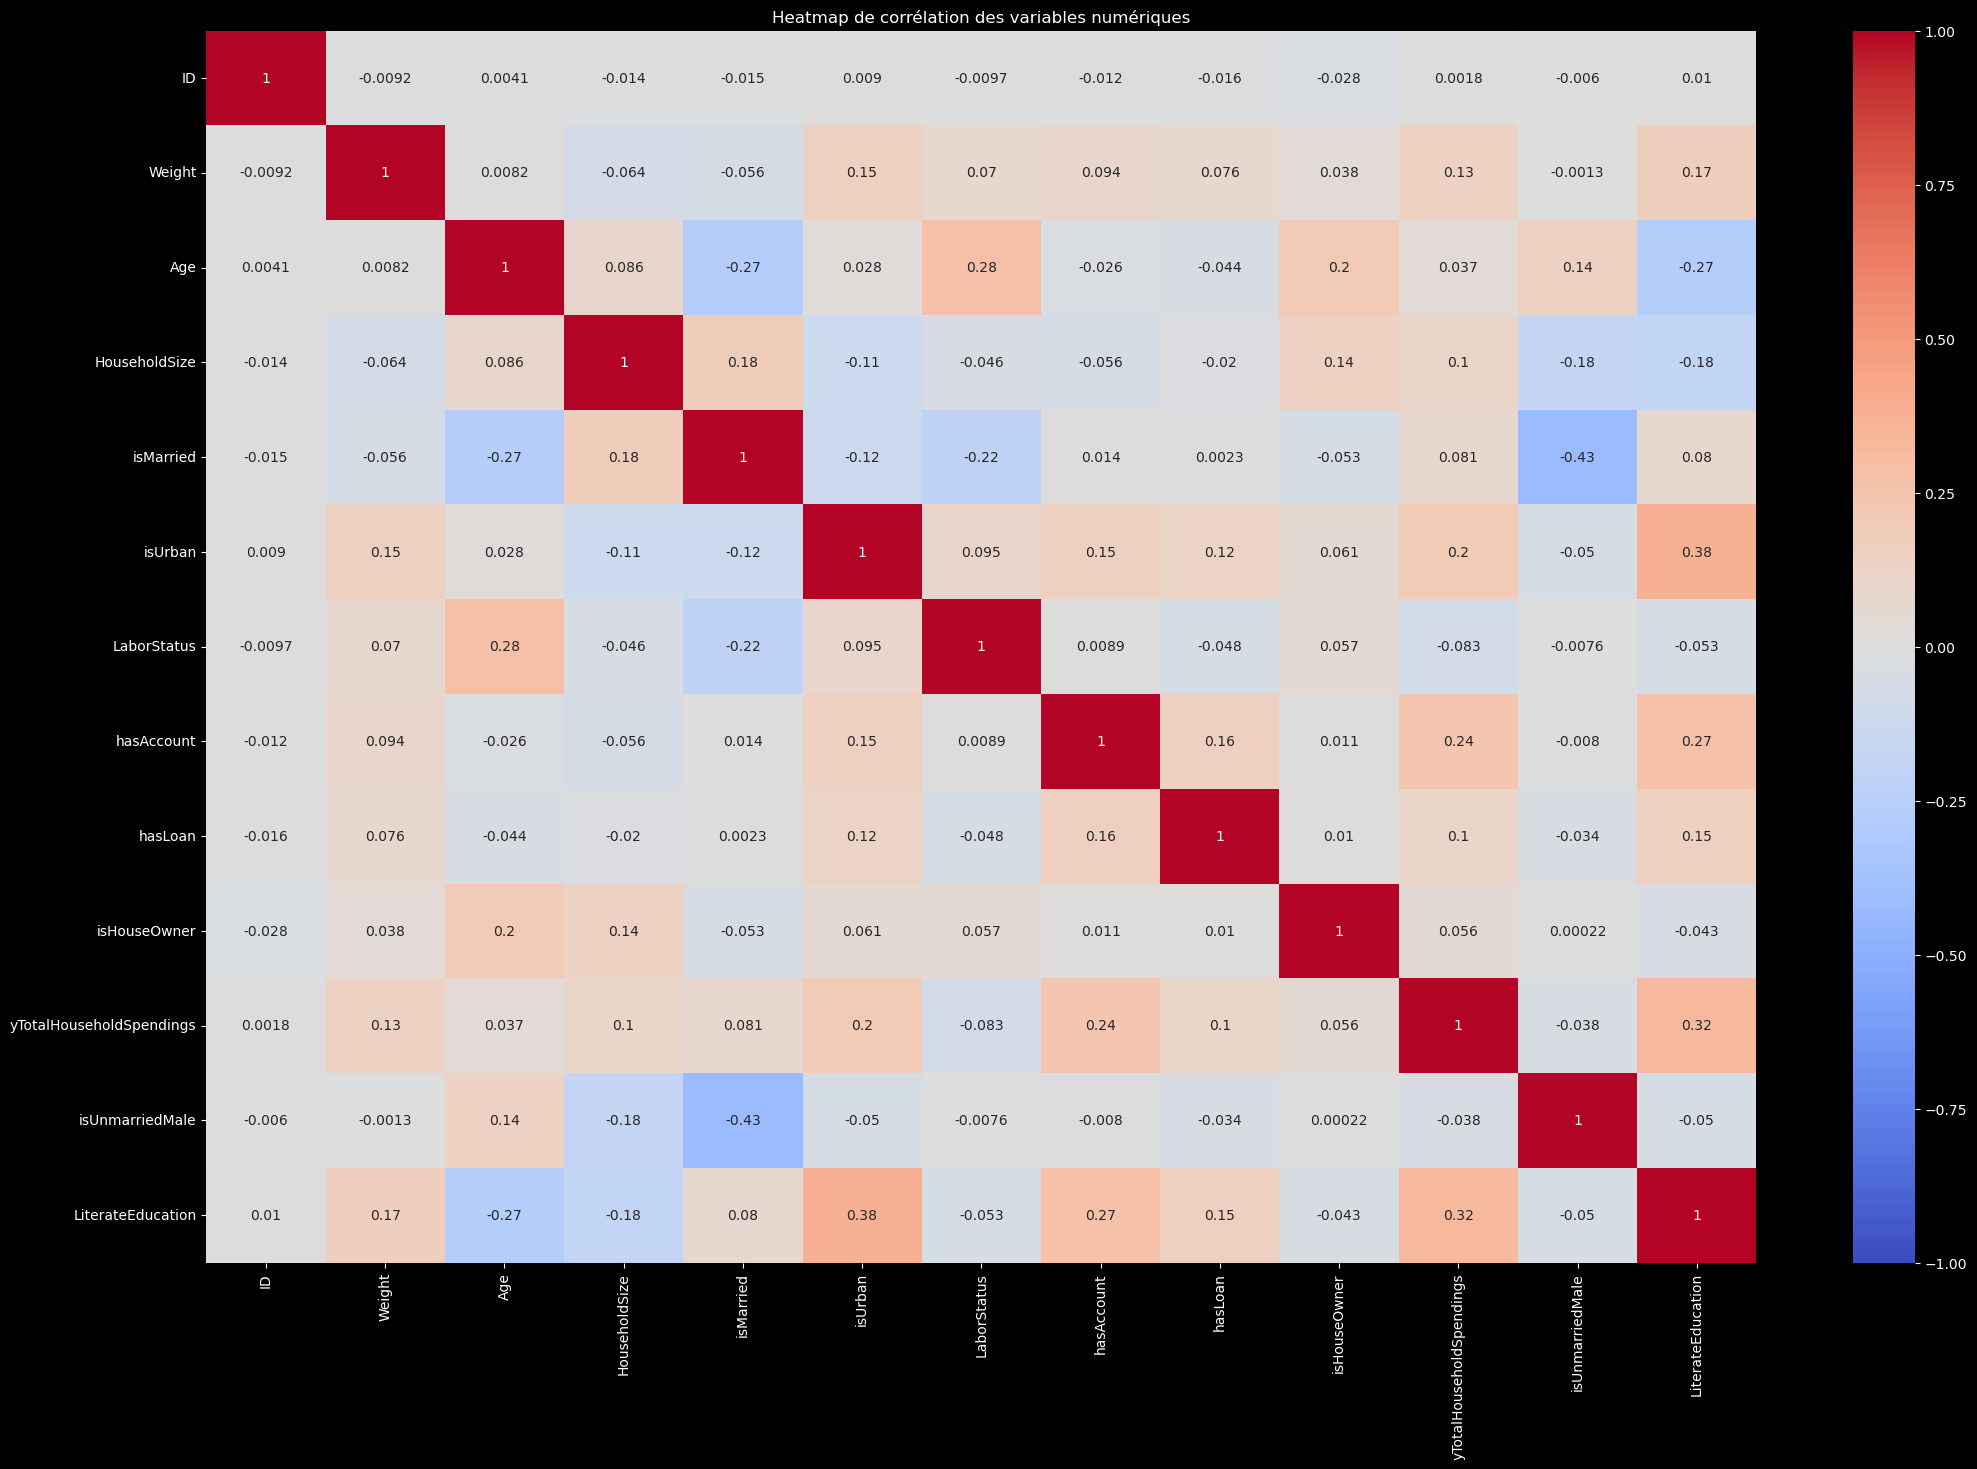

In [122]:
df_corr2=df.corr()
df_corr2
plt.figure(figsize=(25,16))
sns.heatmap(df_corr2, vmin=-1,vmax=1, cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

La corrélation entre les variables indépendantes et la variable cible est très faible, ce qui peut indiquer plusieurs problèmes possibles :

Variables insuffisamment pertinentes : Il est possible que les variables sélectionnées n'aient pas d'effet significatif sur la variable cible et qu'il faille trouver d'autres variables plus étroitement liées aux dépenses des ménages.

Une analyse supplémentaire est nécessaire pour comprendre les relations entre les variables, comme l'analyse en composantes principales (ACP) pour voir si certaines variables peuvent être combinées pour mieux décrire la variable cible.

En général, s’il n’existe pas de forte corrélation, il peut également être utile d’inclure des types d’analyses supplémentaires et éventuellement d’augmenter le volume ou la qualité des données.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3902 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3902 non-null   int64  
 1   Weight                    3902 non-null   int64  
 2   Age                       3902 non-null   float64
 3   HouseholdSize             3902 non-null   int64  
 4   isMarried                 3902 non-null   int64  
 5   isUrban                   3902 non-null   int64  
 6   LaborStatus               3902 non-null   int64  
 7   hasAccount                3902 non-null   int64  
 8   hasLoan                   3902 non-null   int64  
 9   isHouseOwner              3902 non-null   int64  
 10  yTotalHouseholdSpendings  3902 non-null   float64
 11  isUnmarriedMale           3902 non-null   int64  
 12  LiterateEducation         3902 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 426.8 KB


In [124]:
df_1=df.copy()

# Préparation des données pour la modélisation. <a id='data-préparation'></a>

In [125]:
# Identification des variables booléennes
boolean_columns = ['isMarried', 'hasAccount', 'hasLoan', 'isHouseOwner','isUnmarriedMale','isUrban']
# Sélection de variables numériques pour la normalisation
numeric_columns = ['Weight', 'Age','LiterateEducation', 'HouseholdSize']

df[numeric_columns]

Weight   Age  LiterateEducation  HouseholdSize
0        187  34.0           4.000000              4
1         95  39.0           0.000000              8
2        225  53.0           4.000000             10
3        148  54.0           5.000000              1
4        221  69.0           0.000000              5
...      ...   ...                ...            ...
4018     128  64.0           0.000000              3
4019     197  79.0           0.000000              3
4020     161  36.0           6.000000              3
4022     150  27.0           4.000000              5
4023     307  30.0           2.333333              4

[3902 rows x 4 columns]

In [126]:
df_index = df.index
# Conversion de LaborStatus en  one-hot encoding
#one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
#labor_status_encoded = one_hot_encoder.fit_transform(df[['LaborStatus']])

#labor_status_encoded 

À l'aide de One-Hot Encoding, j'ai défini la variable LaborStatus entre 0 et 1, ce qui nous permet de stocker des informations sur les catégories qu'elle représente tout en garantissant que toutes les données sont dans la même plage pour un traitement ultérieur.

In [127]:
# Création d'un DataFrame avec des variables codées et des index correspondants
#labor_status_encoded_df = pd.DataFrame(labor_status_encoded, index=df_index, columns=one_hot_encoder.get_feature_names_out(['LaborStatus']))

#labor_status_encoded_df

In [128]:
# Concaténation DataFrame avec des variables codées
#df = pd.concat([df, labor_status_encoded_df], axis=1).drop(columns=['LaborStatus'])


In [129]:
df

ID  Weight   Age  HouseholdSize  isMarried  isUrban  LaborStatus   
0     408112     187  34.0              4          1        1            0  \
1      99522      95  39.0              8          1        1            0   
2     450411     225  53.0             10          1        1            0   
3     230464     148  54.0              1          0        1            1   
4     187256     221  69.0              5          1        0            0   
...      ...     ...   ...            ...        ...      ...          ...   
4018  640576     128  64.0              3          1        0            0   
4019  288611     197  79.0              3          0        0            1   
4020  354302     161  36.0              3          0        0            0   
4022  168832     150  27.0              5          1        0            0   
4023  315705     307  30.0              4          1        0            0   

      hasAccount  hasLoan  isHouseOwner  yTotalHouseholdSpendings   
0              0        1             1                     518.4  \
1              0        0             1                   12000.0   
2              0        0             1                   80160.0   
3              0        0             1                   13584.0   
4              0        1             1                    3200.0   
...          ...      ...           ...                       ...   
4018           0        0             0                    8899.2   
4019           0        0             1                    5932.8   
4020           0        0             1                    3494.4   
4022           0        0             1                    4288.0   
4023           0        1             1                   14400.0   

      isUnmarriedMale  LiterateEducation  
0                   0           4.000000  
1                   0           0.000000  
2                   0           4.000000  
3                   1           5.000000  
4                   0           0.000000  
...               ...                ...  
4018                0           0.000000  
4019                0           0.000000  
4020                1           6.000000  
4022                0           4.000000  
4023                0           2.333333  

[3902 rows x 13 columns]

In [130]:
df_2=df.copy()

### Définir la variable cible et les prédicteurs. <a id='data-pred'></a>

In [131]:
# On sépare les variables de la cible
X=df.drop(['yTotalHouseholdSpendings','ID'], axis=1)
X

Weight   Age  HouseholdSize  isMarried  isUrban  LaborStatus   
0        187  34.0              4          1        1            0  \
1         95  39.0              8          1        1            0   
2        225  53.0             10          1        1            0   
3        148  54.0              1          0        1            1   
4        221  69.0              5          1        0            0   
...      ...   ...            ...        ...      ...          ...   
4018     128  64.0              3          1        0            0   
4019     197  79.0              3          0        0            1   
4020     161  36.0              3          0        0            0   
4022     150  27.0              5          1        0            0   
4023     307  30.0              4          1        0            0   

      hasAccount  hasLoan  isHouseOwner  isUnmarriedMale  LiterateEducation  
0              0        1             1                0           4.000000  
1              0        0             1                0           0.000000  
2              0        0             1                0           4.000000  
3              0        0             1                1           5.000000  
4              0        1             1                0           0.000000  
...          ...      ...           ...              ...                ...  
4018           0        0             0                0           0.000000  
4019           0        0             1                0           0.000000  
4020           0        0             1                1           6.000000  
4022           0        0             1                0           4.000000  
4023           0        1             1                0           2.333333  

[3902 rows x 11 columns]

In [132]:
y=df['yTotalHouseholdSpendings']
y

0         518.4
1       12000.0
2       80160.0
3       13584.0
4        3200.0
         ...   
4018     8899.2
4019     5932.8
4020     3494.4
4022     4288.0
4023    14400.0
Name: yTotalHouseholdSpendings, Length: 3902, dtype: float64

###  Division des données en ensemble d'entraînement et ensemble de test <a id='data-test'></a>

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"La taille de données d'entrainement : {X_train.shape[0]}")
print(f"La taille des données de test : {X_test.shape[0]}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_train: {len(y_train)}")

La taille de données d'entrainement : 3121
La taille des données de test : 781
Length of y_test: 781
Length of y_train: 3121


In [134]:
# Sélection de variables numériques pour la normalisation
numeric_data_train = X_train[numeric_columns]
numeric_data_test = X_test[numeric_columns]
numeric_data_train

Weight   Age  LiterateEducation  HouseholdSize
254      232  36.0               10.0              2
1713     180  43.0                0.0              2
1869     107  45.0                0.0              7
2634     173  72.0                0.0              6
2858      85  57.0                4.0              5
...      ...   ...                ...            ...
1156     125  37.0                0.0              9
1324     168  53.0                8.0              5
878      201  45.0                0.0              2
3614     192  26.0                6.0              4
3268     419  38.0               12.0              2

[3121 rows x 4 columns]

### Standardiser les données <a id='data-stand'></a>

In [135]:
scaler = StandardScaler()
numeric_data_scaled_train = scaler.fit_transform(numeric_data_train)
numeric_data_scaled_test = scaler.transform(numeric_data_test)

In [136]:
numeric_data_scaled_train

array([[ 0.17226698, -0.59344775,  1.38275773, -1.27986764],
       [-0.25608965, -0.14668507, -0.96334995, -1.27986764],
       [-0.85743646, -0.01903859, -0.96334995,  0.55954427],
       ...,
       [-0.08309948, -0.01903859, -0.96334995, -1.27986764],
       [-0.15723812, -1.23168015,  0.44431466, -0.54410288],
       [ 1.71270332, -0.46580127,  1.85197926, -1.27986764]])

In [137]:
numeric_data_scaled_test

array([[-0.25608965, -0.46580127, -0.49412841,  0.19166189],
       [-1.03866426, -1.16785691, -0.02490688,  0.19166189],
       [-0.65149577, -1.35932663, -0.72873918, -1.27986764],
       ...,
       [-0.08309948,  0.30007761,  0.44431466, -0.17622049],
       [-0.6597334 , -0.01903859, -0.96334995, -0.91198526],
       [-0.35494118,  1.32124945,  0.91353619,  0.19166189]])

In [138]:
# Transformez des données normalisées en DataFrame
numeric_data_scaled_df_train = pd.DataFrame(numeric_data_scaled_train, index=numeric_data_train.index, columns=numeric_data_train.columns)
numeric_data_scaled_df_test = pd.DataFrame(numeric_data_scaled_test, index=numeric_data_test.index, columns=numeric_data_test.columns)


In [139]:
numeric_data_scaled_df_train

Weight       Age  LiterateEducation  HouseholdSize
254   0.172267 -0.593448           1.382758      -1.279868
1713 -0.256090 -0.146685          -0.963350      -1.279868
1869 -0.857436 -0.019039          -0.963350       0.559544
2634 -0.313753  1.704189          -0.963350       0.191662
2858 -1.038664  0.746840          -0.024907      -0.176220
...        ...       ...                ...            ...
1156 -0.709159 -0.529625          -0.963350       1.295309
1324 -0.354941  0.491547           0.913536      -0.176220
878  -0.083099 -0.019039          -0.963350      -1.279868
3614 -0.157238 -1.231680           0.444315      -0.544103
3268  1.712703 -0.465801           1.851979      -1.279868

[3121 rows x 4 columns]

In [140]:
X_train

Weight   Age  HouseholdSize  isMarried  isUrban  LaborStatus   
254      232  36.0              2          0        0            0  \
1713     180  43.0              2          0        1            0   
1869     107  45.0              7          0        0            1   
2634     173  72.0              6          0        0            1   
2858      85  57.0              5          0        0            1   
...      ...   ...            ...        ...      ...          ...   
1156     125  37.0              9          1        0            1   
1324     168  53.0              5          1        1            0   
878      201  45.0              2          1        1            0   
3614     192  26.0              4          1        0            0   
3268     419  38.0              2          1        1            0   

      hasAccount  hasLoan  isHouseOwner  isUnmarriedMale  LiterateEducation  
254            0        0             1                1               10.0  
1713           0        0             0                0                0.0  
1869           0        0             1                0                0.0  
2634           0        0             1                0                0.0  
2858           0        0             1                0                4.0  
...          ...      ...           ...              ...                ...  
1156           0        0             0                0                0.0  
1324           1        1             1                0                8.0  
878            0        0             1                0                0.0  
3614           0        0             0                0                6.0  
3268           0        0             1                0               12.0  

[3121 rows x 11 columns]

In [141]:
# Suppression des anciennes variables numériques du DataFrame d'origine
X_train = X_train.drop(columns=numeric_data_train.columns)
X_test = X_test.drop(columns=numeric_data_test.columns)

In [142]:
# Fusion de variables numériques normalisées avec les données originales
X_train = pd.concat([X_train, numeric_data_scaled_df_train], axis=1)
X_train

isMarried  isUrban  LaborStatus  hasAccount  hasLoan  isHouseOwner   
254           0        0            0           0        0             1  \
1713          0        1            0           0        0             0   
1869          0        0            1           0        0             1   
2634          0        0            1           0        0             1   
2858          0        0            1           0        0             1   
...         ...      ...          ...         ...      ...           ...   
1156          1        0            1           0        0             0   
1324          1        1            0           1        1             1   
878           1        1            0           0        0             1   
3614          1        0            0           0        0             0   
3268          1        1            0           0        0             1   

      isUnmarriedMale    Weight       Age  LiterateEducation  HouseholdSize  
254                 1  0.172267 -0.593448           1.382758      -1.279868  
1713                0 -0.256090 -0.146685          -0.963350      -1.279868  
1869                0 -0.857436 -0.019039          -0.963350       0.559544  
2634                0 -0.313753  1.704189          -0.963350       0.191662  
2858                0 -1.038664  0.746840          -0.024907      -0.176220  
...               ...       ...       ...                ...            ...  
1156                0 -0.709159 -0.529625          -0.963350       1.295309  
1324                0 -0.354941  0.491547           0.913536      -0.176220  
878                 0 -0.083099 -0.019039          -0.963350      -1.279868  
3614                0 -0.157238 -1.231680           0.444315      -0.544103  
3268                0  1.712703 -0.465801           1.851979      -1.279868  

[3121 rows x 11 columns]

In [143]:
X_test = pd.concat([X_test, numeric_data_scaled_df_test], axis=1)
X_test

isMarried  isUrban  LaborStatus  hasAccount  hasLoan  isHouseOwner   
970           1        1            0           0        0             1  \
3128          1        0            0           0        0             0   
2009          1        1            0           0        0             0   
3651          0        1            1           1        1             1   
1730          1        0            0           0        0             1   
...         ...      ...          ...         ...      ...           ...   
2365          1        0            0           0        0             1   
3978          1        0            0           0        0             1   
1854          1        1            0           0        0             1   
3686          0        1            0           0        0             1   
2370          0        1            1           1        0             1   

      isUnmarriedMale    Weight       Age  LiterateEducation  HouseholdSize  
970                 0 -0.256090 -0.465801          -0.494128       0.191662  
3128                0 -1.038664 -1.167857          -0.024907       0.191662  
2009                0 -0.651496 -1.359327          -0.728739      -1.279868  
3651                0 -0.602070  2.214775           0.209704       1.663191  
1730                0 -1.145753 -1.614620          -0.963350      -0.176220  
...               ...       ...       ...                ...            ...  
2365                0 -0.107812  1.895659          -0.963350      -0.544103  
3978                0 -1.302268  1.193603          -0.963350       0.559544  
1854                0 -0.083099  0.300078           0.444315      -0.176220  
3686                0 -0.659733 -0.019039          -0.963350      -0.911985  
2370                1 -0.354941  1.321249           0.913536       0.191662  

[781 rows x 11 columns]

### Log transform la variable cible (pour réduire la variabilité et normaliser la distribution). <a id='data-log'></a>

La transformation logarithmique contribuera à rendre la distribution plus symétrique et plus proche de la normale, à lisser la relation non linéaire entre la variable cible et les prédicteurs, ce qui améliore les résultats de la modélisation, à réduire la plage de valeurs de la variable cible, ce qui facilite l’apprentissage du modèle et améliore sa stabilité.

In [144]:
y_log_train = np.log1p(y_train)
y_log_test = np.log1p(y_test)

y_log_train

254      8.253488
1713     7.742836
1869     8.903081
2634     8.841159
2858     8.483554
          ...    
1156     8.759951
1324    10.555839
878      8.498337
3614     8.337349
3268    10.433675
Name: yTotalHouseholdSpendings, Length: 3121, dtype: float64

In [145]:
y_log_test

970     11.746923
3128     8.468549
2009     9.351927
3651    11.080926
1730     8.553525
          ...    
2365     7.961161
3978    10.834852
1854     9.366814
3686     9.989344
2370    11.253131
Name: yTotalHouseholdSpendings, Length: 781, dtype: float64

<a id='data-modélisation'></a>


# Modélisation


**Explication du choix des modèles:**
Flexibilité et capacité à détecter des dépendances complexes : Les modèles sélectionnés incluent des méthodes linéaires simples (Ridge Regression) ainsi que des modèles non linéaires complexes (XGBRegressor, CatBoost, MLPRegressor). Cela permet de prendre en compte la possibilité de dépendances complexes entre les caractéristiques et la variable cible, qui pourraient ne pas être évidentes en utilisant uniquement des modèles linéaires.
Méthodes ensemblistes : L'utilisation de méthodes ensemblistes comme Random Forest, Gradient Boosting, Bagging permet de réduire la variance et d'améliorer la stabilité des modèles.
Traitement du déséquilibre : Les modèles comme XGBRegressor et CatBoost ont des mécanismes intégrés pour traiter le déséquilibre dans les données.
Diversité des approches : L'utilisation de différents types de modèles permet de comparer leur efficacité et de choisir le meilleur modèle pour la tâche spécifique. Cela aide également à identifier les forces et les faiblesses de chaque approche.
En somme, la sélection de ces modèles assure une exploration complète de ce jeu de données et permet de trouver la solution la plus efficace pour la prédiction.

In [146]:
#Création de la fonction score, qui nous permettra de calculer et de sauvegarder les métriques de performance du modèle
#df_scores = pd.DataFrame(columns=['modele', 'R2', 'RMSE', 'MAE', 'MedAE', 'EVS', 'time'])

def score(modele, R2, RMSE, MAE, MedAE, EVS, time):
    df_scores.loc[df_scores.shape[0]] = [modele, R2, RMSE, MAE, MedAE, EVS, time]
    df_scores.sort_values(by='R2', ascending=False, inplace=True)
    df_scores.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    return df_scores
scores = []
df_scores = pd.DataFrame(
    scores, columns=['modele', 'R2', 'RMSE', 'MAE','MedAE', 'EVS', 'time'])

In [147]:
def plot_feature_importances(model, X, model_name):
    """
    Visualise l'importance des variables du modèle.

    Paramètres:
    - model : un modèle entraîné qui possède l'attribut feature_importances_
    - X : Ensemble de données avec fonctionnalités (variables indépendantes)
    - model_name : Le nom du modèle qui sera utilisé dans le titre du graphique
    """
    importances = model.feature_importances_
    feature_importances = pd.Series(importances, index=X.columns)

    # Trier et visualiser l'importance des variables
    feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()


In [148]:
#XGBRegressor

# Initialisation du modèle
xgb_model = XGBRegressor(scale_pos_weight=3)
xgb_search = RandomizedSearchCV(xgb_model, {
    'n_estimators': [50, 100, 300],
    'max_depth': [2, 4, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9]
}, n_iter=10, cv=5, random_state=42, n_jobs=-1)

xgb_search.fit(X_train, y_log_train)
best_xgbr_model = xgb_search.best_estimator_

start_time = time.time()
best_xgbr_model.fit(X_train, y_log_train)
end_time = time.time()
# Prévisions sur les données de test
y_log_pred = best_xgbr_model.predict(X_test)

# Évaluation de la qualité du modèle sur les données de test

r2 = r2_score(y_log_test, y_log_pred)
rmse = mean_squared_error(y_log_test, y_log_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_log_pred)
medae = median_absolute_error(y_log_test, y_log_pred)
evs = explained_variance_score(y_log_test, y_log_pred)

df_scores = score('XGBRegressor(Tuned)', r2, rmse, mae, medae, evs, end_time - start_time)
df_scores

modele        R2      RMSE       MAE     MedAE       EVS   
0  XGBRegressor(Tuned)  0.279855  0.899845  0.668399  0.517135  0.283106  \

       time  
0  0.042238

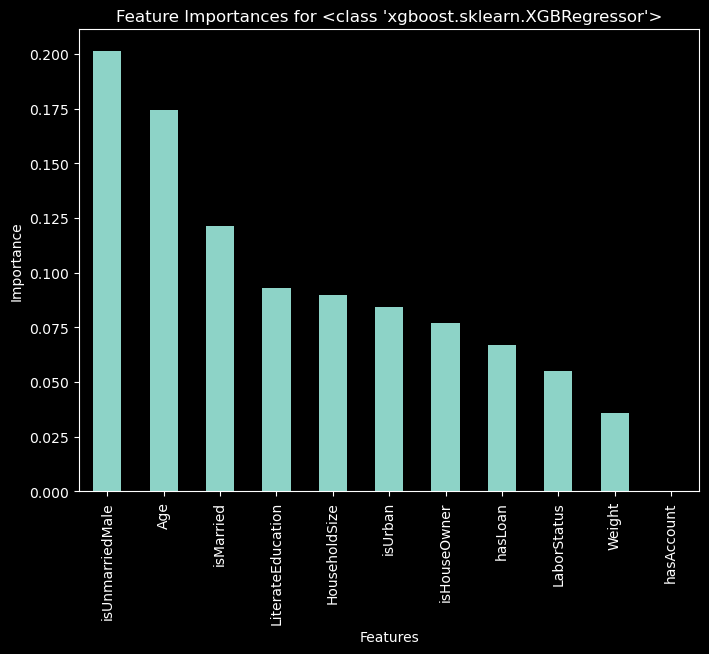

In [149]:
plot_feature_importances(best_xgbr_model, X, XGBRegressor)

In [150]:
# CatBoost

# Initialisation du modèle
cbr_model = CatBoostRegressor(verbose=0)
start_time = time.time()
cbr_model.fit(X_train, y_log_train)
end_time = time.time()
# Prévisions sur les données de test
y_log_pred = cbr_model.predict(X_test)
# Évaluation de la qualité du modèle sur les données de test
r2 = r2_score(y_log_test, y_log_pred)
rmse = mean_squared_error(y_log_test, y_log_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_log_pred)
medae = median_absolute_error(y_log_test, y_log_pred)
evs = explained_variance_score(y_log_test, y_log_pred)

df_scores = score('CatBoostRegressor', r2, rmse, mae, medae, evs, end_time - start_time)
df_scores

modele        R2      RMSE       MAE     MedAE       EVS   
0  XGBRegressor(Tuned)  0.279855  0.899845  0.668399  0.517135  0.283106  \
1    CatBoostRegressor  0.264994  0.909083  0.684183  0.527797  0.265004   

       time  
0  0.042238  
1  0.836924

<a id='data-varia'></a>

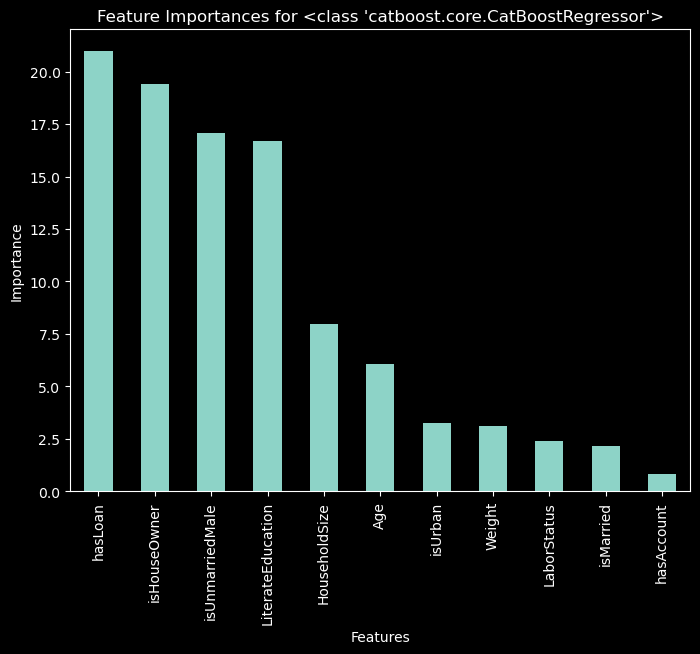

In [151]:
plot_feature_importances(cbr_model, X, CatBoostRegressor)

In [152]:
# MLPRegressor(Multi-Layer Perceptron Regressor)

# Initialisation du modèle
mlp_model = MLPRegressor(max_iter=500, random_state=42)
start_time = time.time()
mlp_model.fit(X_train, y_log_train)
end_time = time.time()
# Prévisions sur les données de test
y_log_pred = mlp_model.predict(X_test)
# Évaluation de la qualité du modèle sur les données de test
r2 = r2_score(y_log_test, y_log_pred)
rmse = mean_squared_error(y_log_test, y_log_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_log_pred)
medae = median_absolute_error(y_log_test, y_log_pred)
evs = explained_variance_score(y_log_test, y_log_pred)

df_scores = score('MLP Regressor', r2, rmse, mae, medae, evs, end_time - start_time)
df_scores

modele        R2      RMSE       MAE     MedAE       EVS   
0  XGBRegressor(Tuned)  0.279855  0.899845  0.668399  0.517135  0.283106  \
1    CatBoostRegressor  0.264994  0.909083  0.684183  0.527797  0.265004   
2        MLP Regressor  0.260349  0.911951  0.686699  0.536191  0.266492   

       time  
0  0.042238  
1  0.836924  
2  2.983113

In [153]:
# MLPRegressor(Tuned)
param_distributions = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp_model = MLPRegressor(max_iter=1500, random_state=42)
mlp_random_search = RandomizedSearchCV(estimator=mlp_model, param_distributions=param_distributions,
                                       n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)
mlp_random_search.fit(X_train, y_log_train)
print("Best parameters found: ", mlp_random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}


In [154]:
# best_mlp_model = mlp_random_search.best_estimator_
best_params = {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}

best_mlp_model = MLPRegressor(**best_params, max_iter=1500, random_state=42)

start_time = time.time()
best_mlp_model.fit(X_train, y_log_train)
end_time = time.time()

y_log_pred = best_mlp_model.predict(X_test)

r2 = r2_score(y_log_test, y_log_pred)
rmse = mean_squared_error(y_log_test, y_log_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_log_pred)
medae = median_absolute_error(y_log_test, y_log_pred)
evs = explained_variance_score(y_log_test, y_log_pred)

df_scores = score('MLP Regressor(Tuned)', r2, rmse, mae, medae, evs, end_time - start_time)
df_scores


modele        R2      RMSE       MAE     MedAE       EVS   
0  MLP Regressor(Tuned)  0.291912  0.892281  0.664635  0.536312  0.291975  \
1   XGBRegressor(Tuned)  0.279855  0.899845  0.668399  0.517135  0.283106   
2     CatBoostRegressor  0.264994  0.909083  0.684183  0.527797  0.265004   
3         MLP Regressor  0.260349  0.911951  0.686699  0.536191  0.266492   

       time  
0  5.034469  
1  0.042238  
2  0.836924  
3  2.983113

In [155]:
# Gradient Boosting Regressor

# Initialisation du modèle
gbr_model = GradientBoostingRegressor()

start_time = time.time()
gbr_model.fit(X_train, y_log_train)
end_time = time.time()
# Prévisions sur les données de test
y_log_pred = gbr_model.predict(X_test)
# Évaluation de la qualité du modèle sur les données de test
r2 = r2_score(y_log_test, y_log_pred)
rmse = mean_squared_error(y_log_test, y_log_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_log_pred)
medae = median_absolute_error(y_log_test, y_log_pred)
evs = explained_variance_score(y_log_test, y_log_pred)

df_scores = score('Gradient Boosting Regressor', r2, rmse, mae, medae, evs, end_time - start_time)
df_scores

modele        R2      RMSE       MAE     MedAE   
0  Gradient Boosting Regressor  0.302514  0.885576  0.660435  0.499702  \
1         MLP Regressor(Tuned)  0.291912  0.892281  0.664635  0.536312   
2          XGBRegressor(Tuned)  0.279855  0.899845  0.668399  0.517135   
3            CatBoostRegressor  0.264994  0.909083  0.684183  0.527797   
4                MLP Regressor  0.260349  0.911951  0.686699  0.536191   

        EVS      time  
0  0.302561  0.202953  
1  0.291975  5.034469  
2  0.283106  0.042238  
3  0.265004  0.836924  
4  0.266492  2.983113

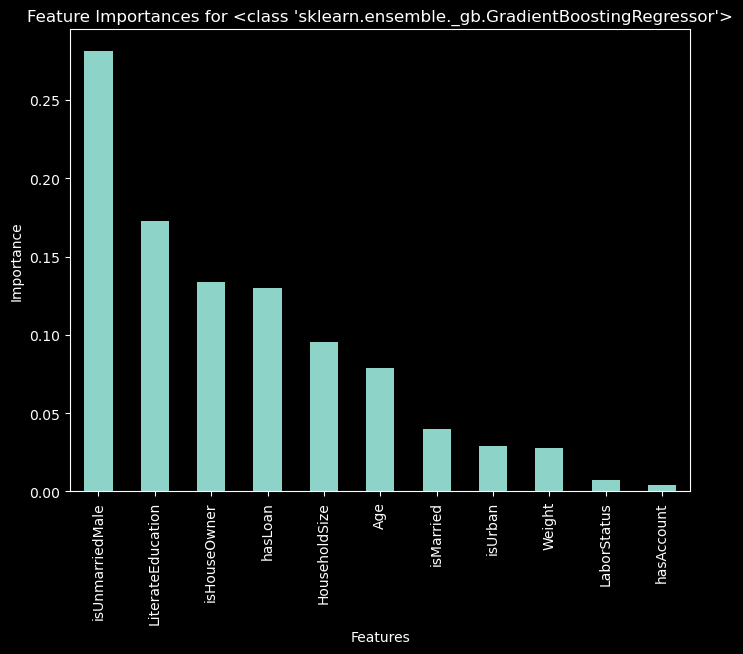

In [156]:
plot_feature_importances(gbr_model, X, GradientBoostingRegressor)

In [157]:
#Gradient Boosting Regressor (Tuned)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Initialisation du modèle Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_log_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Les meilleurs paramètres:", best_params)
print("Le meilleur indicateur de qualité:", best_score)

Les meilleurs paramètres: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000, 'subsample': 0.8}
Le meilleur indicateur de qualité: 0.2526906649782274


In [158]:
# Entraîner le modèle final avec les meilleurs paramètres
best_gbr_model = GradientBoostingRegressor(learning_rate=0.01 , n_estimators=1000, max_depth=3 , min_samples_split=5 , min_samples_leaf=2 , subsample=0.8)
start_time = time.time()
best_gbr_model.fit(X_train, y_log_train)
end_time = time.time()

# Prévisions sur les données de test
y_log_pred = best_gbr_model.predict(X_test)

# Évaluation de la qualité du modèle sur les données de test
r2 = r2_score(y_log_test, y_log_pred)
rmse = mean_squared_error(y_log_test, y_log_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_log_pred)
medae = median_absolute_error(y_log_test, y_log_pred)
evs = explained_variance_score(y_log_test, y_log_pred)

# Enregistrer les scores du modèle Gradient Boosting Regressor avec les meilleurs paramètres
df_scores = score('Gradient Boosting Regressor (Tuned)', r2, rmse, mae, medae, evs, end_time - start_time)

# Afficher les scores
df_scores

modele        R2      RMSE       MAE   
0  Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1          Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2                 MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
3                  XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
4                    CatBoostRegressor  0.264994  0.909083  0.684183   
5                        MLP Regressor  0.260349  0.911951  0.686699   

      MedAE       EVS      time  
0  0.501885  0.315234  5.986161  
1  0.499702  0.302561  0.202953  
2  0.536312  0.291975  5.034469  
3  0.517135  0.283106  0.042238  
4  0.527797  0.265004  0.836924  
5  0.536191  0.266492  2.983113

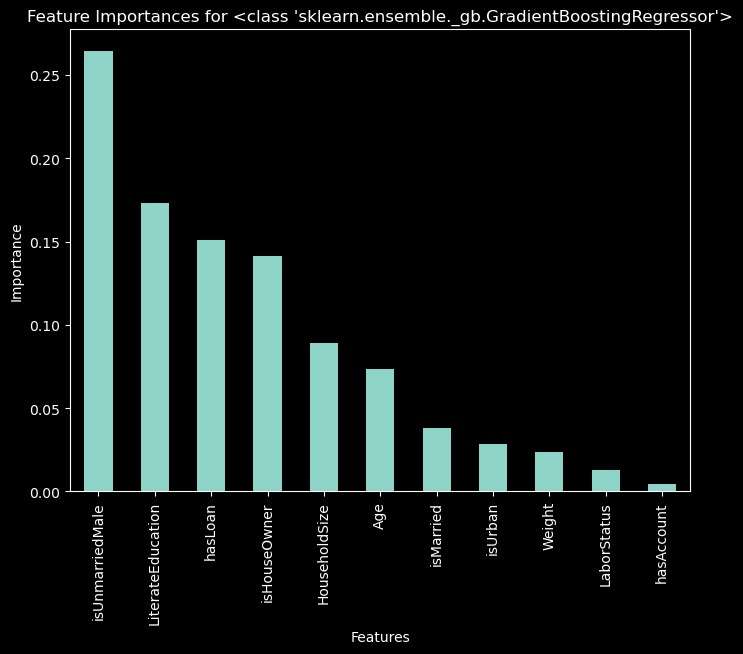

In [159]:
plot_feature_importances(best_gbr_model, X, GradientBoostingRegressor)

In [160]:
##Bagging Regressor

# Initialisation du modèle
br_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, bootstrap=True, bootstrap_features=True)

start_time = time.time()
br_model.fit(X_train, y_log_train)
end_time = time.time()

# Prévisions sur les données de test
y_log_pred = br_model.predict(X_test)

# Évaluation de la qualité du modèle sur les données de test
r2 = r2_score(y_log_test, y_log_pred)
rmse = mean_squared_error(y_log_test, y_log_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_log_pred)
medae = median_absolute_error(y_log_test, y_log_pred)
evs = explained_variance_score(y_log_test, y_log_pred)

df_scores = score('Bagging Regressor', r2, rmse, mae, medae, evs, end_time - start_time)
df_scores

modele        R2      RMSE       MAE   
0  Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1          Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2                 MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
3                  XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
4                    CatBoostRegressor  0.264994  0.909083  0.684183   
5                        MLP Regressor  0.260349  0.911951  0.686699   
6                    Bagging Regressor  0.256458  0.914346  0.683168   

      MedAE       EVS      time  
0  0.501885  0.315234  5.986161  
1  0.499702  0.302561  0.202953  
2  0.536312  0.291975  5.034469  
3  0.517135  0.283106  0.042238  
4  0.527797  0.265004  0.836924  
5  0.536191  0.266492  2.983113  
6  0.523313  0.256459  1.963851

In [161]:
#Bagging Regressor(Tuned)

param_dist = {
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': [None, 10, 20, 30],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}


br_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

br_random_search = RandomizedSearchCV(estimator=br_model, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1, verbose=2)

br_random_search.fit(X_train, y_log_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = br_random_search.best_params_
best_score = br_random_search.best_score_

print("Les meilleurs paramètres:", best_params)
print("Le meilleur indicateur de qualité:", best_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Les meilleurs paramètres: {'n_estimators': 200, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__min_samples_split': 10, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_depth': 10}
Le meilleur indicateur de qualité: 0.23392139958464392


In [162]:
#best_br_model = br_random_search.best_estimator_

#Initialisation de l'estimateur de base avec les meilleurs paramètres
base_estimator = DecisionTreeRegressor(
    max_depth=best_params['base_estimator__max_depth'],
    min_samples_split=best_params['base_estimator__min_samples_split'],
    min_samples_leaf=best_params['base_estimator__min_samples_leaf']
)

# Initialisation du modèle Bagging Regressor avec les meilleurs paramètres
best_br_model = BaggingRegressor(
    base_estimator=base_estimator,
    n_estimators=best_params['n_estimators'],
    bootstrap=best_params['bootstrap'],
    bootstrap_features=best_params['bootstrap_features'],
    random_state=42
)
start_time = time.time()
best_br_model.fit(X_train, y_log_train)
end_time = time.time()

y_log_pred = best_br_model.predict(X_test)

r2 = r2_score(y_log_test, y_log_pred)
rmse = mean_squared_error(y_log_test, y_log_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_log_pred)
medae = median_absolute_error(y_log_test, y_log_pred)
evs = explained_variance_score(y_log_test, y_log_pred)

df_scores = score('Bagging Regressor (Tuned)', r2, rmse, mae, medae, evs, end_time - start_time)
df_scores


modele        R2      RMSE       MAE   
0  Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1          Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2                 MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
3            Bagging Regressor (Tuned)  0.282906  0.897937  0.671743   
4                  XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
5                    CatBoostRegressor  0.264994  0.909083  0.684183   
6                        MLP Regressor  0.260349  0.911951  0.686699   
7                    Bagging Regressor  0.256458  0.914346  0.683168   

      MedAE       EVS      time  
0  0.501885  0.315234  5.986161  
1  0.499702  0.302561  0.202953  
2  0.536312  0.291975  5.034469  
3  0.536568  0.282907  2.970519  
4  0.517135  0.283106  0.042238  
5  0.527797  0.265004  0.836924  
6  0.536191  0.266492  2.983113  
7  0.523313  0.256459  1.963851

In [163]:
# Ridge
# Initialisation du modèle
ridge_model = Ridge()
start_time = time.time()
ridge_model.fit(X_train, y_log_train)
end_time = time.time()

# Prévisions sur les données de test
y_pred_ridge = ridge_model.predict(X_test)

# Évaluation de la qualité du modèle sur les données de test
r2_ridge = r2_score(y_log_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_log_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_log_test, y_pred_ridge)
medae_ridge = median_absolute_error(y_log_test, y_pred_ridge)
evs_ridge = explained_variance_score(y_log_test, y_pred_ridge)

df_scores = score('Ridge Regression', r2_ridge, rmse_ridge, mae_ridge, medae_ridge, evs_ridge, time.time() - start_time)
df_scores

modele        R2      RMSE       MAE   
0  Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1          Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2                 MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
3            Bagging Regressor (Tuned)  0.282906  0.897937  0.671743   
4                  XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
5                     Ridge Regression  0.278481  0.900703  0.669698   
6                    CatBoostRegressor  0.264994  0.909083  0.684183   
7                        MLP Regressor  0.260349  0.911951  0.686699   
8                    Bagging Regressor  0.256458  0.914346  0.683168   

      MedAE       EVS      time  
0  0.501885  0.315234  5.986161  
1  0.499702  0.302561  0.202953  
2  0.536312  0.291975  5.034469  
3  0.536568  0.282907  2.970519  
4  0.517135  0.283106  0.042238  
5  0.521729  0.278521  0.054845  
6  0.527797  0.265004  0.836924  
7  0.536191  0.266492  2.983113  
8  0.523313  0.256459  1.963851

In [164]:
#Ridge Regression (Tuned)
param_grid = {
    'alpha': [0.01, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

ridge_model = Ridge()

grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=8, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_log_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Les meilleurs paramètres:", best_params)
print("Le meilleur indicateur de qualité:", best_score)


Les meilleurs paramètres: {'alpha': 10.0, 'solver': 'lsqr'}
Le meilleur indicateur de qualité: 0.23588294022353706


In [165]:
best_ridge_model = Ridge(alpha=10.0, solver='lsqr')

start_time = time.time()
best_ridge_model.fit(X_train, y_log_train)
end_time = time.time()

y_pred_ridge = best_ridge_model.predict(X_test)

r2_ridge = r2_score(y_log_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_log_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_log_test, y_pred_ridge)
medae_ridge = median_absolute_error(y_log_test, y_pred_ridge)
evs_ridge = explained_variance_score(y_log_test, y_pred_ridge)

df_scores = score('Ridge Regression (Tuned)', r2_ridge, rmse_ridge, mae_ridge, medae_ridge, evs_ridge, end_time - start_time)
df_scores


modele        R2      RMSE       MAE   
0  Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1          Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2                 MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
3            Bagging Regressor (Tuned)  0.282906  0.897937  0.671743   
4                  XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
5                     Ridge Regression  0.278481  0.900703  0.669698   
6             Ridge Regression (Tuned)  0.278414  0.900745  0.669533   
7                    CatBoostRegressor  0.264994  0.909083  0.684183   
8                        MLP Regressor  0.260349  0.911951  0.686699   
9                    Bagging Regressor  0.256458  0.914346  0.683168   

      MedAE       EVS      time  
0  0.501885  0.315234  5.986161  
1  0.499702  0.302561  0.202953  
2  0.536312  0.291975  5.034469  
3  0.536568  0.282907  2.970519  
4  0.517135  0.283106  0.042238  
5  0.521729  0.278521  0.054845  
6  0.519944  0.278451  0.019213  
7  0.527797  0.265004  0.836924  
8  0.536191  0.266492  2.983113  
9  0.523313  0.256459  1.963851

In [166]:
# SVR
svr_model = SVR()
start_time = time.time()
svr_model.fit(X_train, y_log_train)
end_time = time.time()

# Prévisions sur les données de test
y_pred_svr = svr_model.predict(X_test)
#y_test_original=np.expm1(y_test)

# Évaluation de la qualité du modèle sur les données de test
r2_svr = r2_score(y_log_test, y_pred_svr)
rmse_svr = mean_squared_error(y_log_test, y_pred_svr, squared=False)
mae_svr = mean_absolute_error(y_log_test, y_pred_svr)
medae_svr = median_absolute_error(y_log_test, y_pred_svr)
evs_svr = explained_variance_score(y_log_test, y_pred_svr)

df_scores = score('SVR', r2_svr, rmse_svr, mae_svr, medae_svr, evs_svr, time.time() - start_time)
df_scores

modele        R2      RMSE       MAE   
0   Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1           Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2                  MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
3             Bagging Regressor (Tuned)  0.282906  0.897937  0.671743   
4                   XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
5                      Ridge Regression  0.278481  0.900703  0.669698   
6              Ridge Regression (Tuned)  0.278414  0.900745  0.669533   
7                                   SVR  0.271986  0.904748  0.671343   
8                     CatBoostRegressor  0.264994  0.909083  0.684183   
9                         MLP Regressor  0.260349  0.911951  0.686699   
10                    Bagging Regressor  0.256458  0.914346  0.683168   

       MedAE       EVS      time  
0   0.501885  0.315234  5.986161  
1   0.499702  0.302561  0.202953  
2   0.536312  0.291975  5.034469  
3   0.536568  0.282907  2.970519  
4   0.517135  0.283106  0.042238  
5   0.521729  0.278521  0.054845  
6   0.519944  0.278451  0.019213  
7   0.511125  0.276914  2.066495  
8   0.527797  0.265004  0.836924  
9   0.536191  0.266492  2.983113  
10  0.523313  0.256459  1.963851

In [167]:
#SVR (Tuned)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_log_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.2350911743110588


In [168]:
best_svr_model = SVR(C=1,gamma='auto', kernel='rbf' )

start_time = time.time()
best_svr_model.fit(X_train, y_log_train)
end_time = time.time()

# Prévisions sur les données de test
y_pred_svr = best_svr_model.predict(X_test)
#y_test_original=np.expm1(y_test)

# Évaluation de la qualité du modèle sur les données de test
r2_svr = r2_score(y_log_test, y_pred_svr)
rmse_svr = mean_squared_error(y_log_test, y_pred_svr, squared=False)
mae_svr = mean_absolute_error(y_log_test, y_pred_svr)
medae_svr = median_absolute_error(y_log_test, y_pred_svr)
evs_svr = explained_variance_score(y_log_test, y_pred_svr)

df_scores = score('SVR (Tuned)', r2_svr, rmse_svr, mae_svr, medae_svr, evs_svr, time.time() - start_time)
df_scores

modele        R2      RMSE       MAE   
0   Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1           Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2                  MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
3             Bagging Regressor (Tuned)  0.282906  0.897937  0.671743   
4                   XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
5                           SVR (Tuned)  0.279787  0.899888  0.665826   
6                      Ridge Regression  0.278481  0.900703  0.669698   
7              Ridge Regression (Tuned)  0.278414  0.900745  0.669533   
8                                   SVR  0.271986  0.904748  0.671343   
9                     CatBoostRegressor  0.264994  0.909083  0.684183   
10                        MLP Regressor  0.260349  0.911951  0.686699   
11                    Bagging Regressor  0.256458  0.914346  0.683168   

       MedAE       EVS      time  
0   0.501885  0.315234  5.986161  
1   0.499702  0.302561  0.202953  
2   0.536312  0.291975  5.034469  
3   0.536568  0.282907  2.970519  
4   0.517135  0.283106  0.042238  
5   0.509700  0.283974  1.818057  
6   0.521729  0.278521  0.054845  
7   0.519944  0.278451  0.019213  
8   0.511125  0.276914  2.066495  
9   0.527797  0.265004  0.836924  
10  0.536191  0.266492  2.983113  
11  0.523313  0.256459  1.963851

<a id='data-optim'></a>

In [169]:
# Random Forest Regressor

rf_model = RandomForestRegressor()
rf_params = {
    'n_estimators': [300, 500, 700],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_search = RandomizedSearchCV(rf_model, rf_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_log_train)

# Obtenir les meilleurs paramètres
best_params = rf_search.best_params_

# Obtenir le meilleur score de qualité
best_score = rf_search.best_score_

print("Les meilleurs paramètres:", best_params)
print("Le meilleur indicateur de qualité:", best_score)


Les meilleurs paramètres: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 8}
Le meilleur indicateur de qualité: 0.238906094530109


In [170]:
# Entraîner le modèle final avec les meilleurs paramètres

best_rf_model = RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=300)
start_time = time.time()
best_rf_model.fit(X_train, y_log_train)
end_time = time.time()

# Prévisions sur les données de test
y_pred = best_rf_model.predict(X_test)

# Évaluation de la qualité du modèle sur les données de test
r2 = r2_score(y_log_test, y_pred)
rmse = mean_squared_error(y_log_test, y_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_pred)
medae = median_absolute_error(y_log_test, y_pred)
evs = explained_variance_score(y_log_test, y_pred)

df_scores = score('Random Forest Regressor(Tuned)', r2, rmse, mae, medae, evs, end_time - start_time)

df_scores


modele        R2      RMSE       MAE   
0   Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1           Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2                  MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
3             Bagging Regressor (Tuned)  0.282906  0.897937  0.671743   
4        Random Forest Regressor(Tuned)  0.282847  0.897974  0.668083   
5                   XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
6                           SVR (Tuned)  0.279787  0.899888  0.665826   
7                      Ridge Regression  0.278481  0.900703  0.669698   
8              Ridge Regression (Tuned)  0.278414  0.900745  0.669533   
9                                   SVR  0.271986  0.904748  0.671343   
10                    CatBoostRegressor  0.264994  0.909083  0.684183   
11                        MLP Regressor  0.260349  0.911951  0.686699   
12                    Bagging Regressor  0.256458  0.914346  0.683168   

       MedAE       EVS      time  
0   0.501885  0.315234  5.986161  
1   0.499702  0.302561  0.202953  
2   0.536312  0.291975  5.034469  
3   0.536568  0.282907  2.970519  
4   0.532096  0.282847  1.040490  
5   0.517135  0.283106  0.042238  
6   0.509700  0.283974  1.818057  
7   0.521729  0.278521  0.054845  
8   0.519944  0.278451  0.019213  
9   0.511125  0.276914  2.066495  
10  0.527797  0.265004  0.836924  
11  0.536191  0.266492  2.983113  
12  0.523313  0.256459  1.963851

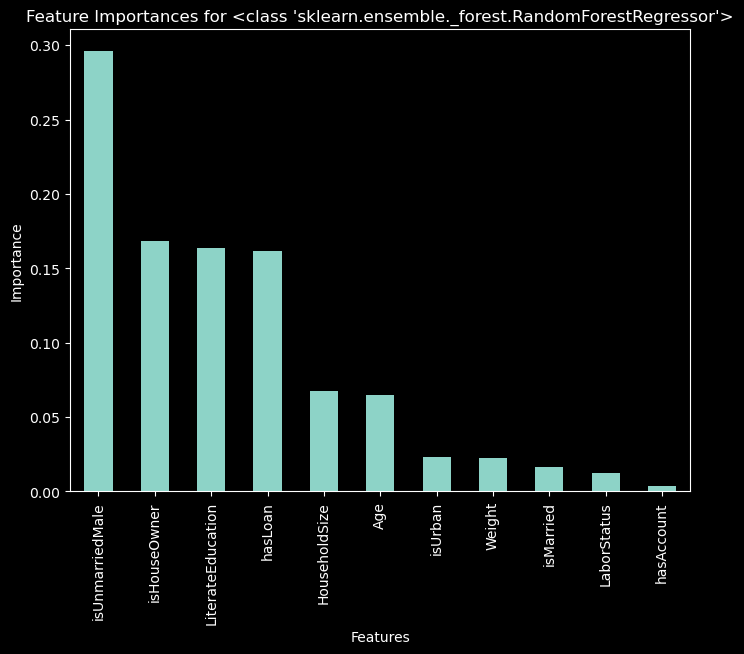

In [171]:
plot_feature_importances(best_rf_model, X, RandomForestRegressor)

In [172]:
#CatBoostRegressor

catboost_model = CatBoostRegressor(verbose=0)
catboost_params = {
    'iterations': [300, 500, 1000],
    'depth': [8, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [5, 8, 10]
}
catboost_search = RandomizedSearchCV(catboost_model, catboost_params, n_iter=15, cv=7, random_state=42, n_jobs=-1)
catboost_search.fit(X_train, y_log_train)
# Obtenir les meilleurs paramètres
best_params = catboost_search.best_params_

# Obtenir le meilleur score de qualité
best_score = catboost_search.best_score_

print("Les meilleurs paramètres:", best_params)
print("Le meilleur indicateur de qualité:", best_score)


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=  19.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   5.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   6.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=adam; total time=  13.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=  12.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=  11.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   8.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; t

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=  10.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=adam; total time=  11.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  11.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=adam; total time=  22.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   4.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=sgd; total time=  34.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=  12.5s
[CV] END base_estimator__max_depth=30, base_estimator__min_samples_leaf=4, base_estimator__min_samples_split=

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=  24.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   6.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  16.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=  11.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   9.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   9.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   9.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=adam; tot

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   9.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, solver=adam; total time=   9.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=  17.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=  31.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=  10.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=  13.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   9.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total t

In [174]:
# Entraîner le modèle final avec les meilleurs paramètres

best_cbr_model = CatBoostRegressor(learning_rate=0.01, l2_leaf_reg=5, iterations=1000, depth=8)
start_time = time.time()
best_cbr_model.fit(X_train, y_log_train)
end_time = time.time()

# Prévisions sur les données de test
y_pred = best_cbr_model.predict(X_test)

# Évaluation de la qualité du modèle sur les données de test
r2 = r2_score(y_log_test, y_pred)
rmse = mean_squared_error(y_log_test, y_pred, squared=False)
mae = mean_absolute_error(y_log_test, y_pred)
medae = median_absolute_error(y_log_test, y_pred)
evs = explained_variance_score(y_log_test, y_pred)

df_scores = score('CatBoostRegressor(Tuned)', r2, rmse, mae, medae, evs, end_time - start_time)

df_scores


0:	learn: 1.0943550	total: 4.54ms	remaining: 4.54s
1:	learn: 1.0923792	total: 11.4ms	remaining: 5.69s
2:	learn: 1.0906167	total: 14.8ms	remaining: 4.92s
3:	learn: 1.0888037	total: 20.4ms	remaining: 5.09s
4:	learn: 1.0868429	total: 24.9ms	remaining: 4.96s
5:	learn: 1.0848863	total: 27.9ms	remaining: 4.63s
6:	learn: 1.0829391	total: 33ms	remaining: 4.68s
7:	learn: 1.0809669	total: 37.7ms	remaining: 4.67s
8:	learn: 1.0791100	total: 40.3ms	remaining: 4.43s
9:	learn: 1.0773441	total: 44.8ms	remaining: 4.43s
10:	learn: 1.0755243	total: 48ms	remaining: 4.32s
11:	learn: 1.0738457	total: 52.3ms	remaining: 4.3s
12:	learn: 1.0721106	total: 55ms	remaining: 4.17s
13:	learn: 1.0702946	total: 61.6ms	remaining: 4.33s
14:	learn: 1.0685214	total: 66.2ms	remaining: 4.34s
15:	learn: 1.0669371	total: 69.3ms	remaining: 4.26s
16:	learn: 1.0654115	total: 75.9ms	remaining: 4.39s
17:	learn: 1.0637052	total: 81.5ms	remaining: 4.44s
18:	learn: 1.0620471	total: 84.6ms	remaining: 4.37s
19:	learn: 1.0603676	total: 9

176:	learn: 0.9360563	total: 731ms	remaining: 3.4s
177:	learn: 0.9356836	total: 735ms	remaining: 3.39s
178:	learn: 0.9353017	total: 738ms	remaining: 3.38s
179:	learn: 0.9349572	total: 746ms	remaining: 3.4s
180:	learn: 0.9347523	total: 748ms	remaining: 3.38s
181:	learn: 0.9343981	total: 751ms	remaining: 3.37s
182:	learn: 0.9339799	total: 755ms	remaining: 3.37s
183:	learn: 0.9336361	total: 762ms	remaining: 3.38s
184:	learn: 0.9331394	total: 765ms	remaining: 3.37s
185:	learn: 0.9327804	total: 768ms	remaining: 3.36s
186:	learn: 0.9324434	total: 773ms	remaining: 3.36s
187:	learn: 0.9321126	total: 778ms	remaining: 3.36s
188:	learn: 0.9316943	total: 783ms	remaining: 3.36s
189:	learn: 0.9313229	total: 785ms	remaining: 3.35s
190:	learn: 0.9310131	total: 788ms	remaining: 3.34s
191:	learn: 0.9306911	total: 792ms	remaining: 3.33s
192:	learn: 0.9303740	total: 800ms	remaining: 3.35s
193:	learn: 0.9300284	total: 805ms	remaining: 3.35s
194:	learn: 0.9296514	total: 808ms	remaining: 3.33s
195:	learn: 0.

346:	learn: 0.8910128	total: 1.55s	remaining: 2.93s
347:	learn: 0.8907966	total: 1.56s	remaining: 2.92s
348:	learn: 0.8905722	total: 1.57s	remaining: 2.92s
349:	learn: 0.8903781	total: 1.57s	remaining: 2.92s
350:	learn: 0.8902120	total: 1.57s	remaining: 2.91s
351:	learn: 0.8900077	total: 1.58s	remaining: 2.91s
352:	learn: 0.8898309	total: 1.58s	remaining: 2.9s
353:	learn: 0.8896577	total: 1.59s	remaining: 2.89s
354:	learn: 0.8894943	total: 1.59s	remaining: 2.89s
355:	learn: 0.8893386	total: 1.6s	remaining: 2.89s
356:	learn: 0.8891166	total: 1.6s	remaining: 2.88s
357:	learn: 0.8889214	total: 1.6s	remaining: 2.88s
358:	learn: 0.8887176	total: 1.61s	remaining: 2.87s
359:	learn: 0.8885201	total: 1.61s	remaining: 2.86s
360:	learn: 0.8883355	total: 1.61s	remaining: 2.85s
361:	learn: 0.8881038	total: 1.61s	remaining: 2.85s
362:	learn: 0.8878970	total: 1.62s	remaining: 2.84s
363:	learn: 0.8877460	total: 1.62s	remaining: 2.83s
364:	learn: 0.8875598	total: 1.63s	remaining: 2.83s
365:	learn: 0.88

538:	learn: 0.8639427	total: 2.28s	remaining: 1.95s
539:	learn: 0.8637893	total: 2.29s	remaining: 1.95s
540:	learn: 0.8636395	total: 2.29s	remaining: 1.94s
541:	learn: 0.8635292	total: 2.29s	remaining: 1.94s
542:	learn: 0.8634393	total: 2.3s	remaining: 1.93s
543:	learn: 0.8633083	total: 2.3s	remaining: 1.93s
544:	learn: 0.8631141	total: 2.3s	remaining: 1.92s
545:	learn: 0.8630931	total: 2.3s	remaining: 1.92s
546:	learn: 0.8629798	total: 2.31s	remaining: 1.91s
547:	learn: 0.8627910	total: 2.31s	remaining: 1.91s
548:	learn: 0.8626489	total: 2.32s	remaining: 1.9s
549:	learn: 0.8624794	total: 2.32s	remaining: 1.9s
550:	learn: 0.8623889	total: 2.33s	remaining: 1.9s
551:	learn: 0.8622610	total: 2.33s	remaining: 1.89s
552:	learn: 0.8620448	total: 2.33s	remaining: 1.89s
553:	learn: 0.8619213	total: 2.34s	remaining: 1.88s
554:	learn: 0.8618617	total: 2.34s	remaining: 1.88s
555:	learn: 0.8617521	total: 2.34s	remaining: 1.87s
556:	learn: 0.8615879	total: 2.35s	remaining: 1.86s
557:	learn: 0.86131

730:	learn: 0.8431511	total: 3.02s	remaining: 1.11s
731:	learn: 0.8430608	total: 3.02s	remaining: 1.11s
732:	learn: 0.8429423	total: 3.03s	remaining: 1.1s
733:	learn: 0.8428528	total: 3.03s	remaining: 1.1s
734:	learn: 0.8426773	total: 3.04s	remaining: 1.09s
735:	learn: 0.8426137	total: 3.04s	remaining: 1.09s
736:	learn: 0.8425460	total: 3.05s	remaining: 1.09s
737:	learn: 0.8424368	total: 3.05s	remaining: 1.08s
738:	learn: 0.8422801	total: 3.05s	remaining: 1.08s
739:	learn: 0.8420768	total: 3.06s	remaining: 1.07s
740:	learn: 0.8420153	total: 3.06s	remaining: 1.07s
741:	learn: 0.8418073	total: 3.07s	remaining: 1.07s
742:	learn: 0.8416852	total: 3.07s	remaining: 1.06s
743:	learn: 0.8415722	total: 3.08s	remaining: 1.06s
744:	learn: 0.8414687	total: 3.08s	remaining: 1.05s
745:	learn: 0.8412977	total: 3.08s	remaining: 1.05s
746:	learn: 0.8412008	total: 3.09s	remaining: 1.04s
747:	learn: 0.8410746	total: 3.09s	remaining: 1.04s
748:	learn: 0.8409752	total: 3.1s	remaining: 1.04s
749:	learn: 0.8

921:	learn: 0.8247634	total: 3.95s	remaining: 335ms
922:	learn: 0.8246773	total: 3.96s	remaining: 330ms
923:	learn: 0.8246302	total: 3.96s	remaining: 326ms
924:	learn: 0.8244927	total: 3.97s	remaining: 322ms
925:	learn: 0.8244269	total: 3.97s	remaining: 318ms
926:	learn: 0.8243254	total: 3.98s	remaining: 313ms
927:	learn: 0.8242544	total: 3.98s	remaining: 309ms
928:	learn: 0.8241500	total: 3.99s	remaining: 305ms
929:	learn: 0.8240577	total: 3.99s	remaining: 300ms
930:	learn: 0.8240148	total: 4s	remaining: 296ms
931:	learn: 0.8238797	total: 4s	remaining: 292ms
932:	learn: 0.8238248	total: 4.01s	remaining: 288ms
933:	learn: 0.8237985	total: 4.01s	remaining: 283ms
934:	learn: 0.8237041	total: 4.02s	remaining: 279ms
935:	learn: 0.8236610	total: 4.02s	remaining: 275ms
936:	learn: 0.8235601	total: 4.02s	remaining: 271ms
937:	learn: 0.8234432	total: 4.03s	remaining: 266ms
938:	learn: 0.8233626	total: 4.04s	remaining: 262ms
939:	learn: 0.8233099	total: 4.04s	remaining: 258ms
940:	learn: 0.8232

modele        R2      RMSE       MAE   
0   Gradient Boosting Regressor (Tuned)  0.315213  0.877477  0.653554  \
1           Gradient Boosting Regressor  0.302514  0.885576  0.660435   
2              CatBoostRegressor(Tuned)  0.297623  0.888675  0.665486   
3                  MLP Regressor(Tuned)  0.291912  0.892281  0.664635   
4             Bagging Regressor (Tuned)  0.282906  0.897937  0.671743   
5        Random Forest Regressor(Tuned)  0.282847  0.897974  0.668083   
6                   XGBRegressor(Tuned)  0.279855  0.899845  0.668399   
7                           SVR (Tuned)  0.279787  0.899888  0.665826   
8                      Ridge Regression  0.278481  0.900703  0.669698   
9              Ridge Regression (Tuned)  0.278414  0.900745  0.669533   
10                                  SVR  0.271986  0.904748  0.671343   
11                    CatBoostRegressor  0.264994  0.909083  0.684183   
12                        MLP Regressor  0.260349  0.911951  0.686699   
13                    Bagging Regressor  0.256458  0.914346  0.683168   

       MedAE       EVS      time  
0   0.501885  0.315234  5.986161  
1   0.499702  0.302561  0.202953  
2   0.510819  0.297625  4.988797  
3   0.536312  0.291975  5.034469  
4   0.536568  0.282907  2.970519  
5   0.532096  0.282847  1.040490  
6   0.517135  0.283106  0.042238  
7   0.509700  0.283974  1.818057  
8   0.521729  0.278521  0.054845  
9   0.519944  0.278451  0.019213  
10  0.511125  0.276914  2.066495  
11  0.527797  0.265004  0.836924  
12  0.536191  0.266492  2.983113  
13  0.523313  0.256459  1.963851

In [ ]:
#La fonction np.expm1 renvoie la valeur à l'échelle d'origine.
#y_pred_real = np.expm1(y_pred)


En analysant l'importance des variables, nous serons en mesure de comprendre quels facteurs ont la plus grande influence sur les dépenses globales des ménages. Cela contribuera à améliorer le modèle et à le rendre plus interprétable.

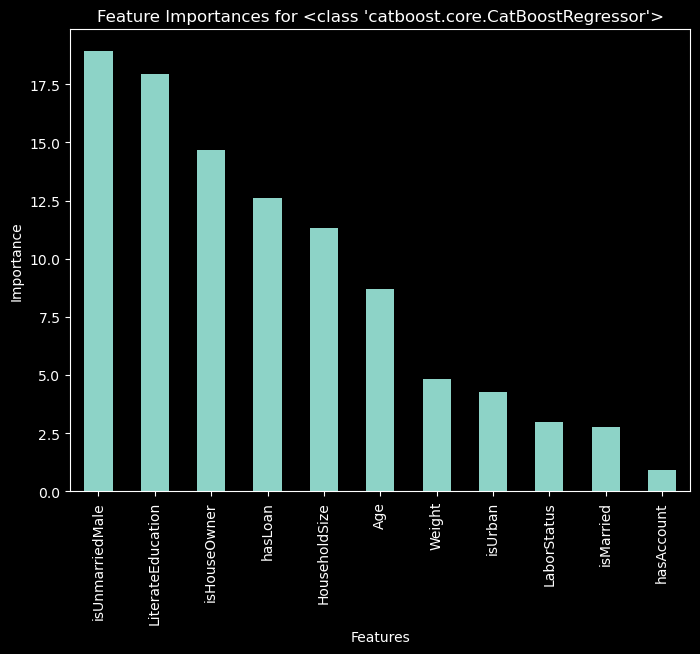

In [175]:
plot_feature_importances(best_cbr_model, X, CatBoostRegressor)

# Conclusions. <a id='data-conclusions'></a>

**Quelques pistes d'améliorations:**  
Les résultats d’apprentissage et de prévision des différents modèles se sont révélés plutôt faibles. Voici quelques pistes d'améliorations possibles pour cette analyse, que je n'aurais pas le temps de mener à bien :

Variables insuffisamment pertinentes : Il est possible que les variables sélectionnées n'aient pas d'effet significatif sur la variable cible. Il serait pertinent d’identifier et d’intégrer d’autres variables plus étroitement liées aux dépenses des ménages.

Analyse supplémentaire des relations entre les variables : Une analyse en composantes principales (ACP) pourrait être nécessaire pour comprendre les relations complexes entre les variables et déterminer si certaines d'entre elles peuvent être combinées pour mieux décrire la variable cible.

Volume et qualité des données : En l'absence de corrélations fortes, il peut être utile d’augmenter le volume de données ou d’améliorer leur qualité, ainsi que d’inclure des types d’analyses supplémentaires pour mieux capter les dépendances sous-jacentes.

Impact de la variation du PIB :

GDP_variation: 0.093446 (9.3446%) indique que le PIB a augmenté de 9,3446% par rapport à la période précédente. Il s'agit d'un indicateur positif de croissance économique, ce qui peut être utile pour prévoir les dépenses des ménages. La croissance économique affecte souvent les dépenses de consommation, un taux de croissance plus élevé du PIB pouvant indiquer une augmentation du revenu des ménages et, par conséquent, des dépenses accrues.
Des variables supplémentaires peuvent être créées sur la base de ces informations, telles que :

(1+GDP_variation) * HouseholdSize : Pour estimer l'impact de la croissance économique sur les dépenses des ménages ajustées en fonction de la taille du ménage.
Interactions entre GDP_variation et d'autres variables pertinentes : Pour révéler des dépendances plus complexes. Ces nouvelles variables peuvent améliorer la précision du modèle car elles prennent en compte l’impact des facteurs macroéconomiques sur les dépenses individuelles.  

En conclusion, l'amélioration de la pertinence des variables, l'analyse des relations entre celles-ci, et l'intégration de facteurs macroéconomiques comme la variation du PIB peuvent potentiellement accroître la précision des modèles de prévision des dépenses des ménages.